In [1]:
import os
import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.models as models
import numpy as np
import cv2
import utils
import trainer
import evaluator
import data_process

# Set random seed for reproducibility
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

## SSD300_VGG16

In [ ]:
input_size = 300

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((input_size, input_size)),
    torchvision.transforms.ToTensor(), # uint8 values in [0, 255] -> float tensor with values [0, 1]
    torchvision.transforms.Normalize(mean=data_process.train_mean.tolist(), std=data_process.train_std.tolist())
])

train_set, val_set, test_set = data_process.load_data(transform=transform, input_size=input_size)

In [ ]:
model_name = "ssd300_vgg16"
study_1 = trainer.run_optimization(model_name, train_set, val_set, n_trials=100, study_name=model_name, save_path=os.path.join("data/models", model_name))

[I 2025-01-26 09:54:56,838] A new study created in RDB with name: ssd300_vgg16


Checking Model: SSD
Starting Trial #0
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009472961959721175, 'beta1': 0.9658118084445251, 'beta2': 0.9318563294010559, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 8.307341815284441e-06}
Epoch 1/17, Train Loss: 515.3366, Val mAP@50: 0.0000, FPS: 251.02, Epoch Time: 5.36 seconds
Epoch 2/17, Train Loss: 344.0745, Val mAP@50: 0.0000, FPS: 287.90, Epoch Time: 5.00 seconds
Epoch 3/17, Train Loss: 357.2039, Val mAP@50: 0.0000, FPS: 287.50, Epoch Time: 5.01 seconds
Epoch 4/17, Train Loss: 328.3409, Val mAP@50: 0.0000, FPS: 287.30, Epoch Time: 5.01 seconds


[I 2025-01-26 09:55:24,108] Trial 0 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #1
{'batch_size': 6, 'epochs': 13, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0004904539339172869, 'beta1': 0.9169765854389738, 'beta2': 0.9282853454922604, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.16714116943161034}
Epoch 1/13, Train Loss: 704.7481, Val mAP@50: 0.0000, FPS: 260.39, Epoch Time: 5.22 seconds
Epoch 2/13, Train Loss: 423.0259, Val mAP@50: 0.0000, FPS: 284.35, Epoch Time: 5.13 seconds
Epoch 3/13, Train Loss: 402.3375, Val mAP@50: 0.0000, FPS: 283.87, Epoch Time: 5.14 seconds
Epoch 4/13, Train Loss: 394.9276, Val mAP@50: 0.0000, FPS: 283.96, Epoch Time: 5.13 seconds


[I 2025-01-26 09:55:51,538] Trial 1 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #2
{'batch_size': 8, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.004241247429282568, 'weight_decay': 0.1260926568334326, 'momentum': 0.9492067843282642, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.17734318931932058}
Epoch 1/17, Train Loss: 35616.3076, Val mAP@50: 0.0003, FPS: 264.45, Epoch Time: 4.94 seconds
Epoch 2/17, Train Loss: 20545.5940, Val mAP@50: 0.0003, FPS: 277.93, Epoch Time: 4.86 seconds
Epoch 3/17, Train Loss: 16262.6655, Val mAP@50: 0.0001, FPS: 281.63, Epoch Time: 4.89 seconds
Epoch 4/17, Train Loss: 14946.3223, Val mAP@50: 0.0000, FPS: 277.83, Epoch Time: 4.94 seconds
Epoch 5/17, Train Loss: 15114.5246, Val mAP@50: 0.0101, FPS: 279.14, Epoch Time: 4.94 seconds
Epoch 6/17, Train Loss: 6462.5278, Val mAP@50: 0.0005, FPS: 284.85, Epoch Time: 4.88 seconds


/home/user_138/anaconda3/envs/ultralytics-env/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 7/17, Train Loss: 3066.1766, Val mAP@50: 0.0001, FPS: 277.77, Epoch Time: 5.02 seconds
Epoch 8/17, Train Loss: 3175.0817, Val mAP@50: 0.0001, FPS: 275.22, Epoch Time: 4.92 seconds
Epoch 9/17, Train Loss: 3575.2703, Val mAP@50: 0.0030, FPS: 277.61, Epoch Time: 4.88 seconds
Epoch 10/17, Train Loss: 3559.2372, Val mAP@50: 0.0000, FPS: 277.34, Epoch Time: 4.90 seconds
Epoch 11/17, Train Loss: 1956.0086, Val mAP@50: 0.0072, FPS: 277.51, Epoch Time: 4.92 seconds
Epoch 12/17, Train Loss: 977.9056, Val mAP@50: 0.0181, FPS: 290.65, Epoch Time: 4.87 seconds
Epoch 13/17, Train Loss: 737.9651, Val mAP@50: 0.0110, FPS: 277.14, Epoch Time: 4.88 seconds
Epoch 14/17, Train Loss: 692.3243, Val mAP@50: 0.0269, FPS: 279.86, Epoch Time: 4.92 seconds
Epoch 15/17, Train Loss: 709.4828, Val mAP@50: 0.0231, FPS: 277.35, Epoch Time: 4.89 seconds
Epoch 16/17, Train Loss: 466.2456, Val mAP@50: 0.0778, FPS: 290.62, Epoch Time: 4.82 seconds


[I 2025-01-26 09:57:16,677] Trial 2 finished with value: 0.15057723224163055 and parameters: {'batch_size': 8, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.004241247429282568, 'weight_decay': 0.1260926568334326, 'momentum': 0.9492067843282642, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.17734318931932058}. Best is trial 2 with value: 0.15057723224163055.


Epoch 17/17, Train Loss: 301.6087, Val mAP@50: 0.1506, FPS: 283.57, Epoch Time: 4.77 seconds
Best Epoch: 16, Best Val mAP@50: 0.1506, Training Time: 83.24 seconds
Model training complete.
Checking Model: SSD
Starting Trial #3
{'batch_size': 8, 'epochs': 13, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9895977596972944, 'lr': 0.016590045793740463, 'weight_decay': 5.129973236412686e-05, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.056083539958035666}
Epoch 1/13, Train Loss: 27420.8198, Val mAP@50: 0.0004, FPS: 286.79, Epoch Time: 4.79 seconds
Epoch 2/13, Train Loss: 36458.4955, Val mAP@50: 0.0005, FPS: 281.42, Epoch Time: 4.86 seconds
Epoch 3/13, Train Loss: 45418.6833, Val mAP@50: 0.0018, FPS: 281.48, Epoch Time: 4.79 seconds
Epoch 4/13, Train Loss: 39894.2237, Val mAP@50: 0.0008, FPS: 280.00, Epoch Time: 4.82 seconds
Epoch 5/13, Train Loss: 38711.8955, Val mAP@50: 0.0032, FPS: 279.37, Epoch Time: 4.83 seconds
Epoch 6/13, Train Loss: 32915.2173, Val mAP@50: 0.003

[I 2025-01-26 09:58:21,537] Trial 3 finished with value: 0.004275427665561438 and parameters: {'batch_size': 8, 'epochs': 13, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9895977596972944, 'lr': 0.016590045793740463, 'weight_decay': 5.129973236412686e-05, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.056083539958035666}. Best is trial 2 with value: 0.15057723224163055.


Epoch 13/13, Train Loss: 14117.7247, Val mAP@50: 0.0017, FPS: 281.13, Epoch Time: 4.83 seconds
Best Epoch: 7, Best Val mAP@50: 0.0043, Training Time: 63.00 seconds
Model training complete.
Checking Model: SSD
Starting Trial #4
{'batch_size': 6, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9603940213174831, 'lr': 0.032155547841981214, 'weight_decay': 4.760099310748672e-05, 'scheduler': 'OneCycleLR', 'max_lr': 0.004548729885792942}
Epoch 1/17, Train Loss: 428.9273, Val mAP@50: 0.0119, FPS: 287.42, Epoch Time: 5.02 seconds
Epoch 2/17, Train Loss: 286.8272, Val mAP@50: 0.2092, FPS: 287.64, Epoch Time: 5.05 seconds
Epoch 3/17, Train Loss: 236.6971, Val mAP@50: 0.3584, FPS: 287.12, Epoch Time: 5.04 seconds
Epoch 4/17, Train Loss: 207.0430, Val mAP@50: 0.4109, FPS: 287.32, Epoch Time: 5.07 seconds
Epoch 5/17, Train Loss: 182.4570, Val mAP@50: 0.4022, FPS: 287.23, Epoch Time: 5.04 seconds
Epoch 6/17, Train Loss: 165.7980, Val mAP@50: 0.4614, FPS: 287.32, Epo

[I 2025-01-26 09:59:49,614] Trial 4 finished with value: 0.503826379776001 and parameters: {'batch_size': 6, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9603940213174831, 'lr': 0.032155547841981214, 'weight_decay': 4.760099310748672e-05, 'scheduler': 'OneCycleLR', 'max_lr': 0.004548729885792942}. Best is trial 4 with value: 0.503826379776001.


Epoch 17/17, Train Loss: 69.8137, Val mAP@50: 0.5038, FPS: 284.44, Epoch Time: 5.11 seconds
Best Epoch: 16, Best Val mAP@50: 0.5038, Training Time: 86.23 seconds
Model training complete.
Checking Model: SSD
Starting Trial #5
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0012548593198908888, 'weight_decay': 0.5380377852807633, 'momentum': 0.9780810792026231, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.2973243346544745, 'patience': 3}
Epoch 1/17, Train Loss: 9215133624134422980580018313232384.0000, Val mAP@50: 0.0000, FPS: 289.40, Epoch Time: 5.68 seconds
Epoch 2/17, Train Loss: inf, Val mAP@50: 0.0000, FPS: 289.08, Epoch Time: 5.68 seconds
Epoch 3/17, Train Loss: nan, Val mAP@50: 0.0000, FPS: 290.85, Epoch Time: 4.96 seconds
Epoch 4/17, Train Loss: nan, Val mAP@50: 0.0000, FPS: 290.73, Epoch Time: 4.99 seconds


[I 2025-01-26 10:00:17,697] Trial 5 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #6
{'batch_size': 7, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.947830250449445, 'lr': 0.0083742433416178, 'weight_decay': 1.0003658748852571e-05, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 4.0935047202991817e-07}
Epoch 1/16, Train Loss: nan, Val mAP@50: 0.0000, FPS: 291.49, Epoch Time: 4.98 seconds
Epoch 2/16, Train Loss: nan, Val mAP@50: 0.0000, FPS: 290.24, Epoch Time: 4.97 seconds
Epoch 3/16, Train Loss: nan, Val mAP@50: 0.0000, FPS: 291.37, Epoch Time: 4.91 seconds
Epoch 4/16, Train Loss: nan, Val mAP@50: 0.0000, FPS: 291.12, Epoch Time: 4.93 seconds


[I 2025-01-26 10:00:44,192] Trial 6 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #7
{'batch_size': 6, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.0035675054331891385, 'weight_decay': 0.10566344366433493, 'momentum': 0.9775188644231251, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.29754314502094625, 'patience': 2}
Epoch 1/17, Train Loss: 58605.6052, Val mAP@50: 0.0001, FPS: 285.86, Epoch Time: 5.32 seconds
Epoch 2/17, Train Loss: 47891.7184, Val mAP@50: 0.0000, FPS: 284.89, Epoch Time: 5.03 seconds
Epoch 3/17, Train Loss: 38216.6402, Val mAP@50: 0.0000, FPS: 280.16, Epoch Time: 4.96 seconds
Epoch 4/17, Train Loss: 33729.6251, Val mAP@50: 0.0001, FPS: 278.68, Epoch Time: 4.91 seconds
Epoch 5/17, Train Loss: 20085.2253, Val mAP@50: 0.0000, FPS: 280.28, Epoch Time: 4.87 seconds
Epoch 6/17, Train Loss: 14124.7396, Val mAP@50: 0.0000, FPS: 278.16, Epoch Time: 4.90 seconds
Epoch 7/17, Train Loss: 14212.2521, Val mAP@50: 0.0001, FPS: 282.63, Epoch Time: 4.94 seconds
Epoch

[I 2025-01-26 10:02:09,602] Trial 7 finished with value: 0.006132381968200207 and parameters: {'batch_size': 6, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.0035675054331891385, 'weight_decay': 0.10566344366433493, 'momentum': 0.9775188644231251, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.29754314502094625, 'patience': 2}. Best is trial 4 with value: 0.503826379776001.


Epoch 17/17, Train Loss: 1535.2228, Val mAP@50: 0.0020, FPS: 286.44, Epoch Time: 4.83 seconds
Best Epoch: 15, Best Val mAP@50: 0.0061, Training Time: 83.55 seconds
Model training complete.
Checking Model: SSD
Starting Trial #8
{'batch_size': 7, 'epochs': 14, 'preweight_mode': 'random', 'optimizer': 'RMSprop', 'lr': 0.0010523472087119428, 'weight_decay': 0.11239553251294436, 'momentum': 0.902710004059513, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.13439332022060319, 'patience': 4}
Epoch 1/14, Train Loss: 1349029807259067392.0000, Val mAP@50: 0.0000, FPS: 289.47, Epoch Time: 5.33 seconds
Epoch 2/14, Train Loss: 202355554027520.0000, Val mAP@50: 0.0000, FPS: 289.43, Epoch Time: 5.63 seconds
Epoch 3/14, Train Loss: 6057236848768.0000, Val mAP@50: 0.0000, FPS: 289.32, Epoch Time: 5.75 seconds
Epoch 4/14, Train Loss: 943814831386115584.0000, Val mAP@50: 0.0000, FPS: 288.87, Epoch Time: 5.65 seconds
Epoch 5/14, Train Loss: 14403979253574631424.0000, Val mAP@50: 0.0000, FPS: 289.17, Epoch T

[I 2025-01-26 10:03:28,242] Trial 8 finished with value: 0.0002250225079478696 and parameters: {'batch_size': 7, 'epochs': 14, 'preweight_mode': 'random', 'optimizer': 'RMSprop', 'lr': 0.0010523472087119428, 'weight_decay': 0.11239553251294436, 'momentum': 0.902710004059513, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.13439332022060319, 'patience': 4}. Best is trial 4 with value: 0.503826379776001.


Epoch 14/14, Train Loss: 300743547552.0000, Val mAP@50: 0.0000, FPS: 288.87, Epoch Time: 5.52 seconds
Best Epoch: 9, Best Val mAP@50: 0.0002, Training Time: 76.96 seconds
Model training complete.
Checking Model: SSD
Starting Trial #9
{'batch_size': 7, 'epochs': 18, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9831718577670245, 'lr': 0.007603115846075662, 'weight_decay': 3.626824917046231e-05, 'scheduler': 'CosineAnnealingLR', 'T_max': 12, 'eta_min': 8.368075421103245e-07}
Epoch 1/18, Train Loss: 9675.1352, Val mAP@50: 0.0011, FPS: 285.86, Epoch Time: 4.86 seconds
Epoch 2/18, Train Loss: 13750.7331, Val mAP@50: 0.0023, FPS: 285.75, Epoch Time: 4.75 seconds
Epoch 3/18, Train Loss: 12575.9272, Val mAP@50: 0.0012, FPS: 289.72, Epoch Time: 4.73 seconds
Epoch 4/18, Train Loss: 11462.2037, Val mAP@50: 0.0004, FPS: 283.61, Epoch Time: 4.76 seconds
Epoch 5/18, Train Loss: 11199.7577, Val mAP@50: 0.0038, FPS: 290.01, Epoch Time: 4.72 seconds
Epoch 6/18, Train Loss: 9766.1629, 

[I 2025-01-26 10:04:36,648] Trial 9 pruned. 


Trial pruned by Optuna at epoch 13.
Checking Model: SSD
Starting Trial #10
{'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015718834200962922, 'weight_decay': 0.002334540139946281, 'beta1': 0.8384084637388263, 'beta2': 0.9966465871541936, 'scheduler': 'OneCycleLR', 'max_lr': 0.005598622137471745}
Epoch 1/20, Train Loss: 608.3837, Val mAP@50: 0.0000, FPS: 263.89, Epoch Time: 5.44 seconds
Epoch 2/20, Train Loss: 516.7238, Val mAP@50: 0.0000, FPS: 263.88, Epoch Time: 5.41 seconds
Epoch 3/20, Train Loss: 465.8318, Val mAP@50: 0.0396, FPS: 262.76, Epoch Time: 5.41 seconds
Epoch 4/20, Train Loss: 417.1693, Val mAP@50: 0.1453, FPS: 262.67, Epoch Time: 5.42 seconds
Epoch 5/20, Train Loss: 372.0744, Val mAP@50: 0.2814, FPS: 262.26, Epoch Time: 5.43 seconds
Epoch 6/20, Train Loss: 337.8128, Val mAP@50: 0.3168, FPS: 262.79, Epoch Time: 5.44 seconds
Epoch 7/20, Train Loss: 297.4170, Val mAP@50: 0.3437, FPS: 262.21, Epoch Time: 5.45 seconds
Epoch 8/2

[I 2025-01-26 10:06:28,275] Trial 10 finished with value: 0.5625249147415161 and parameters: {'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015718834200962922, 'weight_decay': 0.002334540139946281, 'beta1': 0.8384084637388263, 'beta2': 0.9966465871541936, 'scheduler': 'OneCycleLR', 'max_lr': 0.005598622137471745}. Best is trial 10 with value: 0.5625249147415161.


Epoch 20/20, Train Loss: 65.7196, Val mAP@50: 0.5435, FPS: 264.32, Epoch Time: 5.58 seconds
Best Epoch: 14, Best Val mAP@50: 0.5625, Training Time: 109.77 seconds
Model training complete.
Checking Model: SSD
Starting Trial #11
{'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010718292567854523, 'weight_decay': 0.002655109109652821, 'beta1': 0.8073762627164024, 'beta2': 0.9982384196518811, 'scheduler': 'OneCycleLR', 'max_lr': 0.0061326515808014966}
Epoch 1/20, Train Loss: 623.9155, Val mAP@50: 0.0000, FPS: 262.45, Epoch Time: 5.50 seconds
Epoch 2/20, Train Loss: 542.2058, Val mAP@50: 0.0000, FPS: 262.79, Epoch Time: 5.51 seconds
Epoch 3/20, Train Loss: 512.5225, Val mAP@50: 0.0000, FPS: 262.65, Epoch Time: 5.53 seconds
Epoch 4/20, Train Loss: 467.6420, Val mAP@50: 0.0000, FPS: 262.47, Epoch Time: 5.50 seconds
Epoch 5/20, Train Loss: 421.3521, Val mAP@50: 0.1245, FPS: 262.61, Epoch Time: 5.53 seconds
Epoch 6/20, Train Loss: 391.5453, Val mA

[I 2025-01-26 10:08:09,780] Trial 11 pruned. 


Trial pruned by Optuna at epoch 17.
Checking Model: SSD
Starting Trial #12
{'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00011305690440034182, 'weight_decay': 0.002993592026470708, 'beta1': 0.8208343757368655, 'beta2': 0.9971972742795927, 'scheduler': 'OneCycleLR', 'max_lr': 0.004816011775762198}
Epoch 1/20, Train Loss: 600.7295, Val mAP@50: 0.0000, FPS: 261.79, Epoch Time: 5.49 seconds
Epoch 2/20, Train Loss: 515.2817, Val mAP@50: 0.0000, FPS: 261.91, Epoch Time: 5.50 seconds
Epoch 3/20, Train Loss: 457.0394, Val mAP@50: 0.0652, FPS: 261.86, Epoch Time: 5.52 seconds
Epoch 4/20, Train Loss: 400.9023, Val mAP@50: 0.1765, FPS: 262.62, Epoch Time: 5.53 seconds
Epoch 5/20, Train Loss: 352.7211, Val mAP@50: 0.2964, FPS: 262.97, Epoch Time: 5.48 seconds
Epoch 6/20, Train Loss: 313.4013, Val mAP@50: 0.3067, FPS: 262.94, Epoch Time: 5.51 seconds
Epoch 7/20, Train Loss: 273.2054, Val mAP@50: 0.3443, FPS: 263.08, Epoch Time: 5.43 seconds
Epoch 8/2

[I 2025-01-26 10:09:50,069] Trial 12 pruned. 


Trial pruned by Optuna at epoch 17.
Checking Model: SSD
Starting Trial #13
{'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0002576004534545915, 'weight_decay': 0.0019180532723778714, 'beta1': 0.8708261470678579, 'beta2': 0.967887834497986, 'scheduler': 'OneCycleLR', 'max_lr': 0.0010822108195364165}
Epoch 1/11, Train Loss: 463.2640, Val mAP@50: 0.2426, FPS: 272.97, Epoch Time: 5.40 seconds
Epoch 2/11, Train Loss: 298.1579, Val mAP@50: 0.3590, FPS: 272.25, Epoch Time: 5.33 seconds
Epoch 3/11, Train Loss: 231.1403, Val mAP@50: 0.4218, FPS: 273.21, Epoch Time: 5.35 seconds
Epoch 4/11, Train Loss: 186.0045, Val mAP@50: 0.4806, FPS: 272.74, Epoch Time: 5.34 seconds
Epoch 5/11, Train Loss: 155.9608, Val mAP@50: 0.4261, FPS: 273.03, Epoch Time: 5.34 seconds
Epoch 6/11, Train Loss: 133.3319, Val mAP@50: 0.4350, FPS: 272.66, Epoch Time: 5.27 seconds
Epoch 7/11, Train Loss: 119.0113, Val mAP@50: 0.4485, FPS: 272.65, Epoch Time: 5.27 seconds
Epoch 8/1

[I 2025-01-26 10:10:50,446] Trial 13 finished with value: 0.5066277384757996 and parameters: {'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0002576004534545915, 'weight_decay': 0.0019180532723778714, 'beta1': 0.8708261470678579, 'beta2': 0.967887834497986, 'scheduler': 'OneCycleLR', 'max_lr': 0.0010822108195364165}. Best is trial 10 with value: 0.5625249147415161.


Epoch 11/11, Train Loss: 75.6740, Val mAP@50: 0.5066, FPS: 272.82, Epoch Time: 5.33 seconds
Best Epoch: 10, Best Val mAP@50: 0.5066, Training Time: 58.52 seconds
Model training complete.
Checking Model: SSD
Starting Trial #14
{'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0002661431541917317, 'weight_decay': 0.001980178169327243, 'beta1': 0.8659668248281064, 'beta2': 0.9663202278259342, 'scheduler': 'OneCycleLR', 'max_lr': 0.00034147963474949114}
Epoch 1/10, Train Loss: 565.2888, Val mAP@50: 0.0979, FPS: 273.82, Epoch Time: 5.95 seconds
Epoch 2/10, Train Loss: 375.0239, Val mAP@50: 0.3467, FPS: 272.95, Epoch Time: 5.26 seconds
Epoch 3/10, Train Loss: 303.8450, Val mAP@50: 0.3815, FPS: 272.87, Epoch Time: 5.28 seconds
Epoch 4/10, Train Loss: 256.9509, Val mAP@50: 0.3827, FPS: 272.98, Epoch Time: 5.28 seconds
Epoch 5/10, Train Loss: 220.9453, Val mAP@50: 0.4114, FPS: 272.90, Epoch Time: 5.28 seconds
Epoch 6/10, Train Loss: 190.7856, Val mAP

[I 2025-01-26 10:11:45,818] Trial 14 finished with value: 0.4586031138896942 and parameters: {'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0002661431541917317, 'weight_decay': 0.001980178169327243, 'beta1': 0.8659668248281064, 'beta2': 0.9663202278259342, 'scheduler': 'OneCycleLR', 'max_lr': 0.00034147963474949114}. Best is trial 10 with value: 0.5625249147415161.


Epoch 10/10, Train Loss: 121.7690, Val mAP@50: 0.4586, FPS: 271.06, Epoch Time: 5.31 seconds
Best Epoch: 9, Best Val mAP@50: 0.4586, Training Time: 53.49 seconds
Model training complete.
Checking Model: SSD
Starting Trial #15
{'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00022555165946799984, 'weight_decay': 0.0018815648593241063, 'beta1': 0.8755061912670584, 'beta2': 0.9672973162257021, 'scheduler': 'OneCycleLR', 'max_lr': 0.0010404240894543407}
Epoch 1/10, Train Loss: 458.1653, Val mAP@50: 0.3223, FPS: 271.70, Epoch Time: 5.32 seconds
Epoch 2/10, Train Loss: 293.0681, Val mAP@50: 0.4125, FPS: 270.61, Epoch Time: 5.34 seconds
Epoch 3/10, Train Loss: 227.1144, Val mAP@50: 0.4153, FPS: 271.32, Epoch Time: 5.31 seconds
Epoch 4/10, Train Loss: 183.6835, Val mAP@50: 0.4364, FPS: 271.53, Epoch Time: 5.30 seconds
Epoch 5/10, Train Loss: 151.9085, Val mAP@50: 0.4701, FPS: 273.18, Epoch Time: 5.30 seconds
Epoch 6/10, Train Loss: 130.2139, Val mA

[I 2025-01-26 10:12:40,564] Trial 15 finished with value: 0.4967963397502899 and parameters: {'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00022555165946799984, 'weight_decay': 0.0018815648593241063, 'beta1': 0.8755061912670584, 'beta2': 0.9672973162257021, 'scheduler': 'OneCycleLR', 'max_lr': 0.0010404240894543407}. Best is trial 10 with value: 0.5625249147415161.


Epoch 10/10, Train Loss: 88.0034, Val mAP@50: 0.4920, FPS: 272.87, Epoch Time: 5.27 seconds
Best Epoch: 7, Best Val mAP@50: 0.4968, Training Time: 52.84 seconds
Model training complete.
Checking Model: SSD
Starting Trial #16
{'batch_size': 5, 'epochs': 12, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.00024156467688515607, 'weight_decay': 0.0018723492057694598, 'beta1': 0.8556028014848124, 'beta2': 0.9669870246833215, 'scheduler': 'OneCycleLR', 'max_lr': 0.0010821371169415302}
Epoch 1/12, Train Loss: 823.3431, Val mAP@50: 0.0001, FPS: 273.44, Epoch Time: 5.29 seconds
Epoch 2/12, Train Loss: 522.2580, Val mAP@50: 0.0000, FPS: 273.31, Epoch Time: 5.24 seconds
Epoch 3/12, Train Loss: 513.7005, Val mAP@50: 0.0013, FPS: 273.24, Epoch Time: 5.27 seconds
Epoch 4/12, Train Loss: 500.0761, Val mAP@50: 0.0000, FPS: 273.19, Epoch Time: 5.32 seconds
Epoch 5/12, Train Loss: 476.4177, Val mAP@50: 0.0000, FPS: 273.32, Epoch Time: 5.30 seconds


[I 2025-01-26 10:13:13,938] Trial 16 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #17
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00046336000793304664, 'weight_decay': 0.0043566660895914405, 'beta1': 0.9295204657687697, 'beta2': 0.9008994860793419, 'scheduler': 'OneCycleLR', 'max_lr': 0.00011206340683480459}
Epoch 1/11, Train Loss: 841.1811, Val mAP@50: 0.0357, FPS: 262.11, Epoch Time: 6.19 seconds
Epoch 2/11, Train Loss: 525.2938, Val mAP@50: 0.1531, FPS: 261.88, Epoch Time: 6.04 seconds
Epoch 3/11, Train Loss: 454.1155, Val mAP@50: 0.2705, FPS: 261.62, Epoch Time: 5.57 seconds
Epoch 4/11, Train Loss: 405.8749, Val mAP@50: 0.3373, FPS: 261.78, Epoch Time: 5.55 seconds
Epoch 5/11, Train Loss: 368.7363, Val mAP@50: 0.3770, FPS: 261.53, Epoch Time: 5.54 seconds
Epoch 6/11, Train Loss: 341.1501, Val mAP@50: 0.3733, FPS: 261.38, Epoch Time: 5.58 seconds
Epoch 7/11, Train Loss: 316.4108, Val mAP@50: 0.3933, FPS: 261.76, Epoch Time: 5.54 seconds


[I 2025-01-26 10:14:01,277] Trial 17 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #18
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001651399441320916, 'weight_decay': 0.004278600576307162, 'beta1': 0.8421543328835418, 'beta2': 0.983407164280137, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018281920240570454}
Epoch 1/15, Train Loss: 478.9527, Val mAP@50: 0.0542, FPS: 273.22, Epoch Time: 5.34 seconds
Epoch 2/15, Train Loss: 317.8819, Val mAP@50: 0.3331, FPS: 273.43, Epoch Time: 5.34 seconds
Epoch 3/15, Train Loss: 246.9468, Val mAP@50: 0.4002, FPS: 273.14, Epoch Time: 5.34 seconds
Epoch 4/15, Train Loss: 201.3541, Val mAP@50: 0.4241, FPS: 273.11, Epoch Time: 5.36 seconds
Epoch 5/15, Train Loss: 168.5556, Val mAP@50: 0.4187, FPS: 272.99, Epoch Time: 5.36 seconds
Epoch 6/15, Train Loss: 143.4367, Val mAP@50: 0.4471, FPS: 273.08, Epoch Time: 5.37 seconds
Epoch 7/15, Train Loss: 124.5492, Val mAP@50: 0.4906, FPS: 272.77, Epoch Time: 5.37 seconds
Epoch 8/15,

[I 2025-01-26 10:15:23,477] Trial 18 finished with value: 0.5493202209472656 and parameters: {'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001651399441320916, 'weight_decay': 0.004278600576307162, 'beta1': 0.8421543328835418, 'beta2': 0.983407164280137, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018281920240570454}. Best is trial 10 with value: 0.5625249147415161.


Epoch 15/15, Train Loss: 48.9678, Val mAP@50: 0.5417, FPS: 274.50, Epoch Time: 5.36 seconds
Best Epoch: 8, Best Val mAP@50: 0.5493, Training Time: 80.33 seconds
Model training complete.
Checking Model: SSD
Starting Trial #19
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0001640320593415834, 'weight_decay': 0.004385183171588767, 'beta1': 0.8344381321459908, 'beta2': 0.9851802381937169, 'scheduler': 'OneCycleLR', 'max_lr': 0.0023510592967025887}
Epoch 1/15, Train Loss: 867.2248, Val mAP@50: 0.0000, FPS: 262.47, Epoch Time: 5.52 seconds
Epoch 2/15, Train Loss: 632.4570, Val mAP@50: 0.0000, FPS: 262.28, Epoch Time: 5.52 seconds
Epoch 3/15, Train Loss: 600.6371, Val mAP@50: 0.0000, FPS: 262.42, Epoch Time: 5.49 seconds
Epoch 4/15, Train Loss: 577.6402, Val mAP@50: 0.0000, FPS: 262.05, Epoch Time: 5.50 seconds


[I 2025-01-26 10:15:52,653] Trial 19 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #20
{'batch_size': 5, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0005181311231707951, 'beta1': 0.8391517937048717, 'beta2': 0.9832140041606428, 'scheduler': 'OneCycleLR', 'max_lr': 0.009404665325044954}
Epoch 1/19, Train Loss: 528.2074, Val mAP@50: 0.0000, FPS: 272.93, Epoch Time: 5.27 seconds
Epoch 2/19, Train Loss: 447.4562, Val mAP@50: 0.0000, FPS: 273.26, Epoch Time: 5.27 seconds
Epoch 3/19, Train Loss: 426.8818, Val mAP@50: 0.0000, FPS: 273.15, Epoch Time: 5.34 seconds
Epoch 4/19, Train Loss: 412.2153, Val mAP@50: 0.0000, FPS: 273.04, Epoch Time: 5.29 seconds


[I 2025-01-26 10:16:20,859] Trial 20 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #21
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00033316281124793506, 'weight_decay': 0.004140672316616566, 'beta1': 0.8897490753331558, 'beta2': 0.9797562418005293, 'scheduler': 'OneCycleLR', 'max_lr': 0.001859996730088434}
Epoch 1/15, Train Loss: 464.0010, Val mAP@50: 0.1381, FPS: 273.99, Epoch Time: 5.23 seconds
Epoch 2/15, Train Loss: 305.7305, Val mAP@50: 0.3119, FPS: 274.41, Epoch Time: 5.24 seconds
Epoch 3/15, Train Loss: 241.9092, Val mAP@50: 0.3668, FPS: 274.24, Epoch Time: 5.25 seconds
Epoch 4/15, Train Loss: 197.1960, Val mAP@50: 0.4035, FPS: 274.12, Epoch Time: 5.23 seconds
Epoch 5/15, Train Loss: 164.3354, Val mAP@50: 0.4131, FPS: 274.11, Epoch Time: 5.26 seconds
Epoch 6/15, Train Loss: 143.3781, Val mAP@50: 0.4522, FPS: 274.21, Epoch Time: 5.23 seconds
Epoch 7/15, Train Loss: 127.0708, Val mAP@50: 0.4995, FPS: 274.14, Epoch Time: 5.26 seconds
Epoch 8/15

[I 2025-01-26 10:17:41,364] Trial 21 finished with value: 0.5764920711517334 and parameters: {'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00033316281124793506, 'weight_decay': 0.004140672316616566, 'beta1': 0.8897490753331558, 'beta2': 0.9797562418005293, 'scheduler': 'OneCycleLR', 'max_lr': 0.001859996730088434}. Best is trial 21 with value: 0.5764920711517334.


Epoch 15/15, Train Loss: 45.0398, Val mAP@50: 0.5716, FPS: 275.67, Epoch Time: 5.21 seconds
Best Epoch: 13, Best Val mAP@50: 0.5765, Training Time: 78.64 seconds
Model training complete.
Checking Model: SSD
Starting Trial #22
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015896328351970232, 'weight_decay': 0.004392173244111407, 'beta1': 0.8963820580142802, 'beta2': 0.981991855824072, 'scheduler': 'OneCycleLR', 'max_lr': 0.002358333731170938}
Epoch 1/15, Train Loss: 521.5830, Val mAP@50: 0.2806, FPS: 263.25, Epoch Time: 5.44 seconds
Epoch 2/15, Train Loss: 351.8319, Val mAP@50: 0.3506, FPS: 262.24, Epoch Time: 5.40 seconds
Epoch 3/15, Train Loss: 286.9752, Val mAP@50: 0.4110, FPS: 262.93, Epoch Time: 5.41 seconds
Epoch 4/15, Train Loss: 238.3718, Val mAP@50: 0.4436, FPS: 262.37, Epoch Time: 5.42 seconds
Epoch 5/15, Train Loss: 209.5410, Val mAP@50: 0.4562, FPS: 262.80, Epoch Time: 5.45 seconds
Epoch 6/15, Train Loss: 175.2670, Val mAP@5

[I 2025-01-26 10:19:04,693] Trial 22 finished with value: 0.5772557258605957 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015896328351970232, 'weight_decay': 0.004392173244111407, 'beta1': 0.8963820580142802, 'beta2': 0.981991855824072, 'scheduler': 'OneCycleLR', 'max_lr': 0.002358333731170938}. Best is trial 22 with value: 0.5772557258605957.


Epoch 15/15, Train Loss: 61.8524, Val mAP@50: 0.5716, FPS: 264.75, Epoch Time: 5.46 seconds
Best Epoch: 13, Best Val mAP@50: 0.5773, Training Time: 81.46 seconds
Model training complete.
Checking Model: SSD
Starting Trial #23
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00035897496436367694, 'weight_decay': 0.00582888672405594, 'beta1': 0.9111118136777477, 'beta2': 0.987122733464865, 'scheduler': 'OneCycleLR', 'max_lr': 0.002671879454123098}
Epoch 1/14, Train Loss: 556.1154, Val mAP@50: 0.1426, FPS: 263.26, Epoch Time: 5.40 seconds
Epoch 2/14, Train Loss: 377.1582, Val mAP@50: 0.3351, FPS: 261.30, Epoch Time: 5.45 seconds
Epoch 3/14, Train Loss: 309.4088, Val mAP@50: 0.4094, FPS: 261.98, Epoch Time: 5.46 seconds
Epoch 4/14, Train Loss: 254.9047, Val mAP@50: 0.4326, FPS: 261.12, Epoch Time: 5.47 seconds
Epoch 5/14, Train Loss: 220.5840, Val mAP@50: 0.4236, FPS: 261.78, Epoch Time: 5.44 seconds
Epoch 6/14, Train Loss: 184.0197, Val mAP@50

[I 2025-01-26 10:20:22,931] Trial 23 finished with value: 0.5705145597457886 and parameters: {'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00035897496436367694, 'weight_decay': 0.00582888672405594, 'beta1': 0.9111118136777477, 'beta2': 0.987122733464865, 'scheduler': 'OneCycleLR', 'max_lr': 0.002671879454123098}. Best is trial 22 with value: 0.5772557258605957.


Epoch 14/14, Train Loss: 66.5999, Val mAP@50: 0.5705, FPS: 263.37, Epoch Time: 5.44 seconds
Best Epoch: 13, Best Val mAP@50: 0.5705, Training Time: 76.36 seconds
Model training complete.
Checking Model: SSD
Starting Trial #24
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00039356178345136597, 'weight_decay': 0.005670335731817207, 'beta1': 0.899924934550574, 'beta2': 0.9503182427610437, 'scheduler': 'OneCycleLR', 'max_lr': 0.002276163378281772}
Epoch 1/14, Train Loss: 607.2974, Val mAP@50: 0.0000, FPS: 262.04, Epoch Time: 5.43 seconds
Epoch 2/14, Train Loss: 484.4438, Val mAP@50: 0.0198, FPS: 261.96, Epoch Time: 5.45 seconds
Epoch 3/14, Train Loss: 404.5748, Val mAP@50: 0.1971, FPS: 261.87, Epoch Time: 5.46 seconds
Epoch 4/14, Train Loss: 334.3075, Val mAP@50: 0.3678, FPS: 261.53, Epoch Time: 5.47 seconds
Epoch 5/14, Train Loss: 287.9045, Val mAP@50: 0.4248, FPS: 261.57, Epoch Time: 5.47 seconds


[I 2025-01-26 10:20:57,486] Trial 24 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #25
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000344955722903374, 'weight_decay': 0.005976052627465899, 'beta1': 0.9504677442337888, 'beta2': 0.9805704827133953, 'scheduler': 'OneCycleLR', 'max_lr': 0.0004432208249361373}
Epoch 1/14, Train Loss: 631.1444, Val mAP@50: 0.2645, FPS: 262.07, Epoch Time: 5.54 seconds
Epoch 2/14, Train Loss: 414.9171, Val mAP@50: 0.3414, FPS: 261.81, Epoch Time: 5.44 seconds
Epoch 3/14, Train Loss: 333.0234, Val mAP@50: 0.3901, FPS: 261.37, Epoch Time: 5.44 seconds
Epoch 4/14, Train Loss: 275.7634, Val mAP@50: 0.4156, FPS: 261.92, Epoch Time: 5.45 seconds
Epoch 5/14, Train Loss: 232.8199, Val mAP@50: 0.4157, FPS: 261.60, Epoch Time: 5.47 seconds


[I 2025-01-26 10:21:32,089] Trial 25 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #26
{'batch_size': 5, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006916772885864933, 'weight_decay': 0.0063089058187324925, 'beta1': 0.8955225069714223, 'beta2': 0.9542306452784934, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.49173498762183987}
Epoch 1/16, Train Loss: 527.7276, Val mAP@50: 0.0000, FPS: 272.91, Epoch Time: 5.22 seconds
Epoch 2/16, Train Loss: 457.1212, Val mAP@50: 0.0000, FPS: 273.10, Epoch Time: 5.25 seconds
Epoch 3/16, Train Loss: 438.9124, Val mAP@50: 0.0000, FPS: 272.86, Epoch Time: 5.20 seconds
Epoch 4/16, Train Loss: 426.3903, Val mAP@50: 0.0000, FPS: 272.97, Epoch Time: 5.20 seconds


[I 2025-01-26 10:21:59,955] Trial 26 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #27
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0019817505454996997, 'weight_decay': 0.007220420908615722, 'beta1': 0.8948887327945655, 'beta2': 0.9787036060693832, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.4963130924171012, 'patience': 5}
Epoch 1/13, Train Loss: 8484.4617, Val mAP@50: 0.0000, FPS: 263.59, Epoch Time: 5.38 seconds
Epoch 2/13, Train Loss: 675.4900, Val mAP@50: 0.0000, FPS: 263.69, Epoch Time: 5.37 seconds
Epoch 3/13, Train Loss: 623.6024, Val mAP@50: 0.0000, FPS: 263.32, Epoch Time: 5.39 seconds
Epoch 4/13, Train Loss: 600.1320, Val mAP@50: 0.0000, FPS: 263.39, Epoch Time: 5.41 seconds


[I 2025-01-26 10:22:28,512] Trial 27 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #28
{'batch_size': 5, 'epochs': 16, 'preweight_mode': 'freezing', 'optimizer': 'Adam', 'lr': 0.0006849277197316949, 'beta1': 0.9982286429776599, 'beta2': 0.9742979460760097, 'scheduler': 'CosineAnnealingLR', 'T_max': 15, 'eta_min': 9.774061413997328e-06}
Epoch 1/16, Train Loss: 1090.0009, Val mAP@50: 0.0492, FPS: 276.07, Epoch Time: 4.88 seconds
Epoch 2/16, Train Loss: 1134.9778, Val mAP@50: 0.0277, FPS: 275.14, Epoch Time: 4.86 seconds
Epoch 3/16, Train Loss: 1055.6781, Val mAP@50: 0.0623, FPS: 276.30, Epoch Time: 4.85 seconds
Epoch 4/16, Train Loss: 1105.0152, Val mAP@50: 0.0730, FPS: 275.74, Epoch Time: 4.85 seconds
Epoch 5/16, Train Loss: 1037.8914, Val mAP@50: 0.0593, FPS: 275.80, Epoch Time: 4.83 seconds


[I 2025-01-26 10:22:59,395] Trial 28 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #29
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006922481486704321, 'beta1': 0.9377004585726506, 'beta2': 0.9883876201829841, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.0109297539330419e-07}
Epoch 1/15, Train Loss: 699.2985, Val mAP@50: 0.0000, FPS: 264.22, Epoch Time: 5.40 seconds
Epoch 2/15, Train Loss: 564.5961, Val mAP@50: 0.0000, FPS: 264.12, Epoch Time: 5.38 seconds
Epoch 3/15, Train Loss: 553.8765, Val mAP@50: 0.0000, FPS: 264.45, Epoch Time: 5.38 seconds
Epoch 4/15, Train Loss: 541.1985, Val mAP@50: 0.0000, FPS: 264.59, Epoch Time: 5.36 seconds


[I 2025-01-26 10:23:28,112] Trial 29 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #30
{'batch_size': 6, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003119548424008061, 'weight_decay': 0.003607716848686131, 'beta1': 0.9113904431734405, 'beta2': 0.957979116013074, 'scheduler': 'OneCycleLR', 'max_lr': 0.002925503224560114}
Epoch 1/15, Train Loss: 395.5625, Val mAP@50: 0.1089, FPS: 286.23, Epoch Time: 5.11 seconds
Epoch 2/15, Train Loss: 272.4735, Val mAP@50: 0.2927, FPS: 286.29, Epoch Time: 5.11 seconds
Epoch 3/15, Train Loss: 215.3718, Val mAP@50: 0.3766, FPS: 286.16, Epoch Time: 5.14 seconds
Epoch 4/15, Train Loss: 181.3323, Val mAP@50: 0.4414, FPS: 285.90, Epoch Time: 5.11 seconds
Epoch 5/15, Train Loss: 152.3423, Val mAP@50: 0.4037, FPS: 285.76, Epoch Time: 5.14 seconds
Epoch 6/15, Train Loss: 132.7939, Val mAP@50: 0.4409, FPS: 285.36, Epoch Time: 5.15 seconds
Epoch 7/15, Train Loss: 112.3096, Val mAP@50: 0.5015, FPS: 285.87, Epoch Time: 5.14 seconds
Epoch 8/15, 

[I 2025-01-26 10:24:47,106] Trial 30 finished with value: 0.551632821559906 and parameters: {'batch_size': 6, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003119548424008061, 'weight_decay': 0.003607716848686131, 'beta1': 0.9113904431734405, 'beta2': 0.957979116013074, 'scheduler': 'OneCycleLR', 'max_lr': 0.002925503224560114}. Best is trial 22 with value: 0.5772557258605957.


Epoch 15/15, Train Loss: 43.1384, Val mAP@50: 0.5220, FPS: 287.62, Epoch Time: 5.17 seconds
Best Epoch: 12, Best Val mAP@50: 0.5516, Training Time: 77.14 seconds
Model training complete.
Checking Model: SSD
Starting Trial #31
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00016356688298515987, 'weight_decay': 0.002585625996912775, 'beta1': 0.890524630146296, 'beta2': 0.9925699653158048, 'scheduler': 'OneCycleLR', 'max_lr': 0.003162969030163728}
Epoch 1/14, Train Loss: 595.7837, Val mAP@50: 0.0000, FPS: 263.46, Epoch Time: 5.41 seconds
Epoch 2/14, Train Loss: 469.8029, Val mAP@50: 0.1324, FPS: 263.38, Epoch Time: 5.38 seconds
Epoch 3/14, Train Loss: 387.4796, Val mAP@50: 0.3699, FPS: 263.48, Epoch Time: 5.37 seconds
Epoch 4/14, Train Loss: 326.0503, Val mAP@50: 0.3553, FPS: 262.58, Epoch Time: 5.40 seconds
Epoch 5/14, Train Loss: 271.5705, Val mAP@50: 0.4232, FPS: 263.36, Epoch Time: 5.40 seconds


[I 2025-01-26 10:25:21,345] Trial 31 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #32
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001326649541102515, 'weight_decay': 0.005166453561550673, 'beta1': 0.8819807074156648, 'beta2': 0.9912070641298579, 'scheduler': 'OneCycleLR', 'max_lr': 0.0015419990937001991}
Epoch 1/16, Train Loss: 565.2823, Val mAP@50: 0.0757, FPS: 263.47, Epoch Time: 5.43 seconds
Epoch 2/16, Train Loss: 369.7577, Val mAP@50: 0.3611, FPS: 262.68, Epoch Time: 5.40 seconds
Epoch 3/16, Train Loss: 291.4843, Val mAP@50: 0.4366, FPS: 263.20, Epoch Time: 5.42 seconds
Epoch 4/16, Train Loss: 237.6319, Val mAP@50: 0.4281, FPS: 262.66, Epoch Time: 5.40 seconds
Epoch 5/16, Train Loss: 198.4835, Val mAP@50: 0.4415, FPS: 262.94, Epoch Time: 5.42 seconds
Epoch 6/16, Train Loss: 172.2214, Val mAP@50: 0.4314, FPS: 262.50, Epoch Time: 5.43 seconds
Epoch 7/16, Train Loss: 152.9574, Val mAP@50: 0.4752, FPS: 263.39, Epoch Time: 5.44 seconds
Epoch 8/16

[I 2025-01-26 10:26:49,948] Trial 32 finished with value: 0.5738158822059631 and parameters: {'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001326649541102515, 'weight_decay': 0.005166453561550673, 'beta1': 0.8819807074156648, 'beta2': 0.9912070641298579, 'scheduler': 'OneCycleLR', 'max_lr': 0.0015419990937001991}. Best is trial 22 with value: 0.5772557258605957.


Epoch 16/16, Train Loss: 52.6252, Val mAP@50: 0.5387, FPS: 264.18, Epoch Time: 5.41 seconds
Best Epoch: 12, Best Val mAP@50: 0.5738, Training Time: 86.73 seconds
Model training complete.
Checking Model: SSD
Starting Trial #33
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012824910926739443, 'weight_decay': 0.005016772333385377, 'beta1': 0.8817639767837555, 'beta2': 0.9746407198645396, 'scheduler': 'OneCycleLR', 'max_lr': 0.0013078128254021023}
Epoch 1/16, Train Loss: 562.4258, Val mAP@50: 0.3304, FPS: 259.46, Epoch Time: 5.52 seconds
Epoch 2/16, Train Loss: 354.0686, Val mAP@50: 0.3862, FPS: 258.50, Epoch Time: 5.55 seconds
Epoch 3/16, Train Loss: 280.2014, Val mAP@50: 0.4318, FPS: 259.04, Epoch Time: 5.54 seconds
Epoch 4/16, Train Loss: 221.1423, Val mAP@50: 0.4586, FPS: 258.36, Epoch Time: 5.57 seconds
Epoch 5/16, Train Loss: 189.3323, Val mAP@50: 0.4821, FPS: 259.32, Epoch Time: 5.60 seconds
Epoch 6/16, Train Loss: 162.2735, Val mAP

[I 2025-01-26 10:28:20,956] Trial 33 finished with value: 0.59254390001297 and parameters: {'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012824910926739443, 'weight_decay': 0.005016772333385377, 'beta1': 0.8817639767837555, 'beta2': 0.9746407198645396, 'scheduler': 'OneCycleLR', 'max_lr': 0.0013078128254021023}. Best is trial 33 with value: 0.59254390001297.


Epoch 16/16, Train Loss: 49.8853, Val mAP@50: 0.5773, FPS: 260.83, Epoch Time: 5.56 seconds
Best Epoch: 14, Best Val mAP@50: 0.5925, Training Time: 89.06 seconds
Model training complete.
Checking Model: SSD
Starting Trial #34
{'batch_size': 5, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010193896449079078, 'weight_decay': 0.004832549240951319, 'beta1': 0.8797841390676087, 'beta2': 0.9753989982450816, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.4431384512901454}
Epoch 1/18, Train Loss: 441.1780, Val mAP@50: 0.2454, FPS: 270.80, Epoch Time: 5.36 seconds
Epoch 2/18, Train Loss: 288.6399, Val mAP@50: 0.3483, FPS: 269.57, Epoch Time: 5.36 seconds
Epoch 3/18, Train Loss: 214.0405, Val mAP@50: 0.4558, FPS: 270.48, Epoch Time: 5.36 seconds
Epoch 4/18, Train Loss: 173.4476, Val mAP@50: 0.4406, FPS: 270.47, Epoch Time: 5.36 seconds
Epoch 5/18, Train Loss: 139.5860, Val mAP@50: 0.4893, FPS: 270.51, Epoch Time: 5.41 seconds
Epoch 6/18, Train Loss: 121.7940,

[I 2025-01-26 10:29:21,864] Trial 34 pruned. 


Trial pruned by Optuna at epoch 10.
Checking Model: SSD
Starting Trial #35
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0002068751040558945, 'beta1': 0.8569193345296987, 'beta2': 0.9736856824404393, 'scheduler': 'OneCycleLR', 'max_lr': 0.0005970086200253428}
Epoch 1/16, Train Loss: 599.2323, Val mAP@50: 0.3327, FPS: 259.21, Epoch Time: 5.57 seconds
Epoch 2/16, Train Loss: 394.7326, Val mAP@50: 0.3890, FPS: 258.26, Epoch Time: 5.58 seconds
Epoch 3/16, Train Loss: 312.0775, Val mAP@50: 0.3925, FPS: 258.67, Epoch Time: 5.57 seconds
Epoch 4/16, Train Loss: 252.8186, Val mAP@50: 0.4283, FPS: 258.07, Epoch Time: 5.53 seconds
Epoch 5/16, Train Loss: 208.9121, Val mAP@50: 0.4534, FPS: 258.65, Epoch Time: 5.58 seconds
Epoch 6/16, Train Loss: 178.0992, Val mAP@50: 0.4534, FPS: 258.17, Epoch Time: 5.58 seconds
Epoch 7/16, Train Loss: 158.4693, Val mAP@50: 0.4841, FPS: 258.67, Epoch Time: 5.54 seconds
Epoch 8/16, Train Loss: 142.4966, Val mAP@50: 0.

[I 2025-01-26 10:30:19,263] Trial 35 pruned. 


Trial pruned by Optuna at epoch 9.
Checking Model: SSD
Starting Trial #36
{'batch_size': 6, 'epochs': 18, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9151113438361552, 'lr': 0.03966682838671244, 'weight_decay': 0.0008029915023490782, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.3586453883496105}
Epoch 1/18, Train Loss: 52397.3190, Val mAP@50: 0.0088, FPS: 282.10, Epoch Time: 4.98 seconds
Epoch 2/18, Train Loss: 26727.0151, Val mAP@50: 0.0003, FPS: 274.83, Epoch Time: 4.98 seconds
Epoch 3/18, Train Loss: 22704.0071, Val mAP@50: 0.0007, FPS: 273.88, Epoch Time: 4.97 seconds
Epoch 4/18, Train Loss: 13634.9163, Val mAP@50: 0.0005, FPS: 276.19, Epoch Time: 4.99 seconds
Epoch 5/18, Train Loss: 7897.4171, Val mAP@50: 0.0003, FPS: 272.36, Epoch Time: 5.01 seconds


[I 2025-01-26 10:30:51,096] Trial 36 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #37
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0023316006522826676, 'weight_decay': 0.10450366625064689, 'momentum': 0.9220871256467634, 'scheduler': 'OneCycleLR', 'max_lr': 0.0015961216694173402}
Epoch 1/16, Train Loss: 2131.5277, Val mAP@50: 0.0000, FPS: 259.93, Epoch Time: 5.50 seconds
Epoch 2/16, Train Loss: 771.8908, Val mAP@50: 0.0000, FPS: 260.25, Epoch Time: 5.51 seconds
Epoch 3/16, Train Loss: 620.3930, Val mAP@50: 0.0218, FPS: 259.93, Epoch Time: 5.59 seconds
Epoch 4/16, Train Loss: 617.1354, Val mAP@50: 0.0000, FPS: 259.79, Epoch Time: 5.53 seconds
Epoch 5/16, Train Loss: 727.5042, Val mAP@50: 0.0000, FPS: 260.07, Epoch Time: 5.56 seconds


[I 2025-01-26 10:31:26,167] Trial 37 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #38
{'batch_size': 8, 'epochs': 17, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.000129461341740123, 'weight_decay': 0.008378573806856783, 'beta1': 0.8834664051551472, 'beta2': 0.9592794732955049, 'scheduler': 'OneCycleLR', 'max_lr': 0.001476642653827601}
Epoch 1/17, Train Loss: 657.1003, Val mAP@50: 0.0000, FPS: 286.91, Epoch Time: 5.16 seconds
Epoch 2/17, Train Loss: 329.4128, Val mAP@50: 0.0001, FPS: 287.21, Epoch Time: 5.13 seconds
Epoch 3/17, Train Loss: 322.8806, Val mAP@50: 0.0000, FPS: 287.14, Epoch Time: 5.10 seconds
Epoch 4/17, Train Loss: 319.3322, Val mAP@50: 0.0000, FPS: 286.94, Epoch Time: 5.12 seconds
Epoch 5/17, Train Loss: 309.3842, Val mAP@50: 0.0000, FPS: 287.06, Epoch Time: 5.10 seconds


[I 2025-01-26 10:31:58,570] Trial 38 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #39
{'batch_size': 5, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0011284880659713677, 'weight_decay': 0.10390642385798858, 'momentum': 0.9317884094187897, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.4959889231585858, 'patience': 5}
Epoch 1/13, Train Loss: 768377666342142345216.0000, Val mAP@50: 0.0000, FPS: 270.05, Epoch Time: 6.10 seconds
Epoch 2/13, Train Loss: 1733550946882556002304.0000, Val mAP@50: 0.0000, FPS: 270.15, Epoch Time: 5.39 seconds
Epoch 3/13, Train Loss: 477018991525888.0000, Val mAP@50: 0.0000, FPS: 269.90, Epoch Time: 5.36 seconds
Epoch 4/13, Train Loss: 106162869827495.7656, Val mAP@50: 0.0000, FPS: 270.08, Epoch Time: 5.36 seconds


[I 2025-01-26 10:32:27,999] Trial 39 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #40
{'batch_size': 6, 'epochs': 16, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9638632525907942, 'lr': 0.014086202975384387, 'weight_decay': 0.0008105610793241831, 'scheduler': 'CosineAnnealingLR', 'T_max': 15, 'eta_min': 2.053187079237173e-06}
Epoch 1/16, Train Loss: 28465.0731, Val mAP@50: 0.0008, FPS: 275.99, Epoch Time: 5.06 seconds
Epoch 2/16, Train Loss: 23024.2300, Val mAP@50: 0.0005, FPS: 274.70, Epoch Time: 4.99 seconds
Epoch 3/16, Train Loss: 18645.2414, Val mAP@50: 0.0001, FPS: 281.36, Epoch Time: 5.01 seconds
Epoch 4/16, Train Loss: 14947.1229, Val mAP@50: 0.0076, FPS: 273.48, Epoch Time: 4.99 seconds
Epoch 5/16, Train Loss: 12633.4759, Val mAP@50: 0.0001, FPS: 279.39, Epoch Time: 5.03 seconds


[I 2025-01-26 10:32:59,898] Trial 40 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #41
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00019319934134479698, 'weight_decay': 0.0053361194662183194, 'beta1': 0.9123169488936319, 'beta2': 0.9907256956203869, 'scheduler': 'OneCycleLR', 'max_lr': 0.0006868833667511818}
Epoch 1/14, Train Loss: 583.6559, Val mAP@50: 0.2905, FPS: 260.03, Epoch Time: 5.53 seconds
Epoch 2/14, Train Loss: 382.5340, Val mAP@50: 0.3549, FPS: 259.09, Epoch Time: 5.59 seconds
Epoch 3/14, Train Loss: 299.8620, Val mAP@50: 0.3763, FPS: 258.58, Epoch Time: 5.58 seconds
Epoch 4/14, Train Loss: 246.2092, Val mAP@50: 0.4487, FPS: 258.20, Epoch Time: 5.59 seconds
Epoch 5/14, Train Loss: 205.0858, Val mAP@50: 0.4273, FPS: 258.71, Epoch Time: 5.58 seconds
Epoch 6/14, Train Loss: 180.8481, Val mAP@50: 0.4634, FPS: 258.08, Epoch Time: 5.56 seconds
Epoch 7/14, Train Loss: 159.0279, Val mAP@50: 0.4442, FPS: 258.65, Epoch Time: 5.59 seconds
Epoch 8/

[I 2025-01-26 10:33:51,946] Trial 41 pruned. 


Trial pruned by Optuna at epoch 8.
Checking Model: SSD
Starting Trial #42
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012768130343924718, 'weight_decay': 0.00741245436063224, 'beta1': 0.9083671695309355, 'beta2': 0.9877820956930288, 'scheduler': 'OneCycleLR', 'max_lr': 0.0035163640766438676}
Epoch 1/15, Train Loss: 565.0056, Val mAP@50: 0.1442, FPS: 259.83, Epoch Time: 5.55 seconds
Epoch 2/15, Train Loss: 395.5802, Val mAP@50: 0.2835, FPS: 259.83, Epoch Time: 5.51 seconds
Epoch 3/15, Train Loss: 332.0557, Val mAP@50: 0.4055, FPS: 259.24, Epoch Time: 5.53 seconds
Epoch 4/15, Train Loss: 287.0822, Val mAP@50: 0.4267, FPS: 258.85, Epoch Time: 5.57 seconds
Epoch 5/15, Train Loss: 245.7317, Val mAP@50: 0.4784, FPS: 259.40, Epoch Time: 5.52 seconds
Epoch 6/15, Train Loss: 203.2294, Val mAP@50: 0.4229, FPS: 258.70, Epoch Time: 5.56 seconds
Epoch 7/15, Train Loss: 174.4678, Val mAP@50: 0.4993, FPS: 259.53, Epoch Time: 5.59 seconds
Epoch 8/15

[I 2025-01-26 10:35:17,050] Trial 42 finished with value: 0.5817012190818787 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012768130343924718, 'weight_decay': 0.00741245436063224, 'beta1': 0.9083671695309355, 'beta2': 0.9877820956930288, 'scheduler': 'OneCycleLR', 'max_lr': 0.0035163640766438676}. Best is trial 33 with value: 0.59254390001297.


Epoch 15/15, Train Loss: 63.9722, Val mAP@50: 0.5294, FPS: 261.44, Epoch Time: 5.52 seconds
Best Epoch: 8, Best Val mAP@50: 0.5817, Training Time: 83.18 seconds
Model training complete.
Checking Model: SSD
Starting Trial #43
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013509892031674358, 'weight_decay': 0.009354146231520328, 'beta1': 0.9267505112776591, 'beta2': 0.944331379833474, 'scheduler': 'OneCycleLR', 'max_lr': 0.0017203471098137327}
Epoch 1/15, Train Loss: 557.9754, Val mAP@50: 0.2224, FPS: 259.77, Epoch Time: 5.55 seconds
Epoch 2/15, Train Loss: 362.3662, Val mAP@50: 0.3817, FPS: 259.72, Epoch Time: 5.55 seconds
Epoch 3/15, Train Loss: 288.1391, Val mAP@50: 0.4469, FPS: 258.80, Epoch Time: 5.57 seconds
Epoch 4/15, Train Loss: 230.0639, Val mAP@50: 0.4279, FPS: 258.12, Epoch Time: 5.58 seconds
Epoch 5/15, Train Loss: 196.1197, Val mAP@50: 0.4758, FPS: 257.68, Epoch Time: 5.58 seconds
Epoch 6/15, Train Loss: 168.4590, Val mAP@5

[I 2025-01-26 10:36:42,566] Trial 43 finished with value: 0.5904141664505005 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013509892031674358, 'weight_decay': 0.009354146231520328, 'beta1': 0.9267505112776591, 'beta2': 0.944331379833474, 'scheduler': 'OneCycleLR', 'max_lr': 0.0017203471098137327}. Best is trial 33 with value: 0.59254390001297.


Epoch 15/15, Train Loss: 54.3773, Val mAP@50: 0.5904, FPS: 260.62, Epoch Time: 5.58 seconds
Best Epoch: 14, Best Val mAP@50: 0.5904, Training Time: 83.60 seconds
Model training complete.
Checking Model: SSD
Starting Trial #44
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001336235136456877, 'weight_decay': 0.0093350125824329, 'beta1': 0.9314406139305522, 'beta2': 0.9401842597311851, 'scheduler': 'OneCycleLR', 'max_lr': 0.003305642468290029}
Epoch 1/15, Train Loss: 537.6387, Val mAP@50: 0.1644, FPS: 260.52, Epoch Time: 5.52 seconds
Epoch 2/15, Train Loss: 375.1261, Val mAP@50: 0.3237, FPS: 259.91, Epoch Time: 5.48 seconds
Epoch 3/15, Train Loss: 309.2157, Val mAP@50: 0.3535, FPS: 260.17, Epoch Time: 5.47 seconds
Epoch 4/15, Train Loss: 259.0173, Val mAP@50: 0.4407, FPS: 259.47, Epoch Time: 5.49 seconds
Epoch 5/15, Train Loss: 227.3650, Val mAP@50: 0.4677, FPS: 260.19, Epoch Time: 5.47 seconds
Epoch 6/15, Train Loss: 190.0555, Val mAP@50:

[I 2025-01-26 10:38:07,090] Trial 44 finished with value: 0.5926283001899719 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001336235136456877, 'weight_decay': 0.0093350125824329, 'beta1': 0.9314406139305522, 'beta2': 0.9401842597311851, 'scheduler': 'OneCycleLR', 'max_lr': 0.003305642468290029}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 63.6645, Val mAP@50: 0.5926, FPS: 260.86, Epoch Time: 5.53 seconds
Best Epoch: 14, Best Val mAP@50: 0.5926, Training Time: 82.59 seconds
Model training complete.
Checking Model: SSD
Starting Trial #45
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001379994368501727, 'weight_decay': 0.009315419727957103, 'beta1': 0.9270107805314608, 'beta2': 0.9378322295699623, 'scheduler': 'OneCycleLR', 'max_lr': 0.0037709219673646593}
Epoch 1/15, Train Loss: 585.2415, Val mAP@50: 0.0050, FPS: 259.56, Epoch Time: 5.51 seconds
Epoch 2/15, Train Loss: 421.6512, Val mAP@50: 0.3622, FPS: 258.88, Epoch Time: 5.49 seconds
Epoch 3/15, Train Loss: 338.4388, Val mAP@50: 0.3302, FPS: 258.71, Epoch Time: 5.51 seconds
Epoch 4/15, Train Loss: 294.9165, Val mAP@50: 0.3951, FPS: 258.42, Epoch Time: 5.52 seconds
Epoch 5/15, Train Loss: 252.4826, Val mAP@50: 0.4086, FPS: 259.31, Epoch Time: 5.50 seconds


[I 2025-01-26 10:38:41,987] Trial 45 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #46
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0010671213348541582, 'weight_decay': 0.10432917092243457, 'momentum': 0.9356529708543229, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.10974878784756065, 'patience': 2}
Epoch 1/13, Train Loss: 122735154667216420864.0000, Val mAP@50: 0.0000, FPS: 259.00, Epoch Time: 6.06 seconds
Epoch 2/13, Train Loss: 253893425621.1339, Val mAP@50: 0.0000, FPS: 259.50, Epoch Time: 5.51 seconds
Epoch 3/13, Train Loss: 23037556.1308, Val mAP@50: 0.0000, FPS: 259.30, Epoch Time: 5.53 seconds
Epoch 4/13, Train Loss: 250030.4189, Val mAP@50: 0.0000, FPS: 259.43, Epoch Time: 5.52 seconds


[I 2025-01-26 10:39:11,947] Trial 46 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #47
{'batch_size': 4, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.904698969094256, 'lr': 0.005225331850113483, 'weight_decay': 0.0008511322505672182, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.30379175314115}
Epoch 1/17, Train Loss: nan, Val mAP@50: 0.0343, FPS: 261.43, Epoch Time: 5.97 seconds
Epoch 2/17, Train Loss: nan, Val mAP@50: 0.0343, FPS: 261.09, Epoch Time: 6.00 seconds
Epoch 3/17, Train Loss: nan, Val mAP@50: 0.0343, FPS: 261.28, Epoch Time: 6.12 seconds
Epoch 4/17, Train Loss: nan, Val mAP@50: 0.0343, FPS: 261.08, Epoch Time: 5.98 seconds
Epoch 5/17, Train Loss: nan, Val mAP@50: 0.0343, FPS: 261.30, Epoch Time: 5.96 seconds


[I 2025-01-26 10:39:49,965] Trial 47 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #48
{'batch_size': 4, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'AdamW', 'lr': 0.00011568372214437458, 'weight_decay': 0.009469304116167754, 'beta1': 0.9345378004392646, 'beta2': 0.9384098290369919, 'scheduler': 'OneCycleLR', 'max_lr': 0.003378518499703717}
Epoch 1/17, Train Loss: 857.8669, Val mAP@50: 0.0491, FPS: 261.55, Epoch Time: 5.07 seconds
Epoch 2/17, Train Loss: 527.4850, Val mAP@50: 0.1085, FPS: 261.52, Epoch Time: 5.04 seconds
Epoch 3/17, Train Loss: 476.4156, Val mAP@50: 0.1566, FPS: 259.49, Epoch Time: 5.02 seconds
Epoch 4/17, Train Loss: 447.0857, Val mAP@50: 0.1522, FPS: 258.22, Epoch Time: 5.08 seconds
Epoch 5/17, Train Loss: 422.0429, Val mAP@50: 0.1198, FPS: 261.14, Epoch Time: 5.01 seconds


[I 2025-01-26 10:40:22,086] Trial 48 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #49
{'batch_size': 8, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001921900869657139, 'weight_decay': 0.0072506159689477365, 'beta1': 0.9525411047804356, 'beta2': 0.9245725471132911, 'scheduler': 'OneCycleLR', 'max_lr': 0.007562665703443317}
Epoch 1/15, Train Loss: 326.7179, Val mAP@50: 0.0000, FPS: 288.68, Epoch Time: 5.08 seconds
Epoch 2/15, Train Loss: 283.1606, Val mAP@50: 0.0000, FPS: 288.98, Epoch Time: 5.06 seconds
Epoch 3/15, Train Loss: 272.3580, Val mAP@50: 0.0000, FPS: 288.75, Epoch Time: 5.08 seconds
Epoch 4/15, Train Loss: 263.5183, Val mAP@50: 0.0000, FPS: 288.79, Epoch Time: 5.08 seconds


[I 2025-01-26 10:40:49,299] Trial 49 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #50
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.00027926578461484505, 'weight_decay': 0.009380758266061303, 'beta1': 0.9223814177781993, 'beta2': 0.9429458930723728, 'scheduler': 'OneCycleLR', 'max_lr': 0.0043765394772406424}
Epoch 1/12, Train Loss: 808.9692, Val mAP@50: 0.0000, FPS: 260.49, Epoch Time: 5.57 seconds
Epoch 2/12, Train Loss: 600.2187, Val mAP@50: 0.0000, FPS: 261.18, Epoch Time: 5.47 seconds
Epoch 3/12, Train Loss: 571.8847, Val mAP@50: 0.0000, FPS: 260.74, Epoch Time: 5.55 seconds
Epoch 4/12, Train Loss: 562.8652, Val mAP@50: 0.0000, FPS: 260.35, Epoch Time: 5.54 seconds


[I 2025-01-26 10:41:18,555] Trial 50 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #51
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001362824258320975, 'weight_decay': 0.008019831578514448, 'beta1': 0.9028637985469731, 'beta2': 0.9436733331656403, 'scheduler': 'OneCycleLR', 'max_lr': 0.0021985358278894668}
Epoch 1/15, Train Loss: 499.0599, Val mAP@50: 0.0000, FPS: 270.34, Epoch Time: 5.34 seconds
Epoch 2/15, Train Loss: 406.9345, Val mAP@50: 0.0099, FPS: 270.44, Epoch Time: 5.30 seconds
Epoch 3/15, Train Loss: 328.0504, Val mAP@50: 0.2296, FPS: 270.14, Epoch Time: 5.35 seconds
Epoch 4/15, Train Loss: 261.5343, Val mAP@50: 0.3911, FPS: 270.41, Epoch Time: 5.34 seconds
Epoch 5/15, Train Loss: 218.7217, Val mAP@50: 0.4382, FPS: 270.32, Epoch Time: 5.30 seconds
Epoch 6/15, Train Loss: 182.9399, Val mAP@50: 0.4610, FPS: 270.31, Epoch Time: 5.38 seconds


[I 2025-01-26 10:41:57,780] Trial 51 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #52
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010249337180768074, 'weight_decay': 0.0036701256769305956, 'beta1': 0.904971454057681, 'beta2': 0.9259499776670337, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018362225386333987}
Epoch 1/15, Train Loss: 541.5817, Val mAP@50: 0.1969, FPS: 259.91, Epoch Time: 5.52 seconds
Epoch 2/15, Train Loss: 361.1472, Val mAP@50: 0.3047, FPS: 259.71, Epoch Time: 5.46 seconds
Epoch 3/15, Train Loss: 284.7308, Val mAP@50: 0.4039, FPS: 259.56, Epoch Time: 5.48 seconds
Epoch 4/15, Train Loss: 234.6530, Val mAP@50: 0.4925, FPS: 258.53, Epoch Time: 5.56 seconds
Epoch 5/15, Train Loss: 199.6870, Val mAP@50: 0.4354, FPS: 259.04, Epoch Time: 5.49 seconds
Epoch 6/15, Train Loss: 170.8783, Val mAP@50: 0.4961, FPS: 258.69, Epoch Time: 5.52 seconds
Epoch 7/15, Train Loss: 155.7104, Val mAP@50: 0.5198, FPS: 259.05, Epoch Time: 5.53 seconds
Epoch 8/1

[I 2025-01-26 10:43:22,405] Trial 52 finished with value: 0.5772561430931091 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010249337180768074, 'weight_decay': 0.0036701256769305956, 'beta1': 0.904971454057681, 'beta2': 0.9259499776670337, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018362225386333987}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 56.0927, Val mAP@50: 0.5468, FPS: 261.20, Epoch Time: 5.49 seconds
Best Epoch: 12, Best Val mAP@50: 0.5773, Training Time: 82.69 seconds
Model training complete.
Checking Model: SSD
Starting Trial #53
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010517012115109866, 'weight_decay': 0.003509937993417604, 'beta1': 0.9044707118443873, 'beta2': 0.922056813482537, 'scheduler': 'OneCycleLR', 'max_lr': 0.0013723613140934092}
Epoch 1/14, Train Loss: 620.8104, Val mAP@50: 0.0000, FPS: 259.17, Epoch Time: 5.50 seconds
Epoch 2/14, Train Loss: 467.3329, Val mAP@50: 0.0693, FPS: 259.42, Epoch Time: 5.48 seconds
Epoch 3/14, Train Loss: 364.2070, Val mAP@50: 0.3709, FPS: 259.39, Epoch Time: 5.51 seconds
Epoch 4/14, Train Loss: 294.2726, Val mAP@50: 0.3808, FPS: 259.18, Epoch Time: 5.52 seconds
Epoch 5/14, Train Loss: 236.3627, Val mAP@50: 0.3961, FPS: 258.93, Epoch Time: 5.51 seconds
Epoch 6/14, Train Loss: 200.6019, Val mAP@

[I 2025-01-26 10:44:02,862] Trial 53 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #54
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00017687870267562184, 'weight_decay': 0.007225319490009437, 'beta1': 0.9494129826801792, 'beta2': 0.9124663210933022, 'scheduler': 'OneCycleLR', 'max_lr': 0.0037549585471178012}
Epoch 1/15, Train Loss: 573.8782, Val mAP@50: 0.0238, FPS: 259.04, Epoch Time: 5.63 seconds
Epoch 2/15, Train Loss: 418.7526, Val mAP@50: 0.3038, FPS: 259.31, Epoch Time: 5.60 seconds
Epoch 3/15, Train Loss: 348.3042, Val mAP@50: 0.4045, FPS: 259.14, Epoch Time: 5.62 seconds
Epoch 4/15, Train Loss: 302.5761, Val mAP@50: 0.3726, FPS: 258.31, Epoch Time: 5.66 seconds
Epoch 5/15, Train Loss: 268.1778, Val mAP@50: 0.4130, FPS: 258.94, Epoch Time: 5.61 seconds
Epoch 6/15, Train Loss: 237.6085, Val mAP@50: 0.4530, FPS: 258.33, Epoch Time: 5.58 seconds


[I 2025-01-26 10:44:43,937] Trial 54 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #55
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00014566150298909758, 'weight_decay': 0.008259836890710477, 'beta1': 0.9190269533284189, 'beta2': 0.930113624503891, 'scheduler': 'OneCycleLR', 'max_lr': 0.00586834945861922}
Epoch 1/16, Train Loss: 614.9013, Val mAP@50: 0.0000, FPS: 258.99, Epoch Time: 5.53 seconds
Epoch 2/16, Train Loss: 541.6877, Val mAP@50: 0.0000, FPS: 259.19, Epoch Time: 5.59 seconds
Epoch 3/16, Train Loss: 507.3587, Val mAP@50: 0.0000, FPS: 259.01, Epoch Time: 5.59 seconds
Epoch 4/16, Train Loss: 464.0031, Val mAP@50: 0.0000, FPS: 259.24, Epoch Time: 5.54 seconds
Epoch 5/16, Train Loss: 432.7378, Val mAP@50: 0.0396, FPS: 259.16, Epoch Time: 5.48 seconds


[I 2025-01-26 10:45:19,031] Trial 55 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #56
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00022305336551469674, 'weight_decay': 0.006592685449088293, 'beta1': 0.9695340820465552, 'beta2': 0.916716412711275, 'scheduler': 'OneCycleLR', 'max_lr': 0.0008200103424436712}
Epoch 1/14, Train Loss: 594.5461, Val mAP@50: 0.2838, FPS: 258.92, Epoch Time: 5.50 seconds
Epoch 2/14, Train Loss: 362.6515, Val mAP@50: 0.3731, FPS: 258.12, Epoch Time: 5.50 seconds
Epoch 3/14, Train Loss: 281.1379, Val mAP@50: 0.4067, FPS: 258.78, Epoch Time: 5.49 seconds
Epoch 4/14, Train Loss: 225.4617, Val mAP@50: 0.4479, FPS: 258.33, Epoch Time: 5.54 seconds
Epoch 5/14, Train Loss: 190.7845, Val mAP@50: 0.4461, FPS: 258.86, Epoch Time: 5.54 seconds
Epoch 6/14, Train Loss: 163.6117, Val mAP@50: 0.4713, FPS: 258.38, Epoch Time: 5.60 seconds


[I 2025-01-26 10:45:59,601] Trial 56 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #57
{'batch_size': 5, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010033020390192059, 'weight_decay': 0.00984228339937275, 'beta1': 0.9396636903040092, 'beta2': 0.9377523629563294, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 1.1941874103963074e-07}
Epoch 1/17, Train Loss: 426.9958, Val mAP@50: 0.1517, FPS: 269.88, Epoch Time: 5.31 seconds
Epoch 2/17, Train Loss: 275.2321, Val mAP@50: 0.3758, FPS: 269.63, Epoch Time: 5.33 seconds
Epoch 3/17, Train Loss: 219.0104, Val mAP@50: 0.4366, FPS: 270.41, Epoch Time: 5.33 seconds
Epoch 4/17, Train Loss: 170.1543, Val mAP@50: 0.4523, FPS: 270.29, Epoch Time: 5.31 seconds
Epoch 5/17, Train Loss: 139.7337, Val mAP@50: 0.4520, FPS: 270.35, Epoch Time: 5.31 seconds
Epoch 6/17, Train Loss: 129.5266, Val mAP@50: 0.4514, FPS: 270.18, Epoch Time: 5.31 seconds


[I 2025-01-26 10:46:38,694] Trial 57 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #58
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00011816067943750778, 'weight_decay': 0.0037289563814444067, 'beta1': 0.9204289806578585, 'beta2': 0.9333181316175385, 'scheduler': 'OneCycleLR', 'max_lr': 0.004810688128118672}
Epoch 1/16, Train Loss: 599.0454, Val mAP@50: 0.0000, FPS: 260.64, Epoch Time: 5.49 seconds
Epoch 2/16, Train Loss: 511.8441, Val mAP@50: 0.0000, FPS: 260.54, Epoch Time: 5.43 seconds
Epoch 3/16, Train Loss: 454.7862, Val mAP@50: 0.0354, FPS: 260.17, Epoch Time: 5.42 seconds
Epoch 4/16, Train Loss: 405.7095, Val mAP@50: 0.1328, FPS: 260.25, Epoch Time: 5.44 seconds
Epoch 5/16, Train Loss: 365.4345, Val mAP@50: 0.2765, FPS: 260.14, Epoch Time: 5.44 seconds


[I 2025-01-26 10:47:13,227] Trial 58 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #59
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00015694109781604122, 'beta1': 0.8646727352141231, 'beta2': 0.9454734878011225, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.38451535222840205, 'patience': 3}
Epoch 1/13, Train Loss: 518.9420, Val mAP@50: 0.2520, FPS: 259.26, Epoch Time: 5.50 seconds
Epoch 2/13, Train Loss: 367.6142, Val mAP@50: 0.2199, FPS: 259.41, Epoch Time: 5.49 seconds
Epoch 3/13, Train Loss: 302.0463, Val mAP@50: 0.3279, FPS: 258.99, Epoch Time: 5.50 seconds
Epoch 4/13, Train Loss: 250.4361, Val mAP@50: 0.4514, FPS: 259.74, Epoch Time: 5.50 seconds
Epoch 5/13, Train Loss: 223.0028, Val mAP@50: 0.4350, FPS: 260.19, Epoch Time: 5.45 seconds
Epoch 6/13, Train Loss: 197.5447, Val mAP@50: 0.5042, FPS: 259.73, Epoch Time: 5.43 seconds
Epoch 7/13, Train Loss: 164.9067, Val mAP@50: 0.4840, FPS: 258.99, Epoch Time: 5.49 seconds
Epoch 8/13, Train Loss: 146.

[I 2025-01-26 10:48:26,808] Trial 59 finished with value: 0.5876831412315369 and parameters: {'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00015694109781604122, 'beta1': 0.8646727352141231, 'beta2': 0.9454734878011225, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.38451535222840205, 'patience': 3}. Best is trial 44 with value: 0.5926283001899719.


Epoch 13/13, Train Loss: 57.7241, Val mAP@50: 0.5393, FPS: 261.69, Epoch Time: 5.57 seconds
Best Epoch: 7, Best Val mAP@50: 0.5877, Training Time: 71.65 seconds
Model training complete.
Checking Model: SSD
Starting Trial #60
{'batch_size': 5, 'epochs': 12, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.00012100305164729018, 'beta1': 0.8716509418431644, 'beta2': 0.9458431789742303, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.38329990034105166, 'patience': 3}
Epoch 1/12, Train Loss: 702.9137, Val mAP@50: 0.0000, FPS: 270.54, Epoch Time: 5.38 seconds
Epoch 2/12, Train Loss: 500.6944, Val mAP@50: 0.0000, FPS: 270.86, Epoch Time: 5.32 seconds
Epoch 3/12, Train Loss: 462.5059, Val mAP@50: 0.0000, FPS: 271.42, Epoch Time: 5.30 seconds
Epoch 4/12, Train Loss: 436.9663, Val mAP@50: 0.0000, FPS: 271.57, Epoch Time: 5.34 seconds


[I 2025-01-26 10:48:55,187] Trial 60 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #61
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0001543998606536802, 'beta1': 0.8579230952910237, 'beta2': 0.9989935234616498, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.3831168800632858, 'patience': 4}
Epoch 1/15, Train Loss: 559.7132, Val mAP@50: 0.1261, FPS: 259.12, Epoch Time: 5.60 seconds
Epoch 2/15, Train Loss: 396.3658, Val mAP@50: 0.2817, FPS: 260.35, Epoch Time: 5.55 seconds
Epoch 3/15, Train Loss: 331.4125, Val mAP@50: 0.3055, FPS: 258.63, Epoch Time: 5.54 seconds
Epoch 4/15, Train Loss: 274.4767, Val mAP@50: 0.3361, FPS: 258.38, Epoch Time: 5.62 seconds
Epoch 5/15, Train Loss: 231.9282, Val mAP@50: 0.4051, FPS: 258.84, Epoch Time: 5.60 seconds
Epoch 6/15, Train Loss: 206.1838, Val mAP@50: 0.4562, FPS: 258.19, Epoch Time: 5.61 seconds
Epoch 7/15, Train Loss: 165.1897, Val mAP@50: 0.5226, FPS: 258.86, Epoch Time: 5.58 seconds
Epoch 8/15, Train Loss: 138.25

[I 2025-01-26 10:50:20,791] Trial 61 finished with value: 0.5737700462341309 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0001543998606536802, 'beta1': 0.8579230952910237, 'beta2': 0.9989935234616498, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.3831168800632858, 'patience': 4}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 53.0939, Val mAP@50: 0.5414, FPS: 260.71, Epoch Time: 5.55 seconds
Best Epoch: 13, Best Val mAP@50: 0.5738, Training Time: 83.64 seconds
Model training complete.
Checking Model: SSD
Starting Trial #62
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0001762499357751206, 'beta1': 0.8662179891010809, 'beta2': 0.9478010414526074, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.2246691874064376, 'patience': 3}
Epoch 1/14, Train Loss: 576.8026, Val mAP@50: 0.0297, FPS: 260.65, Epoch Time: 5.61 seconds
Epoch 2/14, Train Loss: 414.6969, Val mAP@50: 0.3938, FPS: 259.65, Epoch Time: 5.62 seconds
Epoch 3/14, Train Loss: 337.4753, Val mAP@50: 0.4111, FPS: 260.41, Epoch Time: 5.61 seconds
Epoch 4/14, Train Loss: 286.8359, Val mAP@50: 0.3781, FPS: 259.42, Epoch Time: 5.61 seconds
Epoch 5/14, Train Loss: 239.8293, Val mAP@50: 0.4454, FPS: 260.09, Epoch Time: 5.60 seconds
Epoch 6/14, Train Loss: 214.7575, Val mAP@50: 0.5394, FPS: 259

[I 2025-01-26 10:51:41,218] Trial 62 finished with value: 0.5544419288635254 and parameters: {'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0001762499357751206, 'beta1': 0.8662179891010809, 'beta2': 0.9478010414526074, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.2246691874064376, 'patience': 3}. Best is trial 44 with value: 0.5926283001899719.


Epoch 14/14, Train Loss: 33.7079, Val mAP@50: 0.5458, FPS: 262.11, Epoch Time: 5.50 seconds
Best Epoch: 12, Best Val mAP@50: 0.5544, Training Time: 78.47 seconds
Model training complete.
Checking Model: SSD
Starting Trial #63
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0002393932229074297, 'beta1': 0.9064126457385929, 'beta2': 0.9533089237823007, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.4014731421971856, 'patience': 2}
Epoch 1/13, Train Loss: 606.8927, Val mAP@50: 0.0000, FPS: 260.82, Epoch Time: 5.48 seconds
Epoch 2/13, Train Loss: 487.8536, Val mAP@50: 0.0495, FPS: 260.81, Epoch Time: 5.50 seconds
Epoch 3/13, Train Loss: 407.1841, Val mAP@50: 0.2519, FPS: 260.49, Epoch Time: 5.48 seconds
Epoch 4/13, Train Loss: 352.8099, Val mAP@50: 0.2282, FPS: 260.58, Epoch Time: 5.51 seconds
Epoch 5/13, Train Loss: 315.7961, Val mAP@50: 0.3480, FPS: 260.47, Epoch Time: 5.47 seconds


[I 2025-01-26 10:52:15,984] Trial 63 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #64
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015720971026427996, 'weight_decay': 0.0032113613996970244, 'beta1': 0.8864806347734756, 'beta2': 0.9622936671693286, 'scheduler': 'OneCycleLR', 'max_lr': 0.0012031589821436635}
Epoch 1/15, Train Loss: 578.5387, Val mAP@50: 0.2769, FPS: 260.85, Epoch Time: 5.53 seconds
Epoch 2/15, Train Loss: 371.7536, Val mAP@50: 0.3539, FPS: 259.92, Epoch Time: 5.53 seconds
Epoch 3/15, Train Loss: 289.7868, Val mAP@50: 0.4364, FPS: 260.58, Epoch Time: 5.49 seconds
Epoch 4/15, Train Loss: 231.6007, Val mAP@50: 0.4380, FPS: 259.57, Epoch Time: 5.49 seconds
Epoch 5/15, Train Loss: 200.7921, Val mAP@50: 0.4836, FPS: 260.59, Epoch Time: 5.52 seconds
Epoch 6/15, Train Loss: 171.2682, Val mAP@50: 0.5026, FPS: 259.83, Epoch Time: 5.50 seconds
Epoch 7/15, Train Loss: 151.8066, Val mAP@50: 0.4604, FPS: 260.62, Epoch Time: 5.51 seconds
Epoch 8/

[I 2025-01-26 10:53:40,572] Trial 64 finished with value: 0.584753692150116 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015720971026427996, 'weight_decay': 0.0032113613996970244, 'beta1': 0.8864806347734756, 'beta2': 0.9622936671693286, 'scheduler': 'OneCycleLR', 'max_lr': 0.0012031589821436635}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 61.9859, Val mAP@50: 0.5072, FPS: 262.34, Epoch Time: 5.51 seconds
Best Epoch: 10, Best Val mAP@50: 0.5848, Training Time: 82.66 seconds
Model training complete.
Checking Model: SSD
Starting Trial #65
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00020552931469635044, 'beta1': 0.8883512604065493, 'beta2': 0.9632028018246068, 'scheduler': 'OneCycleLR', 'max_lr': 0.0011816991412957386}
Epoch 1/15, Train Loss: 578.6932, Val mAP@50: 0.2694, FPS: 261.71, Epoch Time: 5.46 seconds
Epoch 2/15, Train Loss: 365.5375, Val mAP@50: 0.3269, FPS: 260.67, Epoch Time: 5.53 seconds
Epoch 3/15, Train Loss: 282.6135, Val mAP@50: 0.3786, FPS: 261.27, Epoch Time: 5.59 seconds
Epoch 4/15, Train Loss: 232.3102, Val mAP@50: 0.4435, FPS: 260.66, Epoch Time: 5.61 seconds
Epoch 5/15, Train Loss: 194.0363, Val mAP@50: 0.4288, FPS: 261.41, Epoch Time: 5.56 seconds


[I 2025-01-26 10:54:15,680] Trial 65 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #66
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9612169698350594, 'lr': 0.005121208287428304, 'weight_decay': 0.0008930819030140743, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.20892448889707807, 'patience': 4}
Epoch 1/16, Train Loss: nan, Val mAP@50: 0.0343, FPS: 263.34, Epoch Time: 6.08 seconds
Epoch 2/16, Train Loss: nan, Val mAP@50: 0.0343, FPS: 263.89, Epoch Time: 6.05 seconds
Epoch 3/16, Train Loss: nan, Val mAP@50: 0.0343, FPS: 263.80, Epoch Time: 6.19 seconds
Epoch 4/16, Train Loss: nan, Val mAP@50: 0.0343, FPS: 263.85, Epoch Time: 6.03 seconds
Epoch 5/16, Train Loss: nan, Val mAP@50: 0.0343, FPS: 263.75, Epoch Time: 6.03 seconds


[I 2025-01-26 10:54:53,864] Trial 66 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #67
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012152975965247047, 'weight_decay': 0.0030965886966536488, 'beta1': 0.871957640822928, 'beta2': 0.9331824739415603, 'scheduler': 'OneCycleLR', 'max_lr': 0.0008371193470473946}
Epoch 1/13, Train Loss: 582.6762, Val mAP@50: 0.2834, FPS: 263.09, Epoch Time: 5.47 seconds
Epoch 2/13, Train Loss: 365.6581, Val mAP@50: 0.3754, FPS: 263.12, Epoch Time: 5.49 seconds
Epoch 3/13, Train Loss: 278.4543, Val mAP@50: 0.4025, FPS: 262.68, Epoch Time: 5.47 seconds
Epoch 4/13, Train Loss: 225.8587, Val mAP@50: 0.4676, FPS: 262.13, Epoch Time: 5.46 seconds
Epoch 5/13, Train Loss: 185.0615, Val mAP@50: 0.4333, FPS: 262.80, Epoch Time: 5.44 seconds
Epoch 6/13, Train Loss: 166.1209, Val mAP@50: 0.4325, FPS: 262.51, Epoch Time: 5.43 seconds


[I 2025-01-26 10:55:33,869] Trial 67 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #68
{'batch_size': 7, 'epochs': 14, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.0010344192974327873, 'weight_decay': 0.10274437890667305, 'momentum': 0.9177103846011382, 'scheduler': 'OneCycleLR', 'max_lr': 0.0012286930172557373}
Epoch 1/14, Train Loss: 925.3936, Val mAP@50: 0.0152, FPS: 290.81, Epoch Time: 4.72 seconds
Epoch 2/14, Train Loss: 664.8740, Val mAP@50: 0.0324, FPS: 290.97, Epoch Time: 4.71 seconds
Epoch 3/14, Train Loss: 531.8978, Val mAP@50: 0.0637, FPS: 290.44, Epoch Time: 4.71 seconds
Epoch 4/14, Train Loss: 461.0105, Val mAP@50: 0.0494, FPS: 290.21, Epoch Time: 4.77 seconds
Epoch 5/14, Train Loss: 435.1835, Val mAP@50: 0.0696, FPS: 289.92, Epoch Time: 4.70 seconds


[I 2025-01-26 10:56:03,969] Trial 68 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #69
{'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00028810408684526835, 'weight_decay': 0.007771996034617521, 'beta1': 0.8473309744822904, 'beta2': 0.9694846458841296, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.05772546752288096}
Epoch 1/11, Train Loss: 507.6753, Val mAP@50: 0.0000, FPS: 273.93, Epoch Time: 5.27 seconds
Epoch 2/11, Train Loss: 419.8579, Val mAP@50: 0.0000, FPS: 274.12, Epoch Time: 5.22 seconds
Epoch 3/11, Train Loss: 367.2241, Val mAP@50: 0.0990, FPS: 274.04, Epoch Time: 5.26 seconds
Epoch 4/11, Train Loss: 300.3439, Val mAP@50: 0.1816, FPS: 272.84, Epoch Time: 5.29 seconds
Epoch 5/11, Train Loss: 276.3044, Val mAP@50: 0.2306, FPS: 272.73, Epoch Time: 5.29 seconds


[I 2025-01-26 10:56:37,449] Trial 69 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #70
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015042718842393226, 'weight_decay': 0.0028207163845264545, 'beta1': 0.8648501828951174, 'beta2': 0.9605818773499152, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018744441474653336}
Epoch 1/12, Train Loss: 523.1586, Val mAP@50: 0.3433, FPS: 261.81, Epoch Time: 5.51 seconds
Epoch 2/12, Train Loss: 343.3298, Val mAP@50: 0.3868, FPS: 260.95, Epoch Time: 5.51 seconds
Epoch 3/12, Train Loss: 270.3855, Val mAP@50: 0.4550, FPS: 261.58, Epoch Time: 5.50 seconds
Epoch 4/12, Train Loss: 225.2235, Val mAP@50: 0.4924, FPS: 260.63, Epoch Time: 5.48 seconds
Epoch 5/12, Train Loss: 191.7575, Val mAP@50: 0.4149, FPS: 261.67, Epoch Time: 5.45 seconds
Epoch 6/12, Train Loss: 166.1848, Val mAP@50: 0.5133, FPS: 260.93, Epoch Time: 5.48 seconds
Epoch 7/12, Train Loss: 142.8735, Val mAP@50: 0.5197, FPS: 261.70, Epoch Time: 5.47 seconds
Epoch 8/

[I 2025-01-26 10:57:45,137] Trial 70 finished with value: 0.5527164340019226 and parameters: {'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015042718842393226, 'weight_decay': 0.0028207163845264545, 'beta1': 0.8648501828951174, 'beta2': 0.9605818773499152, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018744441474653336}. Best is trial 44 with value: 0.5926283001899719.


Epoch 12/12, Train Loss: 72.6721, Val mAP@50: 0.5088, FPS: 264.62, Epoch Time: 5.48 seconds
Best Epoch: 7, Best Val mAP@50: 0.5527, Training Time: 65.82 seconds
Model training complete.
Checking Model: SSD
Starting Trial #71
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00017123741708503066, 'weight_decay': 0.003366045075856298, 'beta1': 0.8971584200954141, 'beta2': 0.9532589474032617, 'scheduler': 'OneCycleLR', 'max_lr': 0.0025704210702825075}
Epoch 1/15, Train Loss: 573.7873, Val mAP@50: 0.0198, FPS: 263.54, Epoch Time: 5.47 seconds
Epoch 2/15, Train Loss: 400.5831, Val mAP@50: 0.3248, FPS: 262.80, Epoch Time: 5.43 seconds
Epoch 3/15, Train Loss: 326.6900, Val mAP@50: 0.3791, FPS: 263.05, Epoch Time: 5.46 seconds
Epoch 4/15, Train Loss: 272.9527, Val mAP@50: 0.4077, FPS: 262.41, Epoch Time: 5.45 seconds
Epoch 5/15, Train Loss: 234.4260, Val mAP@50: 0.4848, FPS: 263.22, Epoch Time: 5.46 seconds
Epoch 6/15, Train Loss: 195.1771, Val mAP@

[I 2025-01-26 10:58:30,541] Trial 71 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #72
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013723992504785488, 'weight_decay': 0.004686551033865561, 'beta1': 0.8853570096423863, 'beta2': 0.9411455648363466, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018310693724230293}
Epoch 1/15, Train Loss: 553.9233, Val mAP@50: 0.1994, FPS: 263.41, Epoch Time: 5.44 seconds
Epoch 2/15, Train Loss: 360.9350, Val mAP@50: 0.4235, FPS: 262.49, Epoch Time: 5.44 seconds
Epoch 3/15, Train Loss: 280.6854, Val mAP@50: 0.4283, FPS: 263.19, Epoch Time: 5.45 seconds
Epoch 4/15, Train Loss: 237.2480, Val mAP@50: 0.4101, FPS: 262.29, Epoch Time: 5.45 seconds
Epoch 5/15, Train Loss: 198.7704, Val mAP@50: 0.4289, FPS: 263.09, Epoch Time: 5.44 seconds
Epoch 6/15, Train Loss: 174.4537, Val mAP@50: 0.4608, FPS: 262.29, Epoch Time: 5.41 seconds
Epoch 7/15, Train Loss: 148.2269, Val mAP@50: 0.5024, FPS: 263.16, Epoch Time: 5.44 seconds
Epoch 8/1

[I 2025-01-26 10:59:53,970] Trial 72 finished with value: 0.5815048813819885 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013723992504785488, 'weight_decay': 0.004686551033865561, 'beta1': 0.8853570096423863, 'beta2': 0.9411455648363466, 'scheduler': 'OneCycleLR', 'max_lr': 0.0018310693724230293}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 52.6589, Val mAP@50: 0.5292, FPS: 265.10, Epoch Time: 5.43 seconds
Best Epoch: 13, Best Val mAP@50: 0.5815, Training Time: 81.59 seconds
Model training complete.
Checking Model: SSD
Starting Trial #73
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013559052730432547, 'weight_decay': 0.004032597917233856, 'beta1': 0.879475964048023, 'beta2': 0.9441169062428099, 'scheduler': 'OneCycleLR', 'max_lr': 0.000978477544665627}
Epoch 1/16, Train Loss: 555.1932, Val mAP@50: 0.3199, FPS: 262.86, Epoch Time: 5.46 seconds
Epoch 2/16, Train Loss: 353.4146, Val mAP@50: 0.3596, FPS: 262.54, Epoch Time: 5.42 seconds
Epoch 3/16, Train Loss: 276.1025, Val mAP@50: 0.4531, FPS: 263.03, Epoch Time: 5.44 seconds
Epoch 4/16, Train Loss: 222.7663, Val mAP@50: 0.4636, FPS: 262.17, Epoch Time: 5.46 seconds
Epoch 5/16, Train Loss: 188.0004, Val mAP@50: 0.4563, FPS: 263.01, Epoch Time: 5.47 seconds
Epoch 6/16, Train Loss: 161.1227, Val mAP@5

[I 2025-01-26 11:00:39,382] Trial 73 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #74
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00011073267161969323, 'weight_decay': 0.004836563445069064, 'beta1': 0.8142555968894237, 'beta2': 0.9410335127748273, 'scheduler': 'OneCycleLR', 'max_lr': 0.0019001494704248686}
Epoch 1/15, Train Loss: 554.0549, Val mAP@50: 0.2738, FPS: 263.51, Epoch Time: 5.47 seconds
Epoch 2/15, Train Loss: 366.1916, Val mAP@50: 0.3439, FPS: 262.47, Epoch Time: 5.46 seconds
Epoch 3/15, Train Loss: 283.8480, Val mAP@50: 0.4246, FPS: 263.10, Epoch Time: 5.44 seconds
Epoch 4/15, Train Loss: 235.5176, Val mAP@50: 0.5014, FPS: 262.34, Epoch Time: 5.49 seconds
Epoch 5/15, Train Loss: 196.0804, Val mAP@50: 0.4496, FPS: 262.85, Epoch Time: 5.50 seconds
Epoch 6/15, Train Loss: 172.9690, Val mAP@50: 0.4909, FPS: 262.26, Epoch Time: 5.49 seconds
Epoch 7/15, Train Loss: 148.5690, Val mAP@50: 0.4876, FPS: 262.96, Epoch Time: 5.51 seconds
Epoch 8/1

[I 2025-01-26 11:02:03,578] Trial 74 finished with value: 0.5721065998077393 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00011073267161969323, 'weight_decay': 0.004836563445069064, 'beta1': 0.8142555968894237, 'beta2': 0.9410335127748273, 'scheduler': 'OneCycleLR', 'max_lr': 0.0019001494704248686}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 55.7348, Val mAP@50: 0.5721, FPS: 262.02, Epoch Time: 5.51 seconds
Best Epoch: 14, Best Val mAP@50: 0.5721, Training Time: 82.31 seconds
Model training complete.
Checking Model: SSD
Starting Trial #75
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00018823735774133006, 'weight_decay': 0.0038750956061289338, 'beta1': 0.889465602367927, 'beta2': 0.9506050935196281, 'scheduler': 'OneCycleLR', 'max_lr': 0.0012648714687122865}
Epoch 1/14, Train Loss: 533.6257, Val mAP@50: 0.3600, FPS: 260.08, Epoch Time: 5.49 seconds
Epoch 2/14, Train Loss: 341.2866, Val mAP@50: 0.4251, FPS: 259.05, Epoch Time: 5.52 seconds
Epoch 3/14, Train Loss: 271.2494, Val mAP@50: 0.4225, FPS: 259.78, Epoch Time: 5.51 seconds
Epoch 4/14, Train Loss: 220.6401, Val mAP@50: 0.4457, FPS: 259.16, Epoch Time: 5.54 seconds
Epoch 5/14, Train Loss: 186.4226, Val mAP@50: 0.4633, FPS: 259.38, Epoch Time: 5.52 seconds
Epoch 6/14, Train Loss: 164.3584, Val mAP

[I 2025-01-26 11:02:44,077] Trial 75 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #76
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00022149007376812184, 'weight_decay': 0.006611575414887034, 'beta1': 0.9296002838951034, 'beta2': 0.9360654445553558, 'scheduler': 'CosineAnnealingLR', 'T_max': 12, 'eta_min': 2.994089509928509e-06}
Epoch 1/15, Train Loss: 604.1530, Val mAP@50: 0.0000, FPS: 260.06, Epoch Time: 5.56 seconds
Epoch 2/15, Train Loss: 508.5561, Val mAP@50: 0.0000, FPS: 260.29, Epoch Time: 5.52 seconds
Epoch 3/15, Train Loss: 431.9831, Val mAP@50: 0.1963, FPS: 259.84, Epoch Time: 5.52 seconds
Epoch 4/15, Train Loss: 368.4761, Val mAP@50: 0.3238, FPS: 259.86, Epoch Time: 5.52 seconds
Epoch 5/15, Train Loss: 319.9308, Val mAP@50: 0.3902, FPS: 259.65, Epoch Time: 5.50 seconds


[I 2025-01-26 11:03:19,041] Trial 76 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #77
{'batch_size': 5, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0015907459881750485, 'beta1': 0.9157064470766336, 'beta2': 0.9275671844243725, 'scheduler': 'OneCycleLR', 'max_lr': 0.0002419472069366456}
Epoch 1/16, Train Loss: 546.5865, Val mAP@50: 0.1403, FPS: 271.75, Epoch Time: 6.00 seconds
Epoch 2/16, Train Loss: 376.4199, Val mAP@50: 0.3486, FPS: 271.49, Epoch Time: 5.34 seconds
Epoch 3/16, Train Loss: 311.4406, Val mAP@50: 0.3942, FPS: 271.23, Epoch Time: 5.32 seconds
Epoch 4/16, Train Loss: 269.8526, Val mAP@50: 0.3869, FPS: 271.40, Epoch Time: 5.33 seconds
Epoch 5/16, Train Loss: 236.7470, Val mAP@50: 0.4019, FPS: 270.71, Epoch Time: 5.36 seconds


[I 2025-01-26 11:03:53,568] Trial 77 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #78
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0001524031256321432, 'weight_decay': 0.008917580939678147, 'beta1': 0.9067560294054229, 'beta2': 0.9713689708703345, 'scheduler': 'OneCycleLR', 'max_lr': 0.0019041797996399447}
Epoch 1/16, Train Loss: 869.9640, Val mAP@50: 0.0003, FPS: 260.13, Epoch Time: 5.55 seconds
Epoch 2/16, Train Loss: 639.9732, Val mAP@50: 0.0000, FPS: 260.11, Epoch Time: 5.50 seconds
Epoch 3/16, Train Loss: 605.1375, Val mAP@50: 0.0000, FPS: 260.14, Epoch Time: 5.55 seconds
Epoch 4/16, Train Loss: 570.0904, Val mAP@50: 0.0000, FPS: 259.94, Epoch Time: 5.48 seconds


[I 2025-01-26 11:04:22,785] Trial 78 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #79
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000126048087763651, 'weight_decay': 0.0031834321223128685, 'beta1': 0.8323612328849186, 'beta2': 0.9567063842770277, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.4245566422671692, 'patience': 3}
Epoch 1/15, Train Loss: 521.7760, Val mAP@50: 0.2412, FPS: 259.68, Epoch Time: 5.48 seconds
Epoch 2/15, Train Loss: 356.0404, Val mAP@50: 0.4079, FPS: 258.89, Epoch Time: 5.55 seconds
Epoch 3/15, Train Loss: 292.2050, Val mAP@50: 0.4094, FPS: 259.56, Epoch Time: 5.52 seconds
Epoch 4/15, Train Loss: 242.4643, Val mAP@50: 0.4612, FPS: 258.98, Epoch Time: 5.53 seconds
Epoch 5/15, Train Loss: 205.7469, Val mAP@50: 0.4108, FPS: 259.54, Epoch Time: 5.53 seconds
Epoch 6/15, Train Loss: 170.5780, Val mAP@50: 0.4831, FPS: 259.04, Epoch Time: 5.54 seconds
Epoch 7/15, Train Loss: 152.6714, Val mAP@50: 0.5012, FPS: 259.59, Epoch Time: 5.57

[I 2025-01-26 11:05:47,795] Trial 79 finished with value: 0.5708329677581787 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000126048087763651, 'weight_decay': 0.0031834321223128685, 'beta1': 0.8323612328849186, 'beta2': 0.9567063842770277, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.4245566422671692, 'patience': 3}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 58.9845, Val mAP@50: 0.5708, FPS: 261.61, Epoch Time: 5.54 seconds
Best Epoch: 14, Best Val mAP@50: 0.5708, Training Time: 83.07 seconds
Model training complete.
Checking Model: SSD
Starting Trial #80
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0010217647932202513, 'weight_decay': 0.1021619984128992, 'momentum': 0.9364292461655459, 'scheduler': 'OneCycleLR', 'max_lr': 0.0009714024782583924}
Epoch 1/17, Train Loss: 564.2000, Val mAP@50: 0.0013, FPS: 286.36, Epoch Time: 5.14 seconds
Epoch 2/17, Train Loss: 355.4402, Val mAP@50: 0.0000, FPS: 285.99, Epoch Time: 5.11 seconds
Epoch 3/17, Train Loss: 345.0287, Val mAP@50: 0.0000, FPS: 285.83, Epoch Time: 5.10 seconds
Epoch 4/17, Train Loss: 340.8562, Val mAP@50: 0.0000, FPS: 285.60, Epoch Time: 5.10 seconds


[I 2025-01-26 11:06:15,194] Trial 80 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #81
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00014576583210841563, 'weight_decay': 0.004346469750321154, 'beta1': 0.8963903183472844, 'beta2': 0.9840400454984126, 'scheduler': 'OneCycleLR', 'max_lr': 0.0023123503021824274}
Epoch 1/14, Train Loss: 623.0690, Val mAP@50: 0.0000, FPS: 259.96, Epoch Time: 5.64 seconds
Epoch 2/14, Train Loss: 464.8489, Val mAP@50: 0.1875, FPS: 259.88, Epoch Time: 5.63 seconds
Epoch 3/14, Train Loss: 359.4140, Val mAP@50: 0.3374, FPS: 259.86, Epoch Time: 5.64 seconds
Epoch 4/14, Train Loss: 290.6783, Val mAP@50: 0.4038, FPS: 258.90, Epoch Time: 5.63 seconds
Epoch 5/14, Train Loss: 243.3102, Val mAP@50: 0.4474, FPS: 259.54, Epoch Time: 5.63 seconds


[I 2025-01-26 11:06:50,850] Trial 81 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #82
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010890225200005268, 'weight_decay': 0.004693184288010393, 'beta1': 0.8859347340817927, 'beta2': 0.9809473722174264, 'scheduler': 'OneCycleLR', 'max_lr': 0.0028655883662532704}
Epoch 1/15, Train Loss: 595.4894, Val mAP@50: 0.0000, FPS: 259.91, Epoch Time: 5.63 seconds
Epoch 2/15, Train Loss: 493.5705, Val mAP@50: 0.0000, FPS: 259.87, Epoch Time: 5.63 seconds
Epoch 3/15, Train Loss: 406.5852, Val mAP@50: 0.2588, FPS: 259.66, Epoch Time: 5.69 seconds
Epoch 4/15, Train Loss: 331.8042, Val mAP@50: 0.3315, FPS: 259.54, Epoch Time: 5.64 seconds
Epoch 5/15, Train Loss: 278.2035, Val mAP@50: 0.3998, FPS: 259.43, Epoch Time: 5.65 seconds


[I 2025-01-26 11:07:26,576] Trial 82 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #83
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00010038458201452213, 'weight_decay': 0.0052438025075784095, 'beta1': 0.875488869291529, 'beta2': 0.9644731760793065, 'scheduler': 'OneCycleLR', 'max_lr': 0.0016795360524489236}
Epoch 1/15, Train Loss: 570.3997, Val mAP@50: 0.1818, FPS: 259.73, Epoch Time: 5.64 seconds
Epoch 2/15, Train Loss: 371.5856, Val mAP@50: 0.3824, FPS: 258.86, Epoch Time: 5.66 seconds
Epoch 3/15, Train Loss: 296.7159, Val mAP@50: 0.4284, FPS: 259.48, Epoch Time: 5.65 seconds
Epoch 4/15, Train Loss: 241.9004, Val mAP@50: 0.4544, FPS: 258.56, Epoch Time: 5.65 seconds
Epoch 5/15, Train Loss: 206.3058, Val mAP@50: 0.4324, FPS: 259.25, Epoch Time: 5.65 seconds
Epoch 6/15, Train Loss: 176.8461, Val mAP@50: 0.4618, FPS: 258.69, Epoch Time: 5.69 seconds
Epoch 7/15, Train Loss: 152.7260, Val mAP@50: 0.4880, FPS: 259.47, Epoch Time: 5.63 seconds
Epoch 8/1

[I 2025-01-26 11:08:19,279] Trial 83 pruned. 


Trial pruned by Optuna at epoch 8.
Checking Model: SSD
Starting Trial #84
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001720676095186576, 'weight_decay': 0.0023432126540654124, 'beta1': 0.9437064383294645, 'beta2': 0.9475026588873042, 'scheduler': 'OneCycleLR', 'max_lr': 0.002267701231128904}
Epoch 1/14, Train Loss: 588.8202, Val mAP@50: 0.0000, FPS: 259.97, Epoch Time: 5.61 seconds
Epoch 2/14, Train Loss: 418.6743, Val mAP@50: 0.2202, FPS: 259.78, Epoch Time: 5.62 seconds
Epoch 3/14, Train Loss: 331.1029, Val mAP@50: 0.3583, FPS: 259.51, Epoch Time: 5.65 seconds
Epoch 4/14, Train Loss: 272.2675, Val mAP@50: 0.4289, FPS: 259.05, Epoch Time: 5.66 seconds
Epoch 5/14, Train Loss: 234.9954, Val mAP@50: 0.4651, FPS: 259.46, Epoch Time: 5.67 seconds
Epoch 6/14, Train Loss: 196.7873, Val mAP@50: 0.4497, FPS: 258.81, Epoch Time: 5.67 seconds


[I 2025-01-26 11:09:00,639] Trial 84 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #85
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9694181351697352, 'lr': 0.005067825081331203, 'weight_decay': 0.0009317403171011906, 'scheduler': 'OneCycleLR', 'max_lr': 0.0035091996199156654}
Epoch 1/16, Train Loss: 854.5700, Val mAP@50: 0.0996, FPS: 252.07, Epoch Time: 5.20 seconds
Epoch 2/16, Train Loss: 584.1221, Val mAP@50: 0.1643, FPS: 260.63, Epoch Time: 5.11 seconds
Epoch 3/16, Train Loss: 527.0322, Val mAP@50: 0.1382, FPS: 259.36, Epoch Time: 5.13 seconds
Epoch 4/16, Train Loss: 511.2798, Val mAP@50: 0.1333, FPS: 257.64, Epoch Time: 5.14 seconds
Epoch 5/16, Train Loss: 466.4264, Val mAP@50: 0.1621, FPS: 260.82, Epoch Time: 5.11 seconds


[I 2025-01-26 11:09:33,244] Trial 85 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #86
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012931444365659454, 'weight_decay': 0.003387153768521698, 'beta1': 0.893839882969096, 'beta2': 0.9405288273585501, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.21276576452867957}
Epoch 1/15, Train Loss: 509.6459, Val mAP@50: 0.3403, FPS: 260.77, Epoch Time: 5.66 seconds
Epoch 2/15, Train Loss: 346.8091, Val mAP@50: 0.4183, FPS: 259.87, Epoch Time: 5.64 seconds
Epoch 3/15, Train Loss: 281.5042, Val mAP@50: 0.4032, FPS: 260.58, Epoch Time: 5.65 seconds
Epoch 4/15, Train Loss: 251.0787, Val mAP@50: 0.4804, FPS: 259.57, Epoch Time: 5.67 seconds
Epoch 5/15, Train Loss: 175.1523, Val mAP@50: 0.4745, FPS: 260.34, Epoch Time: 5.64 seconds
Epoch 6/15, Train Loss: 141.6193, Val mAP@50: 0.5013, FPS: 258.70, Epoch Time: 5.65 seconds
Epoch 7/15, Train Loss: 120.3155, Val mAP@50: 0.5104, FPS: 259.37, Epoch Time: 5.67 seconds
E

[I 2025-01-26 11:10:59,375] Trial 86 finished with value: 0.5486546158790588 and parameters: {'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00012931444365659454, 'weight_decay': 0.003387153768521698, 'beta1': 0.893839882969096, 'beta2': 0.9405288273585501, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.21276576452867957}. Best is trial 44 with value: 0.5926283001899719.


Epoch 15/15, Train Loss: 64.8466, Val mAP@50: 0.5477, FPS: 259.29, Epoch Time: 5.51 seconds
Best Epoch: 12, Best Val mAP@50: 0.5487, Training Time: 84.20 seconds
Model training complete.
Checking Model: SSD
Starting Trial #87
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0004062180843237802, 'weight_decay': 0.00867147338007977, 'beta1': 0.9253438910671208, 'beta2': 0.9767769955907752, 'scheduler': 'OneCycleLR', 'max_lr': 0.004304922423069532}
Epoch 1/16, Train Loss: 591.6570, Val mAP@50: 0.0000, FPS: 259.66, Epoch Time: 5.50 seconds
Epoch 2/16, Train Loss: 469.6071, Val mAP@50: 0.0484, FPS: 260.17, Epoch Time: 5.47 seconds
Epoch 3/16, Train Loss: 394.1097, Val mAP@50: 0.2350, FPS: 260.11, Epoch Time: 5.48 seconds
Epoch 4/16, Train Loss: 333.5818, Val mAP@50: 0.3889, FPS: 259.40, Epoch Time: 5.48 seconds
Epoch 5/16, Train Loss: 293.0443, Val mAP@50: 0.3907, FPS: 260.04, Epoch Time: 5.50 seconds
Epoch 6/16, Train Loss: 251.9099, Val mAP@50

[I 2025-01-26 11:11:39,656] Trial 87 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #88
{'batch_size': 4, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00025265524580683323, 'weight_decay': 0.009849360768251278, 'beta1': 0.9019183443635709, 'beta2': 0.9050270699010865, 'scheduler': 'OneCycleLR', 'max_lr': 0.0015736278472006187}
Epoch 1/19, Train Loss: 597.2033, Val mAP@50: 0.0363, FPS: 260.54, Epoch Time: 5.49 seconds
Epoch 2/19, Train Loss: 403.2735, Val mAP@50: 0.2096, FPS: 260.63, Epoch Time: 5.52 seconds
Epoch 3/19, Train Loss: 320.5448, Val mAP@50: 0.3447, FPS: 260.37, Epoch Time: 5.51 seconds
Epoch 4/19, Train Loss: 269.1956, Val mAP@50: 0.4243, FPS: 260.26, Epoch Time: 5.52 seconds
Epoch 5/19, Train Loss: 222.1914, Val mAP@50: 0.4125, FPS: 260.10, Epoch Time: 5.52 seconds


[I 2025-01-26 11:12:14,519] Trial 88 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #89
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000196961783645353, 'weight_decay': 0.004613833447021155, 'beta1': 0.9094019566939072, 'beta2': 0.992943479880816, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 3.1502826443698905e-07}
Epoch 1/14, Train Loss: 608.7707, Val mAP@50: 0.0000, FPS: 260.45, Epoch Time: 5.48 seconds
Epoch 2/14, Train Loss: 504.3734, Val mAP@50: 0.0647, FPS: 260.31, Epoch Time: 5.48 seconds
Epoch 3/14, Train Loss: 421.0009, Val mAP@50: 0.2201, FPS: 260.16, Epoch Time: 5.48 seconds
Epoch 4/14, Train Loss: 342.2899, Val mAP@50: 0.3641, FPS: 259.27, Epoch Time: 5.53 seconds
Epoch 5/14, Train Loss: 275.2825, Val mAP@50: 0.4143, FPS: 260.03, Epoch Time: 5.48 seconds


[I 2025-01-26 11:12:49,348] Trial 89 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #90
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00011779184714124884, 'beta1': 0.8783606520928255, 'beta2': 0.9878691127278666, 'scheduler': 'OneCycleLR', 'max_lr': 0.002832693570834304}
Epoch 1/15, Train Loss: 492.8320, Val mAP@50: 0.0000, FPS: 271.52, Epoch Time: 5.30 seconds
Epoch 2/15, Train Loss: 348.5699, Val mAP@50: 0.2034, FPS: 271.55, Epoch Time: 5.30 seconds
Epoch 3/15, Train Loss: 278.7475, Val mAP@50: 0.3721, FPS: 271.50, Epoch Time: 5.34 seconds
Epoch 4/15, Train Loss: 225.7203, Val mAP@50: 0.4012, FPS: 271.35, Epoch Time: 5.29 seconds
Epoch 5/15, Train Loss: 189.4184, Val mAP@50: 0.4493, FPS: 271.51, Epoch Time: 5.29 seconds


[I 2025-01-26 11:13:22,983] Trial 90 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #91
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00015559159885809737, 'weight_decay': 0.004059259048137006, 'beta1': 0.8847034501447326, 'beta2': 0.9800918222458215, 'scheduler': 'OneCycleLR', 'max_lr': 0.0020648335926944364}
Epoch 1/15, Train Loss: 459.0443, Val mAP@50: 0.0941, FPS: 271.26, Epoch Time: 5.28 seconds
Epoch 2/15, Train Loss: 305.7325, Val mAP@50: 0.3558, FPS: 270.66, Epoch Time: 5.33 seconds
Epoch 3/15, Train Loss: 245.3776, Val mAP@50: 0.3869, FPS: 271.39, Epoch Time: 5.30 seconds
Epoch 4/15, Train Loss: 203.0561, Val mAP@50: 0.4078, FPS: 271.41, Epoch Time: 5.32 seconds
Epoch 5/15, Train Loss: 170.8845, Val mAP@50: 0.4539, FPS: 270.71, Epoch Time: 5.33 seconds
Epoch 6/15, Train Loss: 145.1564, Val mAP@50: 0.4712, FPS: 271.26, Epoch Time: 5.31 seconds


[I 2025-01-26 11:14:01,968] Trial 91 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #92
{'batch_size': 6, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00013919544052032773, 'weight_decay': 0.003972629946512121, 'beta1': 0.9140418336927495, 'beta2': 0.9858181250950475, 'scheduler': 'OneCycleLR', 'max_lr': 0.001364420764977161}
Epoch 1/15, Train Loss: 382.7338, Val mAP@50: 0.2729, FPS: 282.59, Epoch Time: 5.18 seconds
Epoch 2/15, Train Loss: 251.0455, Val mAP@50: 0.4239, FPS: 284.40, Epoch Time: 5.17 seconds
Epoch 3/15, Train Loss: 200.2157, Val mAP@50: 0.4162, FPS: 283.93, Epoch Time: 5.11 seconds
Epoch 4/15, Train Loss: 166.9653, Val mAP@50: 0.4676, FPS: 284.34, Epoch Time: 5.16 seconds
Epoch 5/15, Train Loss: 138.2467, Val mAP@50: 0.4630, FPS: 284.32, Epoch Time: 5.21 seconds
Epoch 6/15, Train Loss: 119.3458, Val mAP@50: 0.4510, FPS: 284.27, Epoch Time: 5.12 seconds


[I 2025-01-26 11:14:39,810] Trial 92 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #93
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005790508386821036, 'weight_decay': 0.005594711397094461, 'beta1': 0.8923040672010162, 'beta2': 0.9726761914574314, 'scheduler': 'OneCycleLR', 'max_lr': 0.0016875466440573357}
Epoch 1/16, Train Loss: 546.3369, Val mAP@50: 0.1589, FPS: 261.98, Epoch Time: 5.41 seconds
Epoch 2/16, Train Loss: 363.4198, Val mAP@50: 0.3704, FPS: 262.24, Epoch Time: 5.44 seconds
Epoch 3/16, Train Loss: 285.6104, Val mAP@50: 0.4170, FPS: 261.74, Epoch Time: 5.43 seconds
Epoch 4/16, Train Loss: 227.5323, Val mAP@50: 0.4282, FPS: 261.03, Epoch Time: 5.47 seconds
Epoch 5/16, Train Loss: 195.5104, Val mAP@50: 0.4464, FPS: 261.55, Epoch Time: 5.52 seconds
Epoch 6/16, Train Loss: 170.5725, Val mAP@50: 0.4788, FPS: 261.02, Epoch Time: 5.55 seconds
Epoch 7/16, Train Loss: 145.8532, Val mAP@50: 0.5162, FPS: 261.53, Epoch Time: 5.52 seconds
Epoch 8/16

[I 2025-01-26 11:16:09,040] Trial 93 finished with value: 0.5668970346450806 and parameters: {'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005790508386821036, 'weight_decay': 0.005594711397094461, 'beta1': 0.8923040672010162, 'beta2': 0.9726761914574314, 'scheduler': 'OneCycleLR', 'max_lr': 0.0016875466440573357}. Best is trial 44 with value: 0.5926283001899719.


Epoch 16/16, Train Loss: 47.5714, Val mAP@50: 0.5480, FPS: 263.12, Epoch Time: 5.43 seconds
Best Epoch: 14, Best Val mAP@50: 0.5669, Training Time: 87.37 seconds
Model training complete.
Checking Model: SSD
Starting Trial #94
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0008514554443532565, 'weight_decay': 0.005021168167601468, 'beta1': 0.8648576030254316, 'beta2': 0.9815357995273056, 'scheduler': 'OneCycleLR', 'max_lr': 0.001117711700245857}
Epoch 1/10, Train Loss: 554.2172, Val mAP@50: 0.2942, FPS: 263.16, Epoch Time: 5.43 seconds
Epoch 2/10, Train Loss: 349.5619, Val mAP@50: 0.4085, FPS: 262.28, Epoch Time: 5.41 seconds
Epoch 3/10, Train Loss: 277.4484, Val mAP@50: 0.3979, FPS: 262.77, Epoch Time: 5.38 seconds
Epoch 4/10, Train Loss: 220.9241, Val mAP@50: 0.3996, FPS: 261.98, Epoch Time: 5.42 seconds
Epoch 5/10, Train Loss: 190.5176, Val mAP@50: 0.4304, FPS: 262.80, Epoch Time: 5.43 seconds
Epoch 6/10, Train Loss: 164.8438, Val mAP@5

[I 2025-01-26 11:16:48,691] Trial 94 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #95
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.00016274921836280403, 'weight_decay': 0.0042459936300821, 'beta1': 0.8983816202310673, 'beta2': 0.9769617196989426, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.33380972679678983, 'patience': 4}
Epoch 1/15, Train Loss: 693.6250, Val mAP@50: 0.0000, FPS: 274.26, Epoch Time: 5.23 seconds
Epoch 2/15, Train Loss: 503.9040, Val mAP@50: 0.0000, FPS: 274.43, Epoch Time: 5.16 seconds
Epoch 3/15, Train Loss: 472.5189, Val mAP@50: 0.0000, FPS: 274.29, Epoch Time: 5.18 seconds
Epoch 4/15, Train Loss: 451.8807, Val mAP@50: 0.0000, FPS: 274.04, Epoch Time: 5.22 seconds


[I 2025-01-26 11:17:16,265] Trial 95 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #96
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00021518734405276196, 'weight_decay': 0.003742234974056747, 'beta1': 0.8840335596230532, 'beta2': 0.9952107414915498, 'scheduler': 'OneCycleLR', 'max_lr': 0.002435907631641916}
Epoch 1/14, Train Loss: 516.6047, Val mAP@50: 0.3264, FPS: 261.95, Epoch Time: 5.43 seconds
Epoch 2/14, Train Loss: 350.5231, Val mAP@50: 0.3463, FPS: 260.88, Epoch Time: 5.44 seconds
Epoch 3/14, Train Loss: 284.1172, Val mAP@50: 0.4461, FPS: 261.57, Epoch Time: 5.46 seconds
Epoch 4/14, Train Loss: 236.7365, Val mAP@50: 0.4511, FPS: 260.80, Epoch Time: 5.46 seconds
Epoch 5/14, Train Loss: 195.7414, Val mAP@50: 0.4569, FPS: 261.57, Epoch Time: 5.46 seconds


[I 2025-01-26 11:17:50,739] Trial 96 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #97
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00030232607881306274, 'weight_decay': 0.007807873653125953, 'beta1': 0.9324908947585572, 'beta2': 0.9892832887480058, 'scheduler': 'OneCycleLR', 'max_lr': 0.0020661322260876274}
Epoch 1/14, Train Loss: 528.9326, Val mAP@50: 0.2906, FPS: 261.96, Epoch Time: 5.45 seconds
Epoch 2/14, Train Loss: 362.3838, Val mAP@50: 0.3481, FPS: 261.87, Epoch Time: 5.40 seconds
Epoch 3/14, Train Loss: 288.4545, Val mAP@50: 0.4100, FPS: 261.81, Epoch Time: 5.44 seconds
Epoch 4/14, Train Loss: 238.9815, Val mAP@50: 0.4578, FPS: 260.83, Epoch Time: 5.44 seconds
Epoch 5/14, Train Loss: 194.1669, Val mAP@50: 0.4416, FPS: 261.74, Epoch Time: 5.43 seconds
Epoch 6/14, Train Loss: 168.7200, Val mAP@50: 0.4859, FPS: 260.89, Epoch Time: 5.47 seconds
Epoch 7/14, Train Loss: 148.4724, Val mAP@50: 0.4804, FPS: 261.60, Epoch Time: 5.39 seconds
Epoch 8/1

[I 2025-01-26 11:19:09,211] Trial 97 finished with value: 0.5932738184928894 and parameters: {'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00030232607881306274, 'weight_decay': 0.007807873653125953, 'beta1': 0.9324908947585572, 'beta2': 0.9892832887480058, 'scheduler': 'OneCycleLR', 'max_lr': 0.0020661322260876274}. Best is trial 97 with value: 0.5932738184928894.


Epoch 14/14, Train Loss: 62.9658, Val mAP@50: 0.5933, FPS: 263.29, Epoch Time: 5.55 seconds
Best Epoch: 13, Best Val mAP@50: 0.5933, Training Time: 76.58 seconds
Model training complete.
Checking Model: SSD
Starting Trial #98
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001851191086343521, 'weight_decay': 0.007804508368944604, 'beta1': 0.9314396959308479, 'beta2': 0.9492387730017474, 'scheduler': 'OneCycleLR', 'max_lr': 0.0030998031447588615}
Epoch 1/13, Train Loss: 555.5212, Val mAP@50: 0.0737, FPS: 262.00, Epoch Time: 5.49 seconds
Epoch 2/13, Train Loss: 390.6641, Val mAP@50: 0.3160, FPS: 261.85, Epoch Time: 5.50 seconds
Epoch 3/13, Train Loss: 312.1608, Val mAP@50: 0.4030, FPS: 261.68, Epoch Time: 5.54 seconds
Epoch 4/13, Train Loss: 259.7347, Val mAP@50: 0.4409, FPS: 260.89, Epoch Time: 5.53 seconds
Epoch 5/13, Train Loss: 217.8411, Val mAP@50: 0.4672, FPS: 258.46, Epoch Time: 5.54 seconds
Epoch 6/13, Train Loss: 190.8335, Val mAP@

[I 2025-01-26 11:20:22,852] Trial 98 finished with value: 0.573708176612854 and parameters: {'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0001851191086343521, 'weight_decay': 0.007804508368944604, 'beta1': 0.9314396959308479, 'beta2': 0.9492387730017474, 'scheduler': 'OneCycleLR', 'max_lr': 0.0030998031447588615}. Best is trial 97 with value: 0.5932738184928894.


Epoch 13/13, Train Loss: 82.2653, Val mAP@50: 0.5350, FPS: 263.52, Epoch Time: 5.54 seconds
Best Epoch: 11, Best Val mAP@50: 0.5737, Training Time: 71.78 seconds
Model training complete.
Checking Model: SSD
Starting Trial #99
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'freezing', 'optimizer': 'Adam', 'lr': 0.00030733949080135074, 'beta1': 0.9425255261055366, 'beta2': 0.9898075706163852, 'scheduler': 'OneCycleLR', 'max_lr': 0.0013741405368131695}
Epoch 1/14, Train Loss: 942.6434, Val mAP@50: 0.0348, FPS: 260.75, Epoch Time: 5.06 seconds
Epoch 2/14, Train Loss: 597.1008, Val mAP@50: 0.0700, FPS: 262.98, Epoch Time: 4.98 seconds
Epoch 3/14, Train Loss: 523.2074, Val mAP@50: 0.1126, FPS: 262.53, Epoch Time: 4.93 seconds
Epoch 4/14, Train Loss: 485.8917, Val mAP@50: 0.1026, FPS: 258.19, Epoch Time: 4.91 seconds
Epoch 5/14, Train Loss: 458.7849, Val mAP@50: 0.1153, FPS: 262.98, Epoch Time: 4.91 seconds


[I 2025-01-26 11:20:54,357] Trial 99 pruned. 


Trial pruned by Optuna at epoch 5.

Best trial: #97
  Value:  0.5932738184928894
  Params: 
    batch_size: 4
    epochs: 14
    preweight_mode: fine_tuning
    optimizer: AdamW
    lr: 0.00030232607881306274
    weight_decay: 0.007807873653125953
    beta1: 0.9324908947585572
    beta2: 0.9892832887480058
    scheduler: OneCycleLR
    max_lr: 0.0020661322260876274


Mean Average Precision @ 0.5 : 0.5565 FPS: 260.35


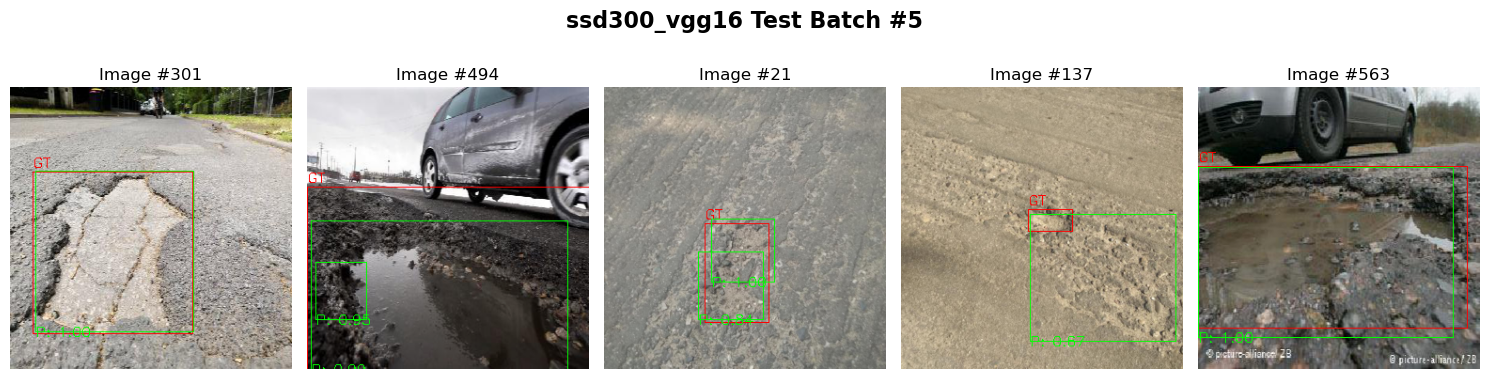

In [4]:

model = trainer.get_model(model_name="ssd300_vgg16")
state_dict = torch.load("data/models/ssd300_vgg16/ssd300_vgg16_best.pth", weights_only=True)
model.load_state_dict(state_dict)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the GPU
model.eval()  # Set the model to evaluation mode

# test the model
evaluator.test_model(model, test_set, device=device, index=None, model_name="ssd300_vgg16")

## SSDLite320_Mobilenet_v3_Large

In [5]:
input_size = 320

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((input_size, input_size)),
    torchvision.transforms.ToTensor(), # uint8 values in [0, 255] -> float tensor with values [0, 1]
    torchvision.transforms.Normalize(mean=data_process.train_mean.tolist(), std=data_process.train_std.tolist())
])

train_set, val_set, test_set = data_process.load_data(transform=transform, input_size=input_size)

Number of valid images: 664
Train set size: 464 - 69.88%
Validation set size: 67 - 10.09%
Test set size: 133 - 20.03%



In [6]:
model_name = "ssdlite320_mobilenet_v3_large"
study_1 = trainer.run_optimization(model_name, train_set, val_set, n_trials=100, study_name=model_name, save_path=os.path.join("data/models", model_name))

[I 2025-01-26 11:32:21,479] A new study created in RDB with name: ssdlite320_mobilenet_v3_large


Checking Model: SSD
Starting Trial #0
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009472961959721175, 'beta1': 0.9658118084445251, 'beta2': 0.9318563294010559, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 8.307341815284441e-06}
Epoch 1/17, Train Loss: 267.1082, Val mAP@50: 0.3518, FPS: 447.25, Epoch Time: 5.15 seconds
Epoch 2/17, Train Loss: 188.2864, Val mAP@50: 0.3529, FPS: 569.26, Epoch Time: 4.85 seconds
Epoch 3/17, Train Loss: 140.7930, Val mAP@50: 0.3943, FPS: 570.59, Epoch Time: 4.66 seconds
Epoch 4/17, Train Loss: 106.6402, Val mAP@50: 0.3848, FPS: 570.74, Epoch Time: 4.66 seconds
Epoch 5/17, Train Loss: 87.1780, Val mAP@50: 0.4214, FPS: 567.87, Epoch Time: 4.67 seconds
Epoch 6/17, Train Loss: 69.9811, Val mAP@50: 0.4452, FPS: 565.56, Epoch Time: 4.67 seconds
Epoch 7/17, Train Loss: 55.5161, Val mAP@50: 0.4590, FPS: 568.09, Epoch Time: 4.68 seconds
Epoch 8/17, Train Loss: 49.5148, Val mAP@50: 0.4716, FPS: 567.66, Ep

[I 2025-01-26 11:33:42,196] Trial 0 finished with value: 0.4974876344203949 and parameters: {'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009472961959721175, 'beta1': 0.9658118084445251, 'beta2': 0.9318563294010559, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 8.307341815284441e-06}. Best is trial 0 with value: 0.4974876344203949.


Epoch 17/17, Train Loss: 60.7662, Val mAP@50: 0.4298, FPS: 562.52, Epoch Time: 4.71 seconds
Best Epoch: 13, Best Val mAP@50: 0.4975, Training Time: 80.26 seconds
Model training complete.
Checking Model: SSD
Starting Trial #1
{'batch_size': 6, 'epochs': 13, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0004904539339172869, 'beta1': 0.9169765854389738, 'beta2': 0.9282853454922604, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.16714116943161034}
Epoch 1/13, Train Loss: 517.5812, Val mAP@50: 0.0950, FPS: 421.65, Epoch Time: 5.07 seconds
Epoch 2/13, Train Loss: 359.9614, Val mAP@50: 0.2146, FPS: 531.27, Epoch Time: 4.93 seconds
Epoch 3/13, Train Loss: 279.8373, Val mAP@50: 0.3390, FPS: 529.07, Epoch Time: 4.93 seconds
Epoch 4/13, Train Loss: 226.5199, Val mAP@50: 0.3373, FPS: 529.97, Epoch Time: 4.92 seconds
Epoch 5/13, Train Loss: 181.9323, Val mAP@50: 0.4143, FPS: 530.03, Epoch Time: 4.94 seconds
Epoch 6/13, Train Loss: 139.6035, Val mAP@50: 0.3986, FPS: 528.49, Epoch Time:

[I 2025-01-26 11:34:46,858] Trial 1 finished with value: 0.41841626167297363 and parameters: {'batch_size': 6, 'epochs': 13, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0004904539339172869, 'beta1': 0.9169765854389738, 'beta2': 0.9282853454922604, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.16714116943161034}. Best is trial 0 with value: 0.4974876344203949.


Epoch 13/13, Train Loss: 90.4208, Val mAP@50: 0.4184, FPS: 528.12, Epoch Time: 4.95 seconds
Best Epoch: 12, Best Val mAP@50: 0.4184, Training Time: 64.17 seconds
Model training complete.
Checking Model: SSD
Starting Trial #2
{'batch_size': 8, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.004241247429282568, 'weight_decay': 0.1260926568334326, 'momentum': 0.9492067843282642, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.17734318931932058}
Epoch 1/17, Train Loss: 2299.3609, Val mAP@50: 0.0519, FPS: 478.39, Epoch Time: 4.24 seconds
Epoch 2/17, Train Loss: 1319.7788, Val mAP@50: 0.1102, FPS: 615.83, Epoch Time: 4.08 seconds
Epoch 3/17, Train Loss: 1337.3825, Val mAP@50: 0.0665, FPS: 610.26, Epoch Time: 4.13 seconds
Epoch 4/17, Train Loss: 1269.3794, Val mAP@50: 0.0336, FPS: 630.76, Epoch Time: 4.07 seconds
Epoch 5/17, Train Loss: 1142.4481, Val mAP@50: 0.0587, FPS: 630.45, Epoch Time: 3.97 seconds
Epoch 6/17, Train Loss: 640.2247, Val mAP@50: 0.0906, FPS: 

[I 2025-01-26 11:35:55,503] Trial 2 finished with value: 0.15018205344676971 and parameters: {'batch_size': 8, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.004241247429282568, 'weight_decay': 0.1260926568334326, 'momentum': 0.9492067843282642, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.17734318931932058}. Best is trial 0 with value: 0.4974876344203949.


Epoch 17/17, Train Loss: 304.1388, Val mAP@50: 0.1178, FPS: 626.14, Epoch Time: 3.97 seconds
Best Epoch: 12, Best Val mAP@50: 0.1502, Training Time: 68.19 seconds
Model training complete.
Checking Model: SSD
Starting Trial #3
{'batch_size': 8, 'epochs': 13, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9895977596972944, 'lr': 0.016590045793740463, 'weight_decay': 5.129973236412686e-05, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.056083539958035666}
Epoch 1/13, Train Loss: 430.8902, Val mAP@50: 0.1986, FPS: 627.97, Epoch Time: 3.97 seconds
Epoch 2/13, Train Loss: 530.6702, Val mAP@50: 0.1908, FPS: 629.22, Epoch Time: 3.97 seconds
Epoch 3/13, Train Loss: 620.8559, Val mAP@50: 0.2115, FPS: 630.56, Epoch Time: 3.99 seconds
Epoch 4/13, Train Loss: 695.5719, Val mAP@50: 0.1684, FPS: 630.31, Epoch Time: 3.95 seconds
Epoch 5/13, Train Loss: 772.8845, Val mAP@50: 0.2067, FPS: 630.51, Epoch Time: 3.98 seconds
Epoch 6/13, Train Loss: 642.9012, Val mAP@50: 0.2630, FPS: 630.

[I 2025-01-26 11:36:47,485] Trial 3 finished with value: 0.27041399478912354 and parameters: {'batch_size': 8, 'epochs': 13, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9895977596972944, 'lr': 0.016590045793740463, 'weight_decay': 5.129973236412686e-05, 'scheduler': 'StepLR', 'step_size': 5, 'gamma': 0.056083539958035666}. Best is trial 0 with value: 0.4974876344203949.


Epoch 13/13, Train Loss: 334.1108, Val mAP@50: 0.2476, FPS: 627.76, Epoch Time: 3.99 seconds
Best Epoch: 7, Best Val mAP@50: 0.2704, Training Time: 51.53 seconds
Model training complete.
Checking Model: SSD
Starting Trial #4
{'batch_size': 6, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9603940213174831, 'lr': 0.032155547841981214, 'weight_decay': 4.760099310748672e-05, 'scheduler': 'OneCycleLR', 'max_lr': 0.004548729885792942}
Epoch 1/17, Train Loss: 409.2793, Val mAP@50: 0.2489, FPS: 521.05, Epoch Time: 4.94 seconds
Epoch 2/17, Train Loss: 300.6858, Val mAP@50: 0.3241, FPS: 537.44, Epoch Time: 4.84 seconds
Epoch 3/17, Train Loss: 269.3534, Val mAP@50: 0.3293, FPS: 536.43, Epoch Time: 4.83 seconds
Epoch 4/17, Train Loss: 244.5226, Val mAP@50: 0.3306, FPS: 536.59, Epoch Time: 4.82 seconds
Epoch 5/17, Train Loss: 228.7178, Val mAP@50: 0.3568, FPS: 537.06, Epoch Time: 4.82 seconds
Epoch 6/17, Train Loss: 216.3447, Val mAP@50: 0.3267, FPS: 536.59, Epoch

[I 2025-01-26 11:38:09,806] Trial 4 finished with value: 0.37547585368156433 and parameters: {'batch_size': 6, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9603940213174831, 'lr': 0.032155547841981214, 'weight_decay': 4.760099310748672e-05, 'scheduler': 'OneCycleLR', 'max_lr': 0.004548729885792942}. Best is trial 0 with value: 0.4974876344203949.


Epoch 17/17, Train Loss: 140.4607, Val mAP@50: 0.3529, FPS: 544.14, Epoch Time: 4.78 seconds
Best Epoch: 10, Best Val mAP@50: 0.3755, Training Time: 81.90 seconds
Model training complete.
Checking Model: SSD
Starting Trial #5
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0012548593198908888, 'weight_decay': 0.5380377852807633, 'momentum': 0.9780810792026231, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.2973243346544745, 'patience': 3}
Epoch 1/17, Train Loss: 1373.5711, Val mAP@50: 0.0027, FPS: 561.50, Epoch Time: 4.95 seconds
Epoch 2/17, Train Loss: 652.6092, Val mAP@50: 0.0041, FPS: 560.95, Epoch Time: 4.96 seconds
Epoch 3/17, Train Loss: 461.2014, Val mAP@50: 0.0003, FPS: 561.36, Epoch Time: 5.14 seconds
Epoch 4/17, Train Loss: 417.7865, Val mAP@50: 0.0000, FPS: 558.03, Epoch Time: 4.64 seconds
Epoch 5/17, Train Loss: 407.1767, Val mAP@50: 0.0000, FPS: 556.52, Epoch Time: 4.64 seconds


[I 2025-01-26 11:38:39,234] Trial 5 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #6
{'batch_size': 7, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.947830250449445, 'lr': 0.0083742433416178, 'weight_decay': 1.0003658748852571e-05, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 4.0935047202991817e-07}
Epoch 1/16, Train Loss: 322.2926, Val mAP@50: 0.1670, FPS: 558.03, Epoch Time: 4.68 seconds
Epoch 2/16, Train Loss: 223.8464, Val mAP@50: 0.3928, FPS: 557.91, Epoch Time: 4.64 seconds
Epoch 3/16, Train Loss: 172.6925, Val mAP@50: 0.3923, FPS: 558.09, Epoch Time: 4.62 seconds
Epoch 4/16, Train Loss: 133.5812, Val mAP@50: 0.4190, FPS: 551.72, Epoch Time: 4.64 seconds
Epoch 5/16, Train Loss: 110.7578, Val mAP@50: 0.4071, FPS: 556.77, Epoch Time: 4.62 seconds
Epoch 6/16, Train Loss: 103.2951, Val mAP@50: 0.4071, FPS: 556.22, Epoch Time: 4.64 seconds
Epoch 7/16, Train Loss: 102.8505, Val mAP@50: 0.4084, FPS: 555.19, Epoch Time: 4.63 seconds
Epoch 8/16, Train Lo

[I 2025-01-26 11:39:53,963] Trial 6 finished with value: 0.4528217017650604 and parameters: {'batch_size': 7, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.947830250449445, 'lr': 0.0083742433416178, 'weight_decay': 1.0003658748852571e-05, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 4.0935047202991817e-07}. Best is trial 0 with value: 0.4974876344203949.


Epoch 16/16, Train Loss: 54.2044, Val mAP@50: 0.4262, FPS: 550.43, Epoch Time: 4.65 seconds
Best Epoch: 11, Best Val mAP@50: 0.4528, Training Time: 74.25 seconds
Model training complete.
Checking Model: SSD
Starting Trial #7
{'batch_size': 6, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.0035675054331891385, 'weight_decay': 0.10566344366433493, 'momentum': 0.9775188644231251, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.29754314502094625, 'patience': 2}
Epoch 1/17, Train Loss: 4120.6225, Val mAP@50: 0.0487, FPS: 526.78, Epoch Time: 4.35 seconds
Epoch 2/17, Train Loss: 2952.3974, Val mAP@50: 0.0620, FPS: 526.31, Epoch Time: 4.36 seconds
Epoch 3/17, Train Loss: 2503.9365, Val mAP@50: 0.0349, FPS: 525.46, Epoch Time: 4.33 seconds
Epoch 4/17, Train Loss: 2717.6293, Val mAP@50: 0.0493, FPS: 524.95, Epoch Time: 4.35 seconds
Epoch 5/17, Train Loss: 2472.4763, Val mAP@50: 0.0427, FPS: 524.35, Epoch Time: 4.37 seconds


[I 2025-01-26 11:40:20,513] Trial 7 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #8
{'batch_size': 7, 'epochs': 14, 'preweight_mode': 'random', 'optimizer': 'RMSprop', 'lr': 0.0010523472087119428, 'weight_decay': 0.11239553251294436, 'momentum': 0.902710004059513, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.13439332022060319, 'patience': 4}
Epoch 1/14, Train Loss: 2225.0518, Val mAP@50: 0.0005, FPS: 531.44, Epoch Time: 5.07 seconds
Epoch 2/14, Train Loss: 531.7436, Val mAP@50: 0.0000, FPS: 555.44, Epoch Time: 4.69 seconds
Epoch 3/14, Train Loss: 401.5812, Val mAP@50: 0.0000, FPS: 554.17, Epoch Time: 4.70 seconds
Epoch 4/14, Train Loss: 387.2179, Val mAP@50: 0.0000, FPS: 555.93, Epoch Time: 4.70 seconds


[I 2025-01-26 11:40:44,789] Trial 8 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #9
{'batch_size': 7, 'epochs': 18, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9831718577670245, 'lr': 0.007603115846075662, 'weight_decay': 3.626824917046231e-05, 'scheduler': 'CosineAnnealingLR', 'T_max': 12, 'eta_min': 8.368075421103245e-07}
Epoch 1/18, Train Loss: 380.6231, Val mAP@50: 0.2047, FPS: 558.05, Epoch Time: 4.17 seconds
Epoch 2/18, Train Loss: 383.1058, Val mAP@50: 0.2222, FPS: 557.05, Epoch Time: 4.15 seconds
Epoch 3/18, Train Loss: 388.9546, Val mAP@50: 0.1837, FPS: 558.43, Epoch Time: 4.15 seconds
Epoch 4/18, Train Loss: 367.8156, Val mAP@50: 0.2595, FPS: 557.60, Epoch Time: 4.15 seconds
Epoch 5/18, Train Loss: 357.4737, Val mAP@50: 0.2116, FPS: 554.29, Epoch Time: 4.15 seconds


[I 2025-01-26 11:41:10,136] Trial 9 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #10
{'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00014503690487943202, 'beta1': 0.9916522872242333, 'beta2': 0.9737743550994198, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 9.50738167719459e-06}
Epoch 1/20, Train Loss: 478.0017, Val mAP@50: 0.2945, FPS: 406.32, Epoch Time: 5.67 seconds
Epoch 2/20, Train Loss: 335.4040, Val mAP@50: 0.3660, FPS: 406.93, Epoch Time: 5.64 seconds
Epoch 3/20, Train Loss: 280.0840, Val mAP@50: 0.3455, FPS: 406.73, Epoch Time: 5.61 seconds
Epoch 4/20, Train Loss: 239.5952, Val mAP@50: 0.3783, FPS: 406.80, Epoch Time: 5.62 seconds
Epoch 5/20, Train Loss: 218.6783, Val mAP@50: 0.4113, FPS: 404.77, Epoch Time: 5.64 seconds
Epoch 6/20, Train Loss: 201.2356, Val mAP@50: 0.3935, FPS: 405.99, Epoch Time: 5.62 seconds
Epoch 7/20, Train Loss: 193.1524, Val mAP@50: 0.3831, FPS: 406.31, Epoch Time: 5.62 seconds
Epoch 8/20, Train Loss: 188.0

[I 2025-01-26 11:43:03,841] Trial 10 finished with value: 0.44797083735466003 and parameters: {'batch_size': 4, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00014503690487943202, 'beta1': 0.9916522872242333, 'beta2': 0.9737743550994198, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 9.50738167719459e-06}. Best is trial 0 with value: 0.4974876344203949.


Epoch 20/20, Train Loss: 83.9757, Val mAP@50: 0.4301, FPS: 412.54, Epoch Time: 5.90 seconds
Best Epoch: 14, Best Val mAP@50: 0.4480, Training Time: 113.25 seconds
Model training complete.
Checking Model: SSD
Starting Trial #11
{'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003384258890769117, 'weight_decay': 0.0012196527895053913, 'beta1': 0.8073762627164024, 'beta2': 0.9066079693960244, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 1.2134302876896412e-07}
Epoch 1/11, Train Loss: 353.0742, Val mAP@50: 0.3083, FPS: 477.57, Epoch Time: 5.49 seconds
Epoch 2/11, Train Loss: 237.0552, Val mAP@50: 0.3658, FPS: 476.38, Epoch Time: 5.40 seconds
Epoch 3/11, Train Loss: 187.6958, Val mAP@50: 0.3861, FPS: 476.24, Epoch Time: 5.40 seconds
Epoch 4/11, Train Loss: 148.3863, Val mAP@50: 0.3948, FPS: 475.46, Epoch Time: 5.41 seconds
Epoch 5/11, Train Loss: 129.0446, Val mAP@50: 0.3937, FPS: 475.18, Epoch Time: 5.39 seconds
Epoch 6/11, Train L

[I 2025-01-26 11:44:03,520] Trial 11 finished with value: 0.40913841128349304 and parameters: {'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003384258890769117, 'weight_decay': 0.0012196527895053913, 'beta1': 0.8073762627164024, 'beta2': 0.9066079693960244, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 1.2134302876896412e-07}. Best is trial 0 with value: 0.4974876344203949.


Epoch 11/11, Train Loss: 111.5896, Val mAP@50: 0.3924, FPS: 475.35, Epoch Time: 5.25 seconds
Best Epoch: 9, Best Val mAP@50: 0.4091, Training Time: 59.20 seconds
Model training complete.
Checking Model: SSD
Starting Trial #12
{'batch_size': 7, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0022044027078380922, 'beta1': 0.989996678042705, 'beta2': 0.9556592581729016, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 5.194260790757513e-07}


/home/user_138/anaconda3/envs/ultralytics-env/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch 1/15, Train Loss: 359.1110, Val mAP@50: 0.0088, FPS: 568.46, Epoch Time: 4.83 seconds
Epoch 2/15, Train Loss: 268.4576, Val mAP@50: 0.1195, FPS: 566.70, Epoch Time: 4.68 seconds
Epoch 3/15, Train Loss: 228.4503, Val mAP@50: 0.3661, FPS: 566.84, Epoch Time: 4.65 seconds
Epoch 4/15, Train Loss: 197.3095, Val mAP@50: 0.4192, FPS: 566.06, Epoch Time: 4.64 seconds
Epoch 5/15, Train Loss: 167.2394, Val mAP@50: 0.4062, FPS: 564.87, Epoch Time: 4.63 seconds
Epoch 6/15, Train Loss: 146.2915, Val mAP@50: 0.4535, FPS: 565.69, Epoch Time: 4.65 seconds
Epoch 7/15, Train Loss: 130.9943, Val mAP@50: 0.4446, FPS: 564.78, Epoch Time: 4.63 seconds
Epoch 8/15, Train Loss: 117.7312, Val mAP@50: 0.4369, FPS: 565.45, Epoch Time: 4.63 seconds
Epoch 9/15, Train Loss: 112.9166, Val mAP@50: 0.4369, FPS: 563.13, Epoch Time: 4.64 seconds
Epoch 10/15, Train Loss: 109.1122, Val mAP@50: 0.4332, FPS: 564.00, Epoch Time: 4.63 seconds
Epoch 11/15, Train Loss: 107.9802, Val mAP@50: 0.4330, FPS: 565.55, Epoch Time:

[I 2025-01-26 11:45:13,750] Trial 12 finished with value: 0.45350199937820435 and parameters: {'batch_size': 7, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0022044027078380922, 'beta1': 0.989996678042705, 'beta2': 0.9556592581729016, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 5.194260790757513e-07}. Best is trial 0 with value: 0.4974876344203949.


Epoch 15/15, Train Loss: 243.8464, Val mAP@50: 0.2062, FPS: 562.28, Epoch Time: 4.63 seconds
Best Epoch: 5, Best Val mAP@50: 0.4535, Training Time: 69.77 seconds
Model training complete.
Checking Model: SSD
Starting Trial #13
{'batch_size': 8, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0014314442121274448, 'beta1': 0.9986576333801604, 'beta2': 0.9536944039218281, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 9.440774871238269e-06}
Epoch 1/20, Train Loss: 270.4998, Val mAP@50: 0.0969, FPS: 608.80, Epoch Time: 4.59 seconds
Epoch 2/20, Train Loss: 211.3955, Val mAP@50: 0.2631, FPS: 610.96, Epoch Time: 4.53 seconds
Epoch 3/20, Train Loss: 183.4890, Val mAP@50: 0.2666, FPS: 608.08, Epoch Time: 4.49 seconds
Epoch 4/20, Train Loss: 173.2103, Val mAP@50: 0.3167, FPS: 609.90, Epoch Time: 4.48 seconds
Epoch 5/20, Train Loss: 152.9729, Val mAP@50: 0.2647, FPS: 610.23, Epoch Time: 4.47 seconds
Epoch 6/20, Train Loss: 145.7258, Val mAP@50: 0.4279, FPS: 61

[I 2025-01-26 11:46:39,613] Trial 13 pruned. 


Trial pruned by Optuna at epoch 18.
Checking Model: SSD
Starting Trial #14
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00213155698356714, 'beta1': 0.9325781739661254, 'beta2': 0.9446937392650938, 'scheduler': 'OneCycleLR', 'max_lr': 0.0001003985682400659}
Epoch 1/15, Train Loss: 654.9296, Val mAP@50: 0.0216, FPS: 476.17, Epoch Time: 5.75 seconds
Epoch 2/15, Train Loss: 577.7037, Val mAP@50: 0.0319, FPS: 474.74, Epoch Time: 5.73 seconds
Epoch 3/15, Train Loss: 532.9552, Val mAP@50: 0.0403, FPS: 475.84, Epoch Time: 5.82 seconds
Epoch 4/15, Train Loss: 494.5248, Val mAP@50: 0.0538, FPS: 476.30, Epoch Time: 5.67 seconds
Epoch 5/15, Train Loss: 469.6868, Val mAP@50: 0.0767, FPS: 476.08, Epoch Time: 5.61 seconds


[I 2025-01-26 11:47:14,102] Trial 14 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #15
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006290976588477927, 'beta1': 0.9576171586672484, 'beta2': 0.9890188035701512, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 2.3613990057200564e-06}
Epoch 1/10, Train Loss: 254.0309, Val mAP@50: 0.4029, FPS: 563.12, Epoch Time: 4.66 seconds
Epoch 2/10, Train Loss: 168.6424, Val mAP@50: 0.4447, FPS: 565.91, Epoch Time: 4.65 seconds
Epoch 3/10, Train Loss: 132.8352, Val mAP@50: 0.4893, FPS: 564.63, Epoch Time: 4.65 seconds
Epoch 4/10, Train Loss: 110.2412, Val mAP@50: 0.3874, FPS: 563.97, Epoch Time: 4.63 seconds
Epoch 5/10, Train Loss: 90.8150, Val mAP@50: 0.4554, FPS: 562.88, Epoch Time: 4.64 seconds
Epoch 6/10, Train Loss: 72.2387, Val mAP@50: 0.4502, FPS: 563.70, Epoch Time: 4.65 seconds
Epoch 7/10, Train Loss: 62.7333, Val mAP@50: 0.4670, FPS: 563.39, Epoch Time: 4.64 seconds
Epoch 8/10, Train Loss: 54.5463

[I 2025-01-26 11:48:00,989] Trial 15 finished with value: 0.48927041888237 and parameters: {'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006290976588477927, 'beta1': 0.9576171586672484, 'beta2': 0.9890188035701512, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 2.3613990057200564e-06}. Best is trial 0 with value: 0.4974876344203949.


Epoch 10/10, Train Loss: 49.3783, Val mAP@50: 0.4681, FPS: 561.90, Epoch Time: 4.64 seconds
Best Epoch: 2, Best Val mAP@50: 0.4893, Training Time: 46.42 seconds
Model training complete.
Checking Model: SSD
Starting Trial #16
{'batch_size': 5, 'epochs': 10, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0005200320341248299, 'weight_decay': 0.0031580937161196972, 'beta1': 0.9423892311488629, 'beta2': 0.9973608664851793, 'scheduler': 'CosineAnnealingLR', 'T_max': 12, 'eta_min': 2.7025184425869487e-06}
Epoch 1/10, Train Loss: 625.3503, Val mAP@50: 0.1483, FPS: 476.28, Epoch Time: 5.16 seconds
Epoch 2/10, Train Loss: 418.2174, Val mAP@50: 0.3204, FPS: 475.92, Epoch Time: 5.14 seconds
Epoch 3/10, Train Loss: 329.4937, Val mAP@50: 0.3839, FPS: 476.10, Epoch Time: 5.14 seconds
Epoch 4/10, Train Loss: 261.4567, Val mAP@50: 0.3892, FPS: 474.92, Epoch Time: 5.14 seconds
Epoch 5/10, Train Loss: 210.8967, Val mAP@50: 0.4070, FPS: 475.57, Epoch Time: 5.14 seconds
Epoch 6/10, Train Loss: 1

[I 2025-01-26 11:48:52,871] Trial 16 finished with value: 0.41775262355804443 and parameters: {'batch_size': 5, 'epochs': 10, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0005200320341248299, 'weight_decay': 0.0031580937161196972, 'beta1': 0.9423892311488629, 'beta2': 0.9973608664851793, 'scheduler': 'CosineAnnealingLR', 'T_max': 12, 'eta_min': 2.7025184425869487e-06}. Best is trial 0 with value: 0.4974876344203949.


Epoch 10/10, Train Loss: 107.1979, Val mAP@50: 0.4123, FPS: 474.99, Epoch Time: 5.13 seconds
Best Epoch: 5, Best Val mAP@50: 0.4178, Training Time: 51.37 seconds
Model training complete.
Checking Model: SSD
Starting Trial #17
{'batch_size': 8, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00019270658471974076, 'beta1': 0.8639585571392074, 'beta2': 0.9940354693968977, 'scheduler': 'CosineAnnealingLR', 'T_max': 15, 'eta_min': 2.586874497396325e-06}
Epoch 1/12, Train Loss: 243.9459, Val mAP@50: 0.2860, FPS: 613.37, Epoch Time: 4.47 seconds
Epoch 2/12, Train Loss: 169.0863, Val mAP@50: 0.3273, FPS: 614.11, Epoch Time: 4.46 seconds
Epoch 3/12, Train Loss: 140.1388, Val mAP@50: 0.3475, FPS: 612.17, Epoch Time: 4.46 seconds
Epoch 4/12, Train Loss: 119.7001, Val mAP@50: 0.4024, FPS: 611.54, Epoch Time: 4.47 seconds
Epoch 5/12, Train Loss: 105.3679, Val mAP@50: 0.3824, FPS: 610.98, Epoch Time: 4.45 seconds
Epoch 6/12, Train Loss: 93.5651, Val mAP@50: 0.3609, FPS: 6

[I 2025-01-26 11:49:24,498] Trial 17 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #18
{'batch_size': 6, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006285330044348009, 'beta1': 0.9547958793693709, 'beta2': 0.9209997338469166, 'scheduler': 'OneCycleLR', 'max_lr': 0.0002820910173982703}
Epoch 1/10, Train Loss: 501.1216, Val mAP@50: 0.0385, FPS: 532.66, Epoch Time: 5.39 seconds
Epoch 2/10, Train Loss: 406.0271, Val mAP@50: 0.1294, FPS: 533.58, Epoch Time: 5.30 seconds
Epoch 3/10, Train Loss: 364.6241, Val mAP@50: 0.1791, FPS: 533.49, Epoch Time: 5.05 seconds
Epoch 4/10, Train Loss: 335.2896, Val mAP@50: 0.2060, FPS: 532.91, Epoch Time: 4.91 seconds
Epoch 5/10, Train Loss: 311.5430, Val mAP@50: 0.2003, FPS: 532.31, Epoch Time: 4.85 seconds


[I 2025-01-26 11:49:55,364] Trial 18 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #19
{'batch_size': 7, 'epochs': 19, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.00027808110123049096, 'beta1': 0.8961416390967616, 'beta2': 0.967510129694258, 'scheduler': 'CosineAnnealingLR', 'T_max': 11, 'eta_min': 2.9455904250870387e-06}
Epoch 1/19, Train Loss: 472.4172, Val mAP@50: 0.0447, FPS: 565.40, Epoch Time: 4.76 seconds
Epoch 2/19, Train Loss: 340.9688, Val mAP@50: 0.1691, FPS: 564.97, Epoch Time: 4.77 seconds
Epoch 3/19, Train Loss: 284.0379, Val mAP@50: 0.2188, FPS: 562.73, Epoch Time: 4.87 seconds
Epoch 4/19, Train Loss: 245.3844, Val mAP@50: 0.2657, FPS: 560.91, Epoch Time: 4.86 seconds
Epoch 5/19, Train Loss: 212.4825, Val mAP@50: 0.2984, FPS: 565.71, Epoch Time: 4.86 seconds


[I 2025-01-26 11:50:24,813] Trial 19 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #20
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007023022927122185, 'weight_decay': 0.002764284364808125, 'beta1': 0.9697488988939813, 'beta2': 0.9344092048632907, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 4.697526547246628e-06}
Epoch 1/14, Train Loss: 465.9727, Val mAP@50: 0.3108, FPS: 413.40, Epoch Time: 5.95 seconds
Epoch 2/14, Train Loss: 324.9843, Val mAP@50: 0.4041, FPS: 413.37, Epoch Time: 5.92 seconds
Epoch 3/14, Train Loss: 246.2512, Val mAP@50: 0.4043, FPS: 412.99, Epoch Time: 5.78 seconds
Epoch 4/14, Train Loss: 199.5798, Val mAP@50: 0.3619, FPS: 413.26, Epoch Time: 5.70 seconds
Epoch 5/14, Train Loss: 153.6788, Val mAP@50: 0.4329, FPS: 412.76, Epoch Time: 5.68 seconds
Epoch 6/14, Train Loss: 123.7063, Val mAP@50: 0.4614, FPS: 412.87, Epoch Time: 5.74 seconds
Epoch 7/14, Train Loss: 103.9695, Val mAP@50: 0.4524, FPS: 413.07, Epoch Time: 5.7

[I 2025-01-26 11:51:46,109] Trial 20 finished with value: 0.4996585547924042 and parameters: {'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007023022927122185, 'weight_decay': 0.002764284364808125, 'beta1': 0.9697488988939813, 'beta2': 0.9344092048632907, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 4.697526547246628e-06}. Best is trial 20 with value: 0.4996585547924042.


Epoch 14/14, Train Loss: 129.3415, Val mAP@50: 0.4630, FPS: 412.24, Epoch Time: 5.82 seconds
Best Epoch: 12, Best Val mAP@50: 0.4997, Training Time: 80.82 seconds
Model training complete.
Checking Model: SSD
Starting Trial #21
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007140355911085943, 'weight_decay': 0.002824725161918129, 'beta1': 0.9672180633231544, 'beta2': 0.9358220549717365, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 3.781177687387754e-06}
Epoch 1/12, Train Loss: 476.7698, Val mAP@50: 0.4224, FPS: 415.05, Epoch Time: 5.75 seconds
Epoch 2/12, Train Loss: 320.7399, Val mAP@50: 0.4302, FPS: 414.35, Epoch Time: 5.73 seconds
Epoch 3/12, Train Loss: 245.1514, Val mAP@50: 0.3881, FPS: 414.38, Epoch Time: 5.75 seconds
Epoch 4/12, Train Loss: 193.3146, Val mAP@50: 0.4152, FPS: 412.80, Epoch Time: 5.79 seconds
Epoch 5/12, Train Loss: 152.0243, Val mAP@50: 0.4647, FPS: 414.42, Epoch Time: 5.76 seconds
Epoch 6/12, Train Los

[I 2025-01-26 11:52:55,473] Trial 21 finished with value: 0.4874468445777893 and parameters: {'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007140355911085943, 'weight_decay': 0.002824725161918129, 'beta1': 0.9672180633231544, 'beta2': 0.9358220549717365, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 3.781177687387754e-06}. Best is trial 20 with value: 0.4996585547924042.


Epoch 12/12, Train Loss: 101.3077, Val mAP@50: 0.4874, FPS: 412.73, Epoch Time: 5.71 seconds
Best Epoch: 11, Best Val mAP@50: 0.4874, Training Time: 68.89 seconds
Model training complete.
Checking Model: SSD
Starting Trial #22
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007738795923885415, 'weight_decay': 0.0023306250908685716, 'beta1': 0.9694173724513381, 'beta2': 0.917227794371557, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 5.363877910359597e-06}
Epoch 1/14, Train Loss: 477.5165, Val mAP@50: 0.3732, FPS: 414.51, Epoch Time: 5.75 seconds
Epoch 2/14, Train Loss: 332.6052, Val mAP@50: 0.4153, FPS: 413.70, Epoch Time: 5.79 seconds
Epoch 3/14, Train Loss: 252.8169, Val mAP@50: 0.3896, FPS: 413.83, Epoch Time: 5.75 seconds
Epoch 4/14, Train Loss: 206.6501, Val mAP@50: 0.3996, FPS: 411.04, Epoch Time: 5.75 seconds
Epoch 5/14, Train Loss: 162.4460, Val mAP@50: 0.4613, FPS: 413.31, Epoch Time: 5.77 seconds
Epoch 6/14, Train Los

[I 2025-01-26 11:54:17,137] Trial 22 finished with value: 0.4781184196472168 and parameters: {'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007738795923885415, 'weight_decay': 0.0023306250908685716, 'beta1': 0.9694173724513381, 'beta2': 0.917227794371557, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 5.363877910359597e-06}. Best is trial 20 with value: 0.4996585547924042.


Epoch 14/14, Train Loss: 74.5712, Val mAP@50: 0.4676, FPS: 412.62, Epoch Time: 5.91 seconds
Best Epoch: 9, Best Val mAP@50: 0.4781, Training Time: 81.20 seconds
Model training complete.
Checking Model: SSD
Starting Trial #23
{'batch_size': 5, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003635289933532794, 'weight_decay': 0.004925999935921597, 'beta1': 0.8952546131243354, 'beta2': 0.9374173569386427, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 1.6345488980431772e-06}
Epoch 1/16, Train Loss: 353.1211, Val mAP@50: 0.3634, FPS: 476.54, Epoch Time: 5.46 seconds
Epoch 2/16, Train Loss: 234.0796, Val mAP@50: 0.3857, FPS: 478.07, Epoch Time: 5.38 seconds
Epoch 3/16, Train Loss: 184.1738, Val mAP@50: 0.3482, FPS: 477.30, Epoch Time: 5.19 seconds
Epoch 4/16, Train Loss: 147.4519, Val mAP@50: 0.4020, FPS: 469.98, Epoch Time: 5.46 seconds
Epoch 5/16, Train Loss: 123.8507, Val mAP@50: 0.4073, FPS: 469.22, Epoch Time: 5.49 seconds
Epoch 6/16, Train Loss

[I 2025-01-26 11:55:43,179] Trial 23 finished with value: 0.4633995294570923 and parameters: {'batch_size': 5, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0003635289933532794, 'weight_decay': 0.004925999935921597, 'beta1': 0.8952546131243354, 'beta2': 0.9374173569386427, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 1.6345488980431772e-06}. Best is trial 20 with value: 0.4996585547924042.


Epoch 16/16, Train Loss: 76.8693, Val mAP@50: 0.4634, FPS: 474.86, Epoch Time: 5.14 seconds
Best Epoch: 15, Best Val mAP@50: 0.4634, Training Time: 85.56 seconds
Model training complete.
Checking Model: SSD
Starting Trial #24
{'batch_size': 7, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0018412018037014502, 'weight_decay': 0.004923776750471155, 'beta1': 0.9697637270536609, 'beta2': 0.9787142817988222, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 5.50110492404331e-06}
Epoch 1/11, Train Loss: 315.0727, Val mAP@50: 0.0295, FPS: 563.54, Epoch Time: 4.67 seconds
Epoch 2/11, Train Loss: 224.6133, Val mAP@50: 0.3582, FPS: 565.55, Epoch Time: 4.64 seconds
Epoch 3/11, Train Loss: 171.1441, Val mAP@50: 0.4051, FPS: 565.54, Epoch Time: 4.62 seconds
Epoch 4/11, Train Loss: 145.0109, Val mAP@50: 0.4653, FPS: 566.43, Epoch Time: 4.63 seconds
Epoch 5/11, Train Loss: 118.3280, Val mAP@50: 0.4203, FPS: 565.23, Epoch Time: 4.61 seconds
Epoch 6/11, Train Loss

[I 2025-01-26 11:56:34,543] Trial 24 finished with value: 0.48323729634284973 and parameters: {'batch_size': 7, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0018412018037014502, 'weight_decay': 0.004923776750471155, 'beta1': 0.9697637270536609, 'beta2': 0.9787142817988222, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 5.50110492404331e-06}. Best is trial 20 with value: 0.4996585547924042.


Epoch 11/11, Train Loss: 44.4880, Val mAP@50: 0.4741, FPS: 565.09, Epoch Time: 4.62 seconds
Best Epoch: 7, Best Val mAP@50: 0.4832, Training Time: 50.89 seconds
Model training complete.
Checking Model: SSD
Starting Trial #25
{'batch_size': 6, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008302282425112493, 'beta1': 0.9280143772988838, 'beta2': 0.9079452033568551, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.4745040282804865e-06}
Epoch 1/18, Train Loss: 306.7200, Val mAP@50: 0.4543, FPS: 534.50, Epoch Time: 4.85 seconds
Epoch 2/18, Train Loss: 209.8512, Val mAP@50: 0.3899, FPS: 533.99, Epoch Time: 4.81 seconds
Epoch 3/18, Train Loss: 162.5116, Val mAP@50: 0.4348, FPS: 533.35, Epoch Time: 4.81 seconds
Epoch 4/18, Train Loss: 126.4671, Val mAP@50: 0.4173, FPS: 532.64, Epoch Time: 4.81 seconds
Epoch 5/18, Train Loss: 95.5721, Val mAP@50: 0.4798, FPS: 522.90, Epoch Time: 4.85 seconds
Epoch 6/18, Train Loss: 76.1455, Val mAP@50: 0.4984, FPS: 523.

[I 2025-01-26 11:58:02,734] Trial 25 finished with value: 0.5188602805137634 and parameters: {'batch_size': 6, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008302282425112493, 'beta1': 0.9280143772988838, 'beta2': 0.9079452033568551, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.4745040282804865e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 18/18, Train Loss: 62.9105, Val mAP@50: 0.4412, FPS: 522.52, Epoch Time: 4.89 seconds
Best Epoch: 16, Best Val mAP@50: 0.5189, Training Time: 87.73 seconds
Model training complete.
Checking Model: SSD
Starting Trial #26
{'batch_size': 6, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009667751389713361, 'beta1': 0.9160952839515517, 'beta2': 0.9019956596151035, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.4675919867692174}
Epoch 1/19, Train Loss: 308.3367, Val mAP@50: 0.4095, FPS: 526.43, Epoch Time: 4.90 seconds
Epoch 2/19, Train Loss: 209.8188, Val mAP@50: 0.4443, FPS: 523.57, Epoch Time: 4.91 seconds
Epoch 3/19, Train Loss: 144.7921, Val mAP@50: 0.3776, FPS: 524.89, Epoch Time: 4.88 seconds
Epoch 4/19, Train Loss: 114.9778, Val mAP@50: 0.4110, FPS: 524.05, Epoch Time: 4.88 seconds
Epoch 5/19, Train Loss: 87.7789, Val mAP@50: 0.4304, FPS: 524.67, Epoch Time: 4.87 seconds
Epoch 6/19, Train Loss: 74.5188, Val mAP@50: 0.4414, FPS: 524.33, Epoch Ti

[I 2025-01-26 11:59:36,145] Trial 26 finished with value: 0.4637399911880493 and parameters: {'batch_size': 6, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009667751389713361, 'beta1': 0.9160952839515517, 'beta2': 0.9019956596151035, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.4675919867692174}. Best is trial 25 with value: 0.5188602805137634.


Epoch 19/19, Train Loss: 44.7657, Val mAP@50: 0.4626, FPS: 523.36, Epoch Time: 4.89 seconds
Best Epoch: 12, Best Val mAP@50: 0.4637, Training Time: 92.95 seconds
Model training complete.
Checking Model: SSD
Starting Trial #27
{'batch_size': 4, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00024220635291005948, 'weight_decay': 0.0018867416915949438, 'beta1': 0.8639728282927243, 'beta2': 0.9150244915390835, 'scheduler': 'OneCycleLR', 'max_lr': 0.007902825412748147}
Epoch 1/18, Train Loss: 445.0049, Val mAP@50: 0.3524, FPS: 407.33, Epoch Time: 5.62 seconds
Epoch 2/18, Train Loss: 298.5138, Val mAP@50: 0.3662, FPS: 406.82, Epoch Time: 5.62 seconds
Epoch 3/18, Train Loss: 237.9006, Val mAP@50: 0.4139, FPS: 406.29, Epoch Time: 5.62 seconds
Epoch 4/18, Train Loss: 200.1769, Val mAP@50: 0.4143, FPS: 406.66, Epoch Time: 5.62 seconds
Epoch 5/18, Train Loss: 174.1492, Val mAP@50: 0.4225, FPS: 405.07, Epoch Time: 5.63 seconds


[I 2025-01-26 12:00:10,303] Trial 27 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #28
{'batch_size': 5, 'epochs': 16, 'preweight_mode': 'freezing', 'optimizer': 'Adam', 'lr': 0.0015216845386998629, 'beta1': 0.9285691206511162, 'beta2': 0.9279587733203117, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.48066639201291816, 'patience': 5}
Epoch 1/16, Train Loss: 458.6548, Val mAP@50: 0.1896, FPS: 470.45, Epoch Time: 4.42 seconds
Epoch 2/16, Train Loss: 397.2591, Val mAP@50: 0.2589, FPS: 471.07, Epoch Time: 4.43 seconds
Epoch 3/16, Train Loss: 384.9095, Val mAP@50: 0.1821, FPS: 470.27, Epoch Time: 4.40 seconds
Epoch 4/16, Train Loss: 372.9877, Val mAP@50: 0.2338, FPS: 469.89, Epoch Time: 4.41 seconds
Epoch 5/16, Train Loss: 360.5516, Val mAP@50: 0.2243, FPS: 469.72, Epoch Time: 4.41 seconds


[I 2025-01-26 12:00:37,216] Trial 28 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #29
{'batch_size': 6, 'epochs': 14, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0004983956009894162, 'beta1': 0.944763441683859, 'beta2': 0.9441191207164347, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.4911613932666784}
Epoch 1/14, Train Loss: 550.4055, Val mAP@50: 0.0505, FPS: 522.34, Epoch Time: 4.93 seconds
Epoch 2/14, Train Loss: 383.6046, Val mAP@50: 0.2336, FPS: 522.37, Epoch Time: 4.92 seconds
Epoch 3/14, Train Loss: 297.9548, Val mAP@50: 0.3201, FPS: 521.78, Epoch Time: 4.91 seconds
Epoch 4/14, Train Loss: 249.8486, Val mAP@50: 0.3232, FPS: 512.59, Epoch Time: 4.92 seconds
Epoch 5/14, Train Loss: 212.0484, Val mAP@50: 0.3590, FPS: 522.08, Epoch Time: 4.91 seconds


[I 2025-01-26 12:01:07,141] Trial 29 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #30
{'batch_size': 5, 'epochs': 18, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0009180617205126551, 'weight_decay': 0.0043944361997414975, 'beta1': 0.9770283749799348, 'beta2': 0.9102132761233334, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 1.1202623474313075e-06}
Epoch 1/18, Train Loss: 765.4508, Val mAP@50: 0.0612, FPS: 467.50, Epoch Time: 5.23 seconds
Epoch 2/18, Train Loss: 484.9145, Val mAP@50: 0.2344, FPS: 466.89, Epoch Time: 5.20 seconds
Epoch 3/18, Train Loss: 364.9650, Val mAP@50: 0.3142, FPS: 466.98, Epoch Time: 5.20 seconds
Epoch 4/18, Train Loss: 287.9533, Val mAP@50: 0.1255, FPS: 465.90, Epoch Time: 5.20 seconds
Epoch 5/18, Train Loss: 234.5966, Val mAP@50: 0.3997, FPS: 466.42, Epoch Time: 5.19 seconds


[I 2025-01-26 12:01:38,818] Trial 30 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #31
{'batch_size': 7, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0004030152573294077, 'beta1': 0.9544081752906216, 'beta2': 0.9264617047498525, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.6581008767894528e-06}
Epoch 1/19, Train Loss: 264.9623, Val mAP@50: 0.3596, FPS: 556.79, Epoch Time: 4.70 seconds
Epoch 2/19, Train Loss: 169.4174, Val mAP@50: 0.4029, FPS: 557.49, Epoch Time: 4.69 seconds
Epoch 3/19, Train Loss: 132.4275, Val mAP@50: 0.4271, FPS: 557.22, Epoch Time: 4.69 seconds
Epoch 4/19, Train Loss: 106.7891, Val mAP@50: 0.4163, FPS: 556.14, Epoch Time: 4.68 seconds
Epoch 5/19, Train Loss: 89.2404, Val mAP@50: 0.4131, FPS: 556.52, Epoch Time: 4.68 seconds
Epoch 6/19, Train Loss: 74.4555, Val mAP@50: 0.4337, FPS: 555.55, Epoch Time: 4.70 seconds
Epoch 7/19, Train Loss: 64.7205, Val mAP@50: 0.4080, FPS: 554.27, Epoch Time: 4.68 seconds
Epoch 8/19, Train Loss: 59.4533

[I 2025-01-26 12:02:35,467] Trial 31 pruned. 


Trial pruned by Optuna at epoch 11.
Checking Model: SSD
Starting Trial #32
{'batch_size': 8, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006210654348995638, 'beta1': 0.9552801301627989, 'beta2': 0.9579621980876247, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 5.520860852119564e-06}
Epoch 1/15, Train Loss: 225.3655, Val mAP@50: 0.3757, FPS: 598.99, Epoch Time: 4.53 seconds
Epoch 2/15, Train Loss: 147.2269, Val mAP@50: 0.4003, FPS: 603.26, Epoch Time: 4.52 seconds
Epoch 3/15, Train Loss: 112.3112, Val mAP@50: 0.4424, FPS: 602.19, Epoch Time: 4.52 seconds
Epoch 4/15, Train Loss: 86.9519, Val mAP@50: 0.3960, FPS: 601.26, Epoch Time: 4.51 seconds
Epoch 5/15, Train Loss: 69.9179, Val mAP@50: 0.3915, FPS: 600.81, Epoch Time: 4.50 seconds
Epoch 6/15, Train Loss: 58.1733, Val mAP@50: 0.4545, FPS: 611.03, Epoch Time: 4.52 seconds
Epoch 7/15, Train Loss: 48.7758, Val mAP@50: 0.4472, FPS: 610.62, Epoch Time: 4.49 seconds
Epoch 8/15, Train Loss: 44.7947,

[I 2025-01-26 12:03:43,520] Trial 32 finished with value: 0.48060598969459534 and parameters: {'batch_size': 8, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006210654348995638, 'beta1': 0.9552801301627989, 'beta2': 0.9579621980876247, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 5.520860852119564e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 15/15, Train Loss: 45.8735, Val mAP@50: 0.4604, FPS: 611.87, Epoch Time: 4.49 seconds
Best Epoch: 13, Best Val mAP@50: 0.4806, Training Time: 67.59 seconds
Model training complete.
Checking Model: SSD
Starting Trial #33
{'batch_size': 8, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0011406606814117776, 'beta1': 0.9776730226706238, 'beta2': 0.9855611017086054, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 1.738597292223978e-06}
Epoch 1/12, Train Loss: 251.5671, Val mAP@50: 0.2807, FPS: 611.03, Epoch Time: 4.58 seconds
Epoch 2/12, Train Loss: 166.5717, Val mAP@50: 0.3701, FPS: 612.94, Epoch Time: 4.53 seconds
Epoch 3/12, Train Loss: 124.3176, Val mAP@50: 0.4208, FPS: 612.34, Epoch Time: 4.53 seconds
Epoch 4/12, Train Loss: 98.3966, Val mAP@50: 0.4644, FPS: 610.22, Epoch Time: 4.53 seconds
Epoch 5/12, Train Loss: 76.9971, Val mAP@50: 0.4301, FPS: 611.81, Epoch Time: 4.51 seconds
Epoch 6/12, Train Loss: 66.4448, Val mAP@50: 0.4757, FPS: 609.9

[I 2025-01-26 12:04:38,353] Trial 33 finished with value: 0.4756697118282318 and parameters: {'batch_size': 8, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0011406606814117776, 'beta1': 0.9776730226706238, 'beta2': 0.9855611017086054, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 1.738597292223978e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 12/12, Train Loss: 69.9113, Val mAP@50: 0.4537, FPS: 609.18, Epoch Time: 4.53 seconds
Best Epoch: 5, Best Val mAP@50: 0.4757, Training Time: 54.34 seconds
Model training complete.
Checking Model: SSD
Starting Trial #34
{'batch_size': 6, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008161611129658222, 'beta1': 0.9225113203590415, 'beta2': 0.9359921403434411, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.3453102776040606}
Epoch 1/13, Train Loss: 302.1706, Val mAP@50: 0.4431, FPS: 529.38, Epoch Time: 4.95 seconds
Epoch 2/13, Train Loss: 200.9604, Val mAP@50: 0.3885, FPS: 530.10, Epoch Time: 4.92 seconds
Epoch 3/13, Train Loss: 164.0863, Val mAP@50: 0.4126, FPS: 529.35, Epoch Time: 4.93 seconds
Epoch 4/13, Train Loss: 116.0711, Val mAP@50: 0.4122, FPS: 529.41, Epoch Time: 4.92 seconds
Epoch 5/13, Train Loss: 91.7050, Val mAP@50: 0.4497, FPS: 529.29, Epoch Time: 4.95 seconds
Epoch 6/13, Train Loss: 79.7626, Val mAP@50: 0.4042, FPS: 529.81, Epoch Tim

[I 2025-01-26 12:05:42,982] Trial 34 finished with value: 0.47561222314834595 and parameters: {'batch_size': 6, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008161611129658222, 'beta1': 0.9225113203590415, 'beta2': 0.9359921403434411, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.3453102776040606}. Best is trial 25 with value: 0.5188602805137634.


Epoch 13/13, Train Loss: 44.7170, Val mAP@50: 0.4472, FPS: 528.25, Epoch Time: 4.93 seconds
Best Epoch: 9, Best Val mAP@50: 0.4756, Training Time: 64.13 seconds
Model training complete.
Checking Model: SSD
Starting Trial #35
{'batch_size': 7, 'epochs': 17, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.0012921681508767935, 'weight_decay': 0.859760590809172, 'momentum': 0.9140980788574035, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 4.764013524102497e-06}
Epoch 1/17, Train Loss: 803.1547, Val mAP@50: 0.0673, FPS: 567.60, Epoch Time: 4.27 seconds
Epoch 2/17, Train Loss: 599.4206, Val mAP@50: 0.0784, FPS: 565.99, Epoch Time: 4.25 seconds
Epoch 3/17, Train Loss: 545.5883, Val mAP@50: 0.0711, FPS: 565.74, Epoch Time: 4.19 seconds
Epoch 4/17, Train Loss: 518.7701, Val mAP@50: 0.0552, FPS: 564.28, Epoch Time: 4.17 seconds
Epoch 5/17, Train Loss: 484.9095, Val mAP@50: 0.0464, FPS: 564.95, Epoch Time: 4.13 seconds


[I 2025-01-26 12:06:08,603] Trial 35 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #36
{'batch_size': 6, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9282748745315063, 'lr': 0.0055270377697726565, 'weight_decay': 0.00022143317559169366, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 8.730473372190893e-06}
Epoch 1/16, Train Loss: 331.7768, Val mAP@50: 0.3276, FPS: 527.42, Epoch Time: 4.88 seconds
Epoch 2/16, Train Loss: 234.3758, Val mAP@50: 0.4180, FPS: 528.82, Epoch Time: 4.88 seconds
Epoch 3/16, Train Loss: 174.4647, Val mAP@50: 0.3991, FPS: 527.71, Epoch Time: 4.87 seconds
Epoch 4/16, Train Loss: 139.7592, Val mAP@50: 0.4297, FPS: 529.66, Epoch Time: 4.89 seconds
Epoch 5/16, Train Loss: 108.5213, Val mAP@50: 0.4452, FPS: 527.84, Epoch Time: 4.91 seconds
Epoch 6/16, Train Loss: 93.6088, Val mAP@50: 0.4388, FPS: 529.37, Epoch Time: 5.12 seconds
Epoch 7/16, Train Loss: 77.9937, Val mAP@50: 0.4315, FPS: 528.73, Epoch Time: 5.15 seconds
Epoch 8/16, Train

[I 2025-01-26 12:07:29,978] Trial 36 finished with value: 0.469858855009079 and parameters: {'batch_size': 6, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9282748745315063, 'lr': 0.0055270377697726565, 'weight_decay': 0.00022143317559169366, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 8.730473372190893e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 16/16, Train Loss: 58.5367, Val mAP@50: 0.4699, FPS: 519.96, Epoch Time: 5.14 seconds
Best Epoch: 15, Best Val mAP@50: 0.4699, Training Time: 80.93 seconds
Model training complete.
Checking Model: SSD
Starting Trial #37
{'batch_size': 8, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0004420095695260038, 'beta1': 0.9419311029895385, 'beta2': 0.9631004749462752, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.49263999858011187, 'patience': 5}
Epoch 1/17, Train Loss: 225.2861, Val mAP@50: 0.3914, FPS: 605.80, Epoch Time: 4.74 seconds
Epoch 2/17, Train Loss: 145.7010, Val mAP@50: 0.4006, FPS: 606.60, Epoch Time: 4.73 seconds
Epoch 3/17, Train Loss: 113.6187, Val mAP@50: 0.3821, FPS: 609.37, Epoch Time: 4.72 seconds
Epoch 4/17, Train Loss: 90.6755, Val mAP@50: 0.4039, FPS: 605.12, Epoch Time: 4.75 seconds
Epoch 5/17, Train Loss: 76.1128, Val mAP@50: 0.3982, FPS: 608.78, Epoch Time: 4.57 seconds


[I 2025-01-26 12:07:58,485] Trial 37 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #38
{'batch_size': 7, 'epochs': 18, 'preweight_mode': 'freezing', 'optimizer': 'RMSprop', 'lr': 0.001237317120199405, 'weight_decay': 0.29914156455972973, 'momentum': 0.9288094275314263, 'scheduler': 'OneCycleLR', 'max_lr': 0.0012257275254790713}
Epoch 1/18, Train Loss: 344.8820, Val mAP@50: 0.1239, FPS: 568.35, Epoch Time: 4.08 seconds
Epoch 2/18, Train Loss: 330.2261, Val mAP@50: 0.1155, FPS: 570.14, Epoch Time: 4.08 seconds
Epoch 3/18, Train Loss: 337.0670, Val mAP@50: 0.1083, FPS: 569.24, Epoch Time: 4.12 seconds
Epoch 4/18, Train Loss: 352.0997, Val mAP@50: 0.1115, FPS: 562.25, Epoch Time: 4.13 seconds
Epoch 5/18, Train Loss: 357.9005, Val mAP@50: 0.0980, FPS: 570.00, Epoch Time: 4.10 seconds


[I 2025-01-26 12:08:23,593] Trial 38 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #39
{'batch_size': 7, 'epochs': 19, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9637201782788436, 'lr': 0.005596948967388668, 'weight_decay': 0.00025886352852762663, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.33659333467435876}
Epoch 1/19, Train Loss: 316.5656, Val mAP@50: 0.0234, FPS: 568.18, Epoch Time: 4.98 seconds
Epoch 2/19, Train Loss: 235.2608, Val mAP@50: 0.3909, FPS: 567.53, Epoch Time: 4.70 seconds
Epoch 3/19, Train Loss: 186.9916, Val mAP@50: 0.3634, FPS: 568.97, Epoch Time: 4.62 seconds
Epoch 4/19, Train Loss: 163.3051, Val mAP@50: 0.3820, FPS: 567.38, Epoch Time: 4.62 seconds
Epoch 5/19, Train Loss: 124.7243, Val mAP@50: 0.4257, FPS: 567.42, Epoch Time: 4.64 seconds


[I 2025-01-26 12:08:52,217] Trial 39 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #40
{'batch_size': 6, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0025445902084070488, 'beta1': 0.9082294751975747, 'beta2': 0.9463872479632081, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 3.4728150357321186e-06}
Epoch 1/13, Train Loss: 378.6712, Val mAP@50: 0.1866, FPS: 532.84, Epoch Time: 5.05 seconds
Epoch 2/13, Train Loss: 271.5763, Val mAP@50: 0.3038, FPS: 532.74, Epoch Time: 5.18 seconds
Epoch 3/13, Train Loss: 216.1207, Val mAP@50: 0.3630, FPS: 533.78, Epoch Time: 5.18 seconds
Epoch 4/13, Train Loss: 164.5522, Val mAP@50: 0.4246, FPS: 531.85, Epoch Time: 5.19 seconds
Epoch 5/13, Train Loss: 123.9146, Val mAP@50: 0.4295, FPS: 531.34, Epoch Time: 5.19 seconds


[I 2025-01-26 12:09:23,617] Trial 40 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #41
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006868833667511818, 'weight_decay': 0.00318585227978203, 'beta1': 0.9639755014170274, 'beta2': 0.9362287382030126, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 3.866477923777183e-06}
Epoch 1/11, Train Loss: 468.4488, Val mAP@50: 0.3877, FPS: 412.91, Epoch Time: 6.08 seconds
Epoch 2/11, Train Loss: 324.7740, Val mAP@50: 0.4001, FPS: 413.15, Epoch Time: 5.75 seconds
Epoch 3/11, Train Loss: 255.7181, Val mAP@50: 0.4227, FPS: 415.12, Epoch Time: 5.65 seconds
Epoch 4/11, Train Loss: 196.9268, Val mAP@50: 0.4131, FPS: 389.54, Epoch Time: 5.67 seconds
Epoch 5/11, Train Loss: 154.5340, Val mAP@50: 0.4402, FPS: 419.17, Epoch Time: 5.80 seconds
Epoch 6/11, Train Loss: 126.1001, Val mAP@50: 0.4657, FPS: 415.90, Epoch Time: 5.63 seconds
Epoch 7/11, Train Loss: 100.0226, Val mAP@50: 0.4873, FPS: 419.59, Epoch Time: 5.62

[I 2025-01-26 12:10:26,826] Trial 41 finished with value: 0.4872852563858032 and parameters: {'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006868833667511818, 'weight_decay': 0.00318585227978203, 'beta1': 0.9639755014170274, 'beta2': 0.9362287382030126, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 3.866477923777183e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 11/11, Train Loss: 83.6963, Val mAP@50: 0.4609, FPS: 415.92, Epoch Time: 5.73 seconds
Best Epoch: 6, Best Val mAP@50: 0.4873, Training Time: 62.75 seconds
Model training complete.
Checking Model: SSD
Starting Trial #42
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005589625279010385, 'weight_decay': 0.003386335642026796, 'beta1': 0.9806774560928253, 'beta2': 0.9324105307406697, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 2.157499913380272e-06}
Epoch 1/12, Train Loss: 462.5574, Val mAP@50: 0.3754, FPS: 422.79, Epoch Time: 5.74 seconds
Epoch 2/12, Train Loss: 319.6181, Val mAP@50: 0.4222, FPS: 419.47, Epoch Time: 5.44 seconds
Epoch 3/12, Train Loss: 259.2835, Val mAP@50: 0.4389, FPS: 419.83, Epoch Time: 5.44 seconds
Epoch 4/12, Train Loss: 202.4164, Val mAP@50: 0.4126, FPS: 422.38, Epoch Time: 5.44 seconds
Epoch 5/12, Train Loss: 158.2514, Val mAP@50: 0.4278, FPS: 422.62, Epoch Time: 5.41 seconds
Epoch 6/12, Train Loss:

[I 2025-01-26 12:11:34,150] Trial 42 finished with value: 0.48140203952789307 and parameters: {'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005589625279010385, 'weight_decay': 0.003386335642026796, 'beta1': 0.9806774560928253, 'beta2': 0.9324105307406697, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 2.157499913380272e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 12/12, Train Loss: 112.1302, Val mAP@50: 0.4814, FPS: 405.98, Epoch Time: 5.54 seconds
Best Epoch: 11, Best Val mAP@50: 0.4814, Training Time: 66.85 seconds
Model training complete.
Checking Model: SSD
Starting Trial #43
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0008507781697312765, 'weight_decay': 0.0023583665351859925, 'beta1': 0.9554713956062988, 'beta2': 0.9225918551274263, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 7.11570078408111e-06}
Epoch 1/10, Train Loss: 473.7324, Val mAP@50: 0.3951, FPS: 410.38, Epoch Time: 5.67 seconds
Epoch 2/10, Train Loss: 331.2876, Val mAP@50: 0.3734, FPS: 410.80, Epoch Time: 5.59 seconds
Epoch 3/10, Train Loss: 255.2708, Val mAP@50: 0.4351, FPS: 410.20, Epoch Time: 5.61 seconds
Epoch 4/10, Train Loss: 192.9790, Val mAP@50: 0.4423, FPS: 410.88, Epoch Time: 5.60 seconds
Epoch 5/10, Train Loss: 145.4033, Val mAP@50: 0.4337, FPS: 409.74, Epoch Time: 5.60 seconds
Epoch 6/10, Train Los

[I 2025-01-26 12:12:19,469] Trial 43 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #44
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006932024821986156, 'weight_decay': 0.006357194392689777, 'beta1': 0.9391633410345003, 'beta2': 0.9402169226596611, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.1675723987418688e-06}
Epoch 1/12, Train Loss: 452.6314, Val mAP@50: 0.4053, FPS: 410.84, Epoch Time: 5.62 seconds
Epoch 2/12, Train Loss: 309.2523, Val mAP@50: 0.3472, FPS: 410.89, Epoch Time: 5.58 seconds
Epoch 3/12, Train Loss: 247.7044, Val mAP@50: 0.3970, FPS: 409.84, Epoch Time: 5.60 seconds
Epoch 4/12, Train Loss: 200.7228, Val mAP@50: 0.4110, FPS: 418.06, Epoch Time: 5.52 seconds
Epoch 5/12, Train Loss: 160.0620, Val mAP@50: 0.4841, FPS: 419.03, Epoch Time: 5.51 seconds
Epoch 6/12, Train Loss: 126.0896, Val mAP@50: 0.4456, FPS: 417.50, Epoch Time: 5.50 seconds
Epoch 7/12, Train Loss: 99.6618, Val mAP@50: 0.4723, FPS: 417.24, Epoch Time: 5.5

[I 2025-01-26 12:13:26,593] Trial 44 finished with value: 0.49077409505844116 and parameters: {'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006932024821986156, 'weight_decay': 0.006357194392689777, 'beta1': 0.9391633410345003, 'beta2': 0.9402169226596611, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.1675723987418688e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 12/12, Train Loss: 69.5988, Val mAP@50: 0.4729, FPS: 418.58, Epoch Time: 5.52 seconds
Best Epoch: 7, Best Val mAP@50: 0.4908, Training Time: 66.66 seconds
Model training complete.
Checking Model: SSD
Starting Trial #45
{'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0011513086272372352, 'weight_decay': 0.27287737255911687, 'momentum': 0.9306421586016089, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.13755922884586014, 'patience': 2}
Epoch 1/11, Train Loss: 1042.6512, Val mAP@50: 0.0000, FPS: 484.96, Epoch Time: 5.06 seconds
Epoch 2/11, Train Loss: 551.9653, Val mAP@50: 0.0000, FPS: 485.31, Epoch Time: 5.00 seconds
Epoch 3/11, Train Loss: 551.9175, Val mAP@50: 0.0000, FPS: 486.23, Epoch Time: 5.00 seconds
Epoch 4/11, Train Loss: 548.8099, Val mAP@50: 0.0000, FPS: 486.41, Epoch Time: 4.99 seconds


[I 2025-01-26 12:13:52,088] Trial 45 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #46
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'freezing', 'optimizer': 'SGD', 'momentum': 0.9025694994048062, 'lr': 0.005452415032805593, 'weight_decay': 0.0005710110749143373, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.121401812915598e-06}
Epoch 1/14, Train Loss: 574.3192, Val mAP@50: 0.1486, FPS: 421.39, Epoch Time: 4.49 seconds
Epoch 2/14, Train Loss: 517.0763, Val mAP@50: 0.2139, FPS: 422.73, Epoch Time: 4.51 seconds
Epoch 3/14, Train Loss: 493.7555, Val mAP@50: 0.1776, FPS: 421.99, Epoch Time: 4.48 seconds
Epoch 4/14, Train Loss: 471.4808, Val mAP@50: 0.2163, FPS: 420.69, Epoch Time: 4.50 seconds
Epoch 5/14, Train Loss: 454.1403, Val mAP@50: 0.1633, FPS: 419.83, Epoch Time: 4.49 seconds


[I 2025-01-26 12:14:19,471] Trial 46 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #47
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.001657452821627351, 'weight_decay': 0.0065330341683963065, 'beta1': 0.9350656028052048, 'beta2': 0.9419526068464793, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 8.709038712670654e-07}
Epoch 1/10, Train Loss: 292.0103, Val mAP@50: 0.2879, FPS: 577.56, Epoch Time: 4.59 seconds
Epoch 2/10, Train Loss: 206.3877, Val mAP@50: 0.3498, FPS: 573.96, Epoch Time: 4.56 seconds
Epoch 3/10, Train Loss: 165.7804, Val mAP@50: 0.4168, FPS: 576.09, Epoch Time: 4.56 seconds
Epoch 4/10, Train Loss: 128.9243, Val mAP@50: 0.3734, FPS: 574.94, Epoch Time: 4.55 seconds
Epoch 5/10, Train Loss: 101.1001, Val mAP@50: 0.4574, FPS: 574.12, Epoch Time: 4.56 seconds
Epoch 6/10, Train Loss: 81.8750, Val mAP@50: 0.4684, FPS: 573.21, Epoch Time: 4.57 seconds
Epoch 7/10, Train Loss: 62.1177, Val mAP@50: 0.4585, FPS: 575.94, Epoch Time: 4.56 

[I 2025-01-26 12:15:05,564] Trial 47 finished with value: 0.4948207437992096 and parameters: {'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.001657452821627351, 'weight_decay': 0.0065330341683963065, 'beta1': 0.9350656028052048, 'beta2': 0.9419526068464793, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 8.709038712670654e-07}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 38.7801, Val mAP@50: 0.4858, FPS: 574.54, Epoch Time: 4.58 seconds
Best Epoch: 7, Best Val mAP@50: 0.4948, Training Time: 45.63 seconds
Model training complete.
Checking Model: SSD
Starting Trial #48
{'batch_size': 5, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0018898002153078782, 'weight_decay': 0.007123823646639468, 'beta1': 0.9329779774233344, 'beta2': 0.9419423196263085, 'scheduler': 'CosineAnnealingLR', 'T_max': 11, 'eta_min': 6.77356151663785e-07}
Epoch 1/15, Train Loss: 433.5857, Val mAP@50: 0.2697, FPS: 486.21, Epoch Time: 5.07 seconds
Epoch 2/15, Train Loss: 304.6495, Val mAP@50: 0.4070, FPS: 483.96, Epoch Time: 5.04 seconds
Epoch 3/15, Train Loss: 261.3328, Val mAP@50: 0.3852, FPS: 482.87, Epoch Time: 5.03 seconds
Epoch 4/15, Train Loss: 216.1970, Val mAP@50: 0.4002, FPS: 482.11, Epoch Time: 5.04 seconds
Epoch 5/15, Train Loss: 177.8167, Val mAP@50: 0.4006, FPS: 483.45, Epoch Time: 5.04 seconds
Epoch 6/15, Train Loss:

[I 2025-01-26 12:15:41,327] Trial 48 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #49
{'batch_size': 8, 'epochs': 13, 'preweight_mode': 'random', 'optimizer': 'AdamW', 'lr': 0.0016224517177080271, 'weight_decay': 0.006609263528859682, 'beta1': 0.8835558799513704, 'beta2': 0.9523818529007078, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 2.9398910698230034e-07}
Epoch 1/13, Train Loss: 458.1227, Val mAP@50: 0.1698, FPS: 581.93, Epoch Time: 4.56 seconds
Epoch 2/13, Train Loss: 257.1336, Val mAP@50: 0.2631, FPS: 620.36, Epoch Time: 4.42 seconds
Epoch 3/13, Train Loss: 197.6808, Val mAP@50: 0.3834, FPS: 621.41, Epoch Time: 4.43 seconds
Epoch 4/13, Train Loss: 145.2654, Val mAP@50: 0.3726, FPS: 620.06, Epoch Time: 4.40 seconds
Epoch 5/13, Train Loss: 106.6410, Val mAP@50: 0.4370, FPS: 620.67, Epoch Time: 4.42 seconds


[I 2025-01-26 12:16:08,431] Trial 49 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #50
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0023346255338830687, 'weight_decay': 0.006785517243299471, 'beta1': 0.8104071263475076, 'beta2': 0.9296108375442531, 'scheduler': 'OneCycleLR', 'max_lr': 0.0013943918436225403}
Epoch 1/11, Train Loss: 557.5907, Val mAP@50: 0.2254, FPS: 419.45, Epoch Time: 5.48 seconds
Epoch 2/11, Train Loss: 402.9276, Val mAP@50: 0.2131, FPS: 418.60, Epoch Time: 5.42 seconds
Epoch 3/11, Train Loss: 349.7246, Val mAP@50: 0.2585, FPS: 419.95, Epoch Time: 5.44 seconds
Epoch 4/11, Train Loss: 313.2074, Val mAP@50: 0.3000, FPS: 416.15, Epoch Time: 5.46 seconds
Epoch 5/11, Train Loss: 286.5427, Val mAP@50: 0.3329, FPS: 410.66, Epoch Time: 5.48 seconds


[I 2025-01-26 12:16:42,077] Trial 50 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #51
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0009935649513823713, 'weight_decay': 0.005693203209425332, 'beta1': 0.9442388644758709, 'beta2': 0.949523801069131, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.3127362143439286e-06}
Epoch 1/10, Train Loss: 268.3125, Val mAP@50: 0.3713, FPS: 578.48, Epoch Time: 4.82 seconds
Epoch 2/10, Train Loss: 178.4432, Val mAP@50: 0.3755, FPS: 578.26, Epoch Time: 4.79 seconds
Epoch 3/10, Train Loss: 140.2058, Val mAP@50: 0.4343, FPS: 578.04, Epoch Time: 4.80 seconds
Epoch 4/10, Train Loss: 114.5694, Val mAP@50: 0.4276, FPS: 567.13, Epoch Time: 4.78 seconds
Epoch 5/10, Train Loss: 91.6047, Val mAP@50: 0.3731, FPS: 578.03, Epoch Time: 4.67 seconds


[I 2025-01-26 12:17:10,949] Trial 51 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #52
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0027595450950449623, 'beta1': 0.9869705666100477, 'beta2': 0.9405508134714552, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 7.983436648958839e-07}
Epoch 1/10, Train Loss: 375.5571, Val mAP@50: 0.0103, FPS: 579.36, Epoch Time: 4.66 seconds
Epoch 2/10, Train Loss: 290.5231, Val mAP@50: 0.1186, FPS: 577.58, Epoch Time: 4.59 seconds
Epoch 3/10, Train Loss: 238.2682, Val mAP@50: 0.1286, FPS: 576.19, Epoch Time: 4.60 seconds
Epoch 4/10, Train Loss: 201.7900, Val mAP@50: 0.3570, FPS: 575.16, Epoch Time: 4.58 seconds
Epoch 5/10, Train Loss: 180.1895, Val mAP@50: 0.0973, FPS: 569.02, Epoch Time: 4.57 seconds


[I 2025-01-26 12:17:38,920] Trial 52 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #53
{'batch_size': 7, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0032396687908409416, 'weight_decay': 0.003978090987247389, 'beta1': 0.9150707656501457, 'beta2': 0.9479977394726975, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 5.704962784360562e-07}
Epoch 1/12, Train Loss: 364.6795, Val mAP@50: 0.1968, FPS: 576.00, Epoch Time: 4.64 seconds
Epoch 2/12, Train Loss: 247.8324, Val mAP@50: 0.3247, FPS: 576.50, Epoch Time: 4.58 seconds
Epoch 3/12, Train Loss: 221.0236, Val mAP@50: 0.3976, FPS: 576.26, Epoch Time: 4.57 seconds
Epoch 4/12, Train Loss: 187.9871, Val mAP@50: 0.3222, FPS: 575.71, Epoch Time: 4.55 seconds
Epoch 5/12, Train Loss: 156.5606, Val mAP@50: 0.3977, FPS: 574.43, Epoch Time: 4.57 seconds


[I 2025-01-26 12:18:06,797] Trial 53 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #54
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0005983121657613417, 'beta1': 0.9349723294683753, 'beta2': 0.9099995165350329, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 9.081968830993476e-07}
Epoch 1/10, Train Loss: 256.7457, Val mAP@50: 0.4123, FPS: 575.87, Epoch Time: 4.58 seconds
Epoch 2/10, Train Loss: 170.1326, Val mAP@50: 0.3766, FPS: 576.79, Epoch Time: 4.55 seconds
Epoch 3/10, Train Loss: 130.2466, Val mAP@50: 0.3614, FPS: 574.26, Epoch Time: 4.55 seconds
Epoch 4/10, Train Loss: 104.1285, Val mAP@50: 0.4449, FPS: 574.71, Epoch Time: 4.57 seconds
Epoch 5/10, Train Loss: 81.3747, Val mAP@50: 0.4302, FPS: 569.66, Epoch Time: 4.55 seconds
Epoch 6/10, Train Loss: 65.8805, Val mAP@50: 0.4346, FPS: 573.52, Epoch Time: 4.56 seconds
Epoch 7/10, Train Loss: 55.6667, Val mAP@50: 0.4500, FPS: 572.44, Epoch Time: 4.57 seconds


[I 2025-01-26 12:18:43,738] Trial 54 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #55
{'batch_size': 6, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0004493422303933176, 'weight_decay': 0.006059144887556546, 'beta1': 0.9524512362322967, 'beta2': 0.9243439395930878, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.3710046914715052e-06}
Epoch 1/11, Train Loss: 298.7637, Val mAP@50: 0.3694, FPS: 541.44, Epoch Time: 4.78 seconds
Epoch 2/11, Train Loss: 197.6278, Val mAP@50: 0.3962, FPS: 541.66, Epoch Time: 4.78 seconds
Epoch 3/11, Train Loss: 152.8582, Val mAP@50: 0.4412, FPS: 542.53, Epoch Time: 4.77 seconds
Epoch 4/11, Train Loss: 122.1229, Val mAP@50: 0.4110, FPS: 540.89, Epoch Time: 4.76 seconds
Epoch 5/11, Train Loss: 101.2324, Val mAP@50: 0.4245, FPS: 540.22, Epoch Time: 4.76 seconds


[I 2025-01-26 12:19:12,859] Trial 55 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #56
{'batch_size': 8, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.00010392122900332705, 'beta1': 0.9269890222272295, 'beta2': 0.9586098991075805, 'scheduler': 'CosineAnnealingLR', 'T_max': 11, 'eta_min': 3.657578644319958e-07}
Epoch 1/17, Train Loss: 271.5174, Val mAP@50: 0.3009, FPS: 622.36, Epoch Time: 4.42 seconds
Epoch 2/17, Train Loss: 190.5463, Val mAP@50: 0.2819, FPS: 623.39, Epoch Time: 4.39 seconds
Epoch 3/17, Train Loss: 162.5892, Val mAP@50: 0.3403, FPS: 622.75, Epoch Time: 4.41 seconds
Epoch 4/17, Train Loss: 143.8804, Val mAP@50: 0.3587, FPS: 623.01, Epoch Time: 4.42 seconds
Epoch 5/17, Train Loss: 129.7324, Val mAP@50: 0.3642, FPS: 611.82, Epoch Time: 4.41 seconds


[I 2025-01-26 12:19:39,721] Trial 56 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #57
{'batch_size': 6, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007341708997026202, 'weight_decay': 0.003743561788549016, 'beta1': 0.9958766124327244, 'beta2': 0.900466163270162, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.38108681146166556, 'patience': 3}
Epoch 1/14, Train Loss: 335.7117, Val mAP@50: 0.2563, FPS: 544.18, Epoch Time: 4.79 seconds
Epoch 2/14, Train Loss: 254.8222, Val mAP@50: 0.3161, FPS: 543.36, Epoch Time: 4.77 seconds
Epoch 3/14, Train Loss: 230.3089, Val mAP@50: 0.0066, FPS: 541.39, Epoch Time: 4.88 seconds
Epoch 4/14, Train Loss: 427.2234, Val mAP@50: 0.0029, FPS: 540.84, Epoch Time: 4.76 seconds
Epoch 5/14, Train Loss: 7079.2737, Val mAP@50: 0.0000, FPS: 540.50, Epoch Time: 4.98 seconds


[I 2025-01-26 12:20:09,377] Trial 57 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #58
{'batch_size': 7, 'epochs': 12, 'preweight_mode': 'random', 'optimizer': 'SGD', 'momentum': 0.9660303453742446, 'lr': 0.025534532000802957, 'weight_decay': 0.0007040191223688031, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.9567481648472503e-06}
Epoch 1/12, Train Loss: 12791.7534, Val mAP@50: 0.0000, FPS: 585.15, Epoch Time: 4.64 seconds
Epoch 2/12, Train Loss: 14625.8424, Val mAP@50: 0.0035, FPS: 580.60, Epoch Time: 4.53 seconds
Epoch 3/12, Train Loss: 8293.0831, Val mAP@50: 0.0002, FPS: 577.93, Epoch Time: 4.55 seconds
Epoch 4/12, Train Loss: 4957.0710, Val mAP@50: 0.0006, FPS: 576.46, Epoch Time: 4.74 seconds
Epoch 5/12, Train Loss: 2611.6029, Val mAP@50: 0.0000, FPS: 578.42, Epoch Time: 4.48 seconds


[I 2025-01-26 12:20:37,277] Trial 58 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #59
{'batch_size': 5, 'epochs': 20, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.001126122269778256, 'weight_decay': 0.16223115691636078, 'momentum': 0.9166292542735808, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 2.4114043299979745e-06}
Epoch 1/20, Train Loss: 1037.2781, Val mAP@50: 0.0000, FPS: 474.30, Epoch Time: 5.09 seconds
Epoch 2/20, Train Loss: 546.2649, Val mAP@50: 0.0000, FPS: 473.37, Epoch Time: 5.09 seconds
Epoch 3/20, Train Loss: 540.8567, Val mAP@50: 0.0000, FPS: 473.17, Epoch Time: 5.09 seconds
Epoch 4/20, Train Loss: 540.4630, Val mAP@50: 0.0000, FPS: 473.81, Epoch Time: 5.08 seconds


[I 2025-01-26 12:21:03,147] Trial 59 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #60
{'batch_size': 7, 'epochs': 11, 'preweight_mode': 'freezing', 'optimizer': 'Adam', 'lr': 0.00029369067152645374, 'beta1': 0.9646329150208043, 'beta2': 0.932075071769348, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.05494171106433618}
Epoch 1/11, Train Loss: 328.3705, Val mAP@50: 0.1638, FPS: 562.81, Epoch Time: 4.09 seconds
Epoch 2/11, Train Loss: 281.4296, Val mAP@50: 0.1411, FPS: 562.74, Epoch Time: 4.07 seconds
Epoch 3/11, Train Loss: 269.9837, Val mAP@50: 0.1403, FPS: 562.15, Epoch Time: 4.08 seconds
Epoch 4/11, Train Loss: 262.9732, Val mAP@50: 0.1478, FPS: 560.20, Epoch Time: 4.07 seconds
Epoch 5/11, Train Loss: 263.7276, Val mAP@50: 0.1398, FPS: 559.41, Epoch Time: 4.07 seconds


[I 2025-01-26 12:21:28,033] Trial 60 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #61
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007021883952849901, 'weight_decay': 0.0027037053021000883, 'beta1': 0.9648968140387345, 'beta2': 0.9396300891772563, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 3.82639705249499e-06}
Epoch 1/13, Train Loss: 481.2773, Val mAP@50: 0.3425, FPS: 409.89, Epoch Time: 5.56 seconds
Epoch 2/13, Train Loss: 325.1194, Val mAP@50: 0.4333, FPS: 410.51, Epoch Time: 5.56 seconds
Epoch 3/13, Train Loss: 245.1759, Val mAP@50: 0.4065, FPS: 411.36, Epoch Time: 5.54 seconds
Epoch 4/13, Train Loss: 193.0449, Val mAP@50: 0.4500, FPS: 411.13, Epoch Time: 5.55 seconds
Epoch 5/13, Train Loss: 149.9006, Val mAP@50: 0.4438, FPS: 410.13, Epoch Time: 5.53 seconds
Epoch 6/13, Train Loss: 119.0150, Val mAP@50: 0.4101, FPS: 411.11, Epoch Time: 5.54 seconds
Epoch 7/13, Train Loss: 103.1784, Val mAP@50: 0.4334, FPS: 409.89, Epoch Time: 5.6

[I 2025-01-26 12:22:13,288] Trial 61 pruned. 


Trial pruned by Optuna at epoch 7.
Checking Model: SSD
Starting Trial #62
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0009018709170000838, 'weight_decay': 0.007527419629117548, 'beta1': 0.9470001701613369, 'beta2': 0.9336118622423775, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 6.653223019535084e-06}
Epoch 1/10, Train Loss: 461.6444, Val mAP@50: 0.3920, FPS: 412.00, Epoch Time: 5.91 seconds
Epoch 2/10, Train Loss: 324.3372, Val mAP@50: 0.3774, FPS: 410.45, Epoch Time: 5.91 seconds
Epoch 3/10, Train Loss: 258.7324, Val mAP@50: 0.3847, FPS: 411.41, Epoch Time: 5.91 seconds
Epoch 4/10, Train Loss: 196.0674, Val mAP@50: 0.4037, FPS: 411.57, Epoch Time: 5.93 seconds
Epoch 5/10, Train Loss: 145.2279, Val mAP@50: 0.4631, FPS: 410.82, Epoch Time: 5.93 seconds
Epoch 6/10, Train Loss: 115.6804, Val mAP@50: 0.4469, FPS: 410.48, Epoch Time: 5.92 seconds
Epoch 7/10, Train Loss: 104.1722, Val mAP@50: 0.4635, FPS: 410.75, Epoch Time: 5.9

[I 2025-01-26 12:23:13,042] Trial 62 finished with value: 0.46354570984840393 and parameters: {'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0009018709170000838, 'weight_decay': 0.007527419629117548, 'beta1': 0.9470001701613369, 'beta2': 0.9336118622423775, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 6.653223019535084e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 114.4715, Val mAP@50: 0.4264, FPS: 411.22, Epoch Time: 5.98 seconds
Best Epoch: 6, Best Val mAP@50: 0.4635, Training Time: 59.27 seconds
Model training complete.
Checking Model: SSD
Starting Trial #63
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005163779593109464, 'weight_decay': 0.007879824625460894, 'beta1': 0.9692798667681318, 'beta2': 0.9720665381792573, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 3.2446243885601897e-06}
Epoch 1/12, Train Loss: 455.6330, Val mAP@50: 0.3125, FPS: 414.73, Epoch Time: 5.70 seconds
Epoch 2/12, Train Loss: 298.7684, Val mAP@50: 0.3851, FPS: 413.34, Epoch Time: 5.66 seconds
Epoch 3/12, Train Loss: 236.9730, Val mAP@50: 0.4454, FPS: 413.93, Epoch Time: 5.66 seconds
Epoch 4/12, Train Loss: 185.2639, Val mAP@50: 0.3955, FPS: 413.20, Epoch Time: 5.65 seconds
Epoch 5/12, Train Loss: 149.4051, Val mAP@50: 0.4262, FPS: 413.42, Epoch Time: 5.66 seconds
Epoch 6/12, Train Los

[I 2025-01-26 12:23:53,180] Trial 63 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #64
{'batch_size': 4, 'epochs': 15, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0013627643408937364, 'weight_decay': 0.0025563849913125074, 'beta1': 0.9855271015987538, 'beta2': 0.9189386337588752, 'scheduler': 'CosineAnnealingLR', 'T_max': 5, 'eta_min': 7.436992194918426e-06}
Epoch 1/15, Train Loss: 562.5032, Val mAP@50: 0.0406, FPS: 414.55, Epoch Time: 5.74 seconds
Epoch 2/15, Train Loss: 426.9368, Val mAP@50: 0.0825, FPS: 412.08, Epoch Time: 5.70 seconds
Epoch 3/15, Train Loss: 345.3298, Val mAP@50: 0.0732, FPS: 412.51, Epoch Time: 5.69 seconds
Epoch 4/15, Train Loss: 359.9789, Val mAP@50: 0.2070, FPS: 411.62, Epoch Time: 5.67 seconds
Epoch 5/15, Train Loss: 275.0826, Val mAP@50: 0.0874, FPS: 412.38, Epoch Time: 5.69 seconds


[I 2025-01-26 12:24:27,802] Trial 64 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #65
{'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000778587404836275, 'weight_decay': 0.002052790040028472, 'beta1': 0.9359715273394759, 'beta2': 0.9511937233744111, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 3.939088254473661e-06}
Epoch 1/16, Train Loss: 452.6258, Val mAP@50: 0.3588, FPS: 412.22, Epoch Time: 5.68 seconds
Epoch 2/16, Train Loss: 312.5232, Val mAP@50: 0.4140, FPS: 412.48, Epoch Time: 5.67 seconds
Epoch 3/16, Train Loss: 251.0244, Val mAP@50: 0.4545, FPS: 412.36, Epoch Time: 5.68 seconds
Epoch 4/16, Train Loss: 199.7192, Val mAP@50: 0.4459, FPS: 411.97, Epoch Time: 5.66 seconds
Epoch 5/16, Train Loss: 152.7479, Val mAP@50: 0.4292, FPS: 410.65, Epoch Time: 5.67 seconds
Epoch 6/16, Train Loss: 119.4152, Val mAP@50: 0.4329, FPS: 411.30, Epoch Time: 5.67 seconds
Epoch 7/16, Train Loss: 97.8351, Val mAP@50: 0.4762, FPS: 411.45, Epoch Time: 5.67 

[I 2025-01-26 12:25:59,042] Trial 65 finished with value: 0.4790042042732239 and parameters: {'batch_size': 4, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000778587404836275, 'weight_decay': 0.002052790040028472, 'beta1': 0.9359715273394759, 'beta2': 0.9511937233744111, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 3.939088254473661e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 16/16, Train Loss: 114.8933, Val mAP@50: 0.4548, FPS: 411.96, Epoch Time: 5.67 seconds
Best Epoch: 9, Best Val mAP@50: 0.4790, Training Time: 90.76 seconds
Model training complete.
Checking Model: SSD
Starting Trial #66
{'batch_size': 5, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006489982214644822, 'beta1': 0.960934919675851, 'beta2': 0.9413607057900256, 'scheduler': 'CosineAnnealingLR', 'T_max': 15, 'eta_min': 1.4500280096335632e-06}
Epoch 1/18, Train Loss: 361.2345, Val mAP@50: 0.3600, FPS: 472.02, Epoch Time: 5.23 seconds
Epoch 2/18, Train Loss: 247.2492, Val mAP@50: 0.4468, FPS: 466.97, Epoch Time: 5.21 seconds
Epoch 3/18, Train Loss: 192.0017, Val mAP@50: 0.4332, FPS: 472.21, Epoch Time: 5.19 seconds
Epoch 4/18, Train Loss: 159.6243, Val mAP@50: 0.4660, FPS: 472.38, Epoch Time: 5.21 seconds
Epoch 5/18, Train Loss: 133.9401, Val mAP@50: 0.4429, FPS: 472.80, Epoch Time: 5.20 seconds
Epoch 6/18, Train Loss: 111.8262, Val mAP@50: 0.4252, FPS: 4

[I 2025-01-26 12:27:33,271] Trial 66 finished with value: 0.4764738380908966 and parameters: {'batch_size': 5, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0006489982214644822, 'beta1': 0.960934919675851, 'beta2': 0.9413607057900256, 'scheduler': 'CosineAnnealingLR', 'T_max': 15, 'eta_min': 1.4500280096335632e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 18/18, Train Loss: 26.7945, Val mAP@50: 0.4751, FPS: 473.31, Epoch Time: 5.20 seconds
Best Epoch: 12, Best Val mAP@50: 0.4765, Training Time: 93.77 seconds
Model training complete.
Checking Model: SSD
Starting Trial #67
{'batch_size': 4, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0016639546354310646, 'beta1': 0.9745629310633365, 'beta2': 0.9136143786970609, 'scheduler': 'OneCycleLR', 'max_lr': 0.0003326885150108758}
Epoch 1/13, Train Loss: 703.6934, Val mAP@50: 0.0551, FPS: 408.35, Epoch Time: 6.22 seconds
Epoch 2/13, Train Loss: 551.4848, Val mAP@50: 0.1630, FPS: 411.28, Epoch Time: 5.80 seconds
Epoch 3/13, Train Loss: 485.8926, Val mAP@50: 0.2345, FPS: 412.43, Epoch Time: 5.68 seconds
Epoch 4/13, Train Loss: 444.6762, Val mAP@50: 0.2627, FPS: 412.29, Epoch Time: 5.68 seconds
Epoch 5/13, Train Loss: 417.7877, Val mAP@50: 0.2445, FPS: 411.69, Epoch Time: 5.67 seconds


[I 2025-01-26 12:28:08,422] Trial 67 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #68
{'batch_size': 7, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00034681319433474335, 'weight_decay': 0.002857173679032808, 'beta1': 0.9495379552665519, 'beta2': 0.9873592945033303, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 4.572019802913087e-06}
Epoch 1/11, Train Loss: 263.5387, Val mAP@50: 0.3997, FPS: 562.76, Epoch Time: 4.71 seconds
Epoch 2/11, Train Loss: 170.1787, Val mAP@50: 0.3920, FPS: 561.23, Epoch Time: 4.68 seconds
Epoch 3/11, Train Loss: 135.3348, Val mAP@50: 0.3980, FPS: 562.37, Epoch Time: 4.68 seconds
Epoch 4/11, Train Loss: 113.0213, Val mAP@50: 0.3741, FPS: 561.29, Epoch Time: 4.69 seconds
Epoch 5/11, Train Loss: 94.7527, Val mAP@50: 0.3876, FPS: 561.23, Epoch Time: 4.69 seconds


[I 2025-01-26 12:28:37,035] Trial 68 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #69
{'batch_size': 5, 'epochs': 19, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0010288210822531688, 'beta1': 0.9040676350475646, 'beta2': 0.9289539581788666, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 2.485296008348271e-06}
Epoch 1/19, Train Loss: 622.9721, Val mAP@50: 0.1890, FPS: 475.30, Epoch Time: 5.25 seconds
Epoch 2/19, Train Loss: 410.8648, Val mAP@50: 0.2672, FPS: 475.13, Epoch Time: 5.23 seconds
Epoch 3/19, Train Loss: 313.9790, Val mAP@50: 0.3888, FPS: 474.44, Epoch Time: 5.22 seconds
Epoch 4/19, Train Loss: 238.5867, Val mAP@50: 0.3871, FPS: 472.80, Epoch Time: 5.20 seconds
Epoch 5/19, Train Loss: 178.0414, Val mAP@50: 0.4178, FPS: 473.41, Epoch Time: 5.23 seconds


[I 2025-01-26 12:29:08,871] Trial 69 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #70
{'batch_size': 6, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0004122036722617968, 'weight_decay': 0.0083368919392618, 'beta1': 0.9393868160136862, 'beta2': 0.9450831408421386, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.22016687703598092, 'patience': 4}
Epoch 1/10, Train Loss: 292.6864, Val mAP@50: 0.3735, FPS: 531.85, Epoch Time: 4.91 seconds
Epoch 2/10, Train Loss: 192.8975, Val mAP@50: 0.4031, FPS: 530.98, Epoch Time: 4.91 seconds
Epoch 3/10, Train Loss: 155.7709, Val mAP@50: 0.3791, FPS: 531.39, Epoch Time: 4.90 seconds
Epoch 4/10, Train Loss: 124.7268, Val mAP@50: 0.4066, FPS: 530.49, Epoch Time: 4.91 seconds
Epoch 5/10, Train Loss: 108.2037, Val mAP@50: 0.4551, FPS: 531.12, Epoch Time: 4.92 seconds
Epoch 6/10, Train Loss: 93.1862, Val mAP@50: 0.4799, FPS: 539.88, Epoch Time: 4.86 seconds
Epoch 7/10, Train Loss: 81.4550, Val mAP@50: 0.4567, FPS: 538.76, Epoch Time: 4.77 se

[I 2025-01-26 12:29:57,833] Trial 70 finished with value: 0.4799026846885681 and parameters: {'batch_size': 6, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0004122036722617968, 'weight_decay': 0.0083368919392618, 'beta1': 0.9393868160136862, 'beta2': 0.9450831408421386, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.22016687703598092, 'patience': 4}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 59.3097, Val mAP@50: 0.4776, FPS: 540.21, Epoch Time: 4.76 seconds
Best Epoch: 5, Best Val mAP@50: 0.4799, Training Time: 48.47 seconds
Model training complete.
Checking Model: SSD
Starting Trial #71
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006633687349633322, 'weight_decay': 0.0031432453959468086, 'beta1': 0.9595867960213277, 'beta2': 0.9352938309932665, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 4.173161750266256e-06}
Epoch 1/11, Train Loss: 451.2902, Val mAP@50: 0.3861, FPS: 413.51, Epoch Time: 5.54 seconds
Epoch 2/11, Train Loss: 313.8374, Val mAP@50: 0.3723, FPS: 413.84, Epoch Time: 5.53 seconds
Epoch 3/11, Train Loss: 243.2497, Val mAP@50: 0.3832, FPS: 413.99, Epoch Time: 5.88 seconds
Epoch 4/11, Train Loss: 189.2931, Val mAP@50: 0.4160, FPS: 413.65, Epoch Time: 5.90 seconds
Epoch 5/11, Train Loss: 148.8740, Val mAP@50: 0.4255, FPS: 413.21, Epoch Time: 5.67 seconds
Epoch 6/11, Train Loss

[I 2025-01-26 12:30:59,974] Trial 71 finished with value: 0.47950857877731323 and parameters: {'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006633687349633322, 'weight_decay': 0.0031432453959468086, 'beta1': 0.9595867960213277, 'beta2': 0.9352938309932665, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 4.173161750266256e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 11/11, Train Loss: 80.5058, Val mAP@50: 0.4587, FPS: 412.73, Epoch Time: 5.49 seconds
Best Epoch: 8, Best Val mAP@50: 0.4795, Training Time: 61.66 seconds
Model training complete.
Checking Model: SSD
Starting Trial #72
{'batch_size': 4, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005587159375611925, 'weight_decay': 0.004692085311741906, 'beta1': 0.968683629955063, 'beta2': 0.9379254292477576, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 2.89379037488886e-06}
Epoch 1/12, Train Loss: 457.6023, Val mAP@50: 0.3136, FPS: 420.62, Epoch Time: 5.49 seconds
Epoch 2/12, Train Loss: 316.6901, Val mAP@50: 0.4401, FPS: 420.14, Epoch Time: 5.48 seconds
Epoch 3/12, Train Loss: 244.7552, Val mAP@50: 0.4244, FPS: 419.10, Epoch Time: 5.47 seconds
Epoch 4/12, Train Loss: 187.4195, Val mAP@50: 0.4203, FPS: 420.16, Epoch Time: 5.47 seconds
Epoch 5/12, Train Loss: 148.0632, Val mAP@50: 0.4061, FPS: 419.84, Epoch Time: 5.47 seconds


[I 2025-01-26 12:31:33,283] Trial 72 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #73
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0008474021201575519, 'weight_decay': 0.005725947823940309, 'beta1': 0.9219167333643287, 'beta2': 0.9372029248721798, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.059582346343628e-07}
Epoch 1/11, Train Loss: 459.8049, Val mAP@50: 0.3701, FPS: 421.21, Epoch Time: 5.46 seconds
Epoch 2/11, Train Loss: 325.0265, Val mAP@50: 0.2742, FPS: 413.33, Epoch Time: 5.49 seconds
Epoch 3/11, Train Loss: 264.9903, Val mAP@50: 0.4530, FPS: 414.09, Epoch Time: 5.52 seconds
Epoch 4/11, Train Loss: 198.8322, Val mAP@50: 0.4455, FPS: 413.82, Epoch Time: 5.50 seconds
Epoch 5/11, Train Loss: 154.6843, Val mAP@50: 0.4291, FPS: 413.56, Epoch Time: 5.50 seconds
Epoch 6/11, Train Loss: 121.7900, Val mAP@50: 0.4221, FPS: 411.62, Epoch Time: 5.50 seconds
Epoch 7/11, Train Loss: 97.0098, Val mAP@50: 0.4558, FPS: 413.69, Epoch Time: 5.52

[I 2025-01-26 12:32:34,314] Trial 73 finished with value: 0.4799822270870209 and parameters: {'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0008474021201575519, 'weight_decay': 0.005725947823940309, 'beta1': 0.9219167333643287, 'beta2': 0.9372029248721798, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.059582346343628e-07}. Best is trial 25 with value: 0.5188602805137634.


Epoch 11/11, Train Loss: 78.2164, Val mAP@50: 0.4723, FPS: 412.40, Epoch Time: 5.51 seconds
Best Epoch: 8, Best Val mAP@50: 0.4800, Training Time: 60.55 seconds
Model training complete.
Checking Model: SSD
Starting Trial #74
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006885289329431393, 'weight_decay': 0.0018742374158810195, 'beta1': 0.9609988707875944, 'beta2': 0.9311034495205582, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.060206139957104e-06}
Epoch 1/10, Train Loss: 464.8840, Val mAP@50: 0.4441, FPS: 420.94, Epoch Time: 5.51 seconds
Epoch 2/10, Train Loss: 319.5289, Val mAP@50: 0.4078, FPS: 420.68, Epoch Time: 5.45 seconds
Epoch 3/10, Train Loss: 250.5705, Val mAP@50: 0.4891, FPS: 414.18, Epoch Time: 5.52 seconds
Epoch 4/10, Train Loss: 200.4661, Val mAP@50: 0.4367, FPS: 413.91, Epoch Time: 5.50 seconds
Epoch 5/10, Train Loss: 158.1678, Val mAP@50: 0.4819, FPS: 413.61, Epoch Time: 5.52 seconds
Epoch 6/10, Train Loss

[I 2025-01-26 12:33:29,828] Trial 74 finished with value: 0.5066593289375305 and parameters: {'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006885289329431393, 'weight_decay': 0.0018742374158810195, 'beta1': 0.9609988707875944, 'beta2': 0.9311034495205582, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.060206139957104e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 71.8769, Val mAP@50: 0.4722, FPS: 411.94, Epoch Time: 5.51 seconds
Best Epoch: 5, Best Val mAP@50: 0.5067, Training Time: 55.02 seconds
Model training complete.
Checking Model: SSD
Starting Trial #75
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000461802285481677, 'weight_decay': 0.001720415731117488, 'beta1': 0.9811851285664916, 'beta2': 0.925046962051479, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 9.464145818738658e-07}
Epoch 1/10, Train Loss: 455.6066, Val mAP@50: 0.3251, FPS: 420.21, Epoch Time: 5.49 seconds
Epoch 2/10, Train Loss: 307.3995, Val mAP@50: 0.3790, FPS: 420.41, Epoch Time: 5.46 seconds
Epoch 3/10, Train Loss: 243.0587, Val mAP@50: 0.4185, FPS: 420.22, Epoch Time: 5.46 seconds
Epoch 4/10, Train Loss: 190.7333, Val mAP@50: 0.4292, FPS: 418.91, Epoch Time: 5.48 seconds
Epoch 5/10, Train Loss: 155.6260, Val mAP@50: 0.4328, FPS: 418.37, Epoch Time: 5.48 seconds


[I 2025-01-26 12:34:03,101] Trial 75 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #76
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009325485497247242, 'beta1': 0.948357015996935, 'beta2': 0.9982539787812881, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.2323484293060099}
Epoch 1/10, Train Loss: 265.6258, Val mAP@50: 0.4528, FPS: 576.86, Epoch Time: 4.58 seconds
Epoch 2/10, Train Loss: 176.1679, Val mAP@50: 0.3919, FPS: 576.40, Epoch Time: 4.55 seconds
Epoch 3/10, Train Loss: 135.8957, Val mAP@50: 0.4335, FPS: 577.02, Epoch Time: 4.55 seconds
Epoch 4/10, Train Loss: 110.7781, Val mAP@50: 0.4735, FPS: 574.92, Epoch Time: 4.57 seconds
Epoch 5/10, Train Loss: 80.1655, Val mAP@50: 0.4799, FPS: 575.41, Epoch Time: 4.57 seconds
Epoch 6/10, Train Loss: 65.6148, Val mAP@50: 0.4918, FPS: 571.79, Epoch Time: 4.57 seconds
Epoch 7/10, Train Loss: 59.2918, Val mAP@50: 0.4859, FPS: 574.93, Epoch Time: 4.56 seconds
Epoch 8/10, Train Loss: 51.9192, Val mAP@50: 

[I 2025-01-26 12:34:49,215] Trial 76 finished with value: 0.49196964502334595 and parameters: {'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0009325485497247242, 'beta1': 0.948357015996935, 'beta2': 0.9982539787812881, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.2323484293060099}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 45.9517, Val mAP@50: 0.4835, FPS: 568.60, Epoch Time: 4.56 seconds
Best Epoch: 8, Best Val mAP@50: 0.4920, Training Time: 45.65 seconds
Model training complete.
Checking Model: SSD
Starting Trial #77
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'freezing', 'optimizer': 'Adam', 'lr': 0.0009714440888444818, 'beta1': 0.9504794943738579, 'beta2': 0.9988114873205814, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.23922493977588144}
Epoch 1/10, Train Loss: 315.5171, Val mAP@50: 0.1748, FPS: 578.91, Epoch Time: 4.01 seconds
Epoch 2/10, Train Loss: 274.8603, Val mAP@50: 0.1853, FPS: 578.28, Epoch Time: 4.01 seconds
Epoch 3/10, Train Loss: 267.0234, Val mAP@50: 0.1841, FPS: 573.33, Epoch Time: 3.98 seconds
Epoch 4/10, Train Loss: 256.1112, Val mAP@50: 0.2533, FPS: 567.46, Epoch Time: 4.05 seconds
Epoch 5/10, Train Loss: 237.6009, Val mAP@50: 0.1978, FPS: 566.15, Epoch Time: 4.03 seconds


[I 2025-01-26 12:35:13,745] Trial 77 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #78
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0013381733866337283, 'beta1': 0.9273223269614754, 'beta2': 0.9931933642659473, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.36887325058934733}
Epoch 1/10, Train Loss: 273.1918, Val mAP@50: 0.3429, FPS: 567.01, Epoch Time: 4.62 seconds
Epoch 2/10, Train Loss: 185.8268, Val mAP@50: 0.4510, FPS: 565.48, Epoch Time: 4.60 seconds
Epoch 3/10, Train Loss: 151.2057, Val mAP@50: 0.4439, FPS: 564.37, Epoch Time: 4.59 seconds
Epoch 4/10, Train Loss: 126.6422, Val mAP@50: 0.4177, FPS: 558.96, Epoch Time: 4.58 seconds
Epoch 5/10, Train Loss: 93.1396, Val mAP@50: 0.4432, FPS: 562.16, Epoch Time: 4.59 seconds
Epoch 6/10, Train Loss: 69.1942, Val mAP@50: 0.4690, FPS: 561.72, Epoch Time: 4.83 seconds
Epoch 7/10, Train Loss: 58.4427, Val mAP@50: 0.4479, FPS: 565.09, Epoch Time: 4.81 seconds
Epoch 8/10, Train Loss: 54.9698, Val mAP@50

[I 2025-01-26 12:36:00,816] Trial 78 finished with value: 0.4844481647014618 and parameters: {'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0013381733866337283, 'beta1': 0.9273223269614754, 'beta2': 0.9931933642659473, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.36887325058934733}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 38.4681, Val mAP@50: 0.4844, FPS: 555.90, Epoch Time: 4.62 seconds
Best Epoch: 9, Best Val mAP@50: 0.4844, Training Time: 46.63 seconds
Model training complete.
Checking Model: SSD
Starting Trial #79
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0005822626559320851, 'beta1': 0.9582843247700161, 'beta2': 0.9934902828563603, 'scheduler': 'OneCycleLR', 'max_lr': 0.0033165861349638}
Epoch 1/10, Train Loss: 305.7647, Val mAP@50: 0.3007, FPS: 565.01, Epoch Time: 4.65 seconds
Epoch 2/10, Train Loss: 209.9927, Val mAP@50: 0.3143, FPS: 564.69, Epoch Time: 4.60 seconds
Epoch 3/10, Train Loss: 176.5029, Val mAP@50: 0.3865, FPS: 563.50, Epoch Time: 4.59 seconds
Epoch 4/10, Train Loss: 157.6577, Val mAP@50: 0.3654, FPS: 562.99, Epoch Time: 4.59 seconds
Epoch 5/10, Train Loss: 136.7716, Val mAP@50: 0.3900, FPS: 564.30, Epoch Time: 4.60 seconds


[I 2025-01-26 12:36:28,893] Trial 79 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #80
{'batch_size': 8, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0007639506374077596, 'beta1': 0.9382449916831309, 'beta2': 0.9861949362592538, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.24833032401030403}
Epoch 1/11, Train Loss: 230.0650, Val mAP@50: 0.4153, FPS: 609.94, Epoch Time: 4.45 seconds
Epoch 2/11, Train Loss: 145.7675, Val mAP@50: 0.4247, FPS: 611.08, Epoch Time: 4.44 seconds
Epoch 3/11, Train Loss: 114.7150, Val mAP@50: 0.4458, FPS: 609.17, Epoch Time: 4.44 seconds
Epoch 4/11, Train Loss: 81.0659, Val mAP@50: 0.4136, FPS: 609.31, Epoch Time: 4.42 seconds
Epoch 5/11, Train Loss: 67.5391, Val mAP@50: 0.4343, FPS: 608.95, Epoch Time: 4.43 seconds
Epoch 6/11, Train Loss: 59.0407, Val mAP@50: 0.4232, FPS: 609.77, Epoch Time: 4.43 seconds


[I 2025-01-26 12:37:00,386] Trial 80 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #81
{'batch_size': 7, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0010956463386307454, 'weight_decay': 0.1038020641560933, 'momentum': 0.9372387968683866, 'scheduler': 'StepLR', 'step_size': 4, 'gamma': 0.15332218136006992}
Epoch 1/10, Train Loss: 1059.1893, Val mAP@50: 0.0000, FPS: 566.96, Epoch Time: 4.57 seconds
Epoch 2/10, Train Loss: 425.0846, Val mAP@50: 0.0000, FPS: 565.92, Epoch Time: 4.56 seconds
Epoch 3/10, Train Loss: 385.3482, Val mAP@50: 0.0000, FPS: 566.28, Epoch Time: 4.56 seconds
Epoch 4/10, Train Loss: 382.1496, Val mAP@50: 0.0000, FPS: 566.98, Epoch Time: 4.56 seconds


[I 2025-01-26 12:37:23,626] Trial 81 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #82
{'batch_size': 7, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008606610287132752, 'beta1': 0.9750578174756082, 'beta2': 0.9303685625759699, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.1459966025238893e-06}
Epoch 1/18, Train Loss: 279.0557, Val mAP@50: 0.3010, FPS: 565.90, Epoch Time: 4.62 seconds
Epoch 2/18, Train Loss: 193.0962, Val mAP@50: 0.4357, FPS: 566.16, Epoch Time: 4.60 seconds
Epoch 3/18, Train Loss: 146.6549, Val mAP@50: 0.4125, FPS: 565.62, Epoch Time: 4.59 seconds
Epoch 4/18, Train Loss: 113.8296, Val mAP@50: 0.4799, FPS: 559.28, Epoch Time: 4.60 seconds
Epoch 5/18, Train Loss: 92.1172, Val mAP@50: 0.4630, FPS: 564.00, Epoch Time: 4.59 seconds
Epoch 6/18, Train Loss: 77.0175, Val mAP@50: 0.4549, FPS: 562.66, Epoch Time: 4.59 seconds
Epoch 7/18, Train Loss: 62.4205, Val mAP@50: 0.4422, FPS: 564.82, Epoch Time: 4.59 seconds
Epoch 8/18, Train Loss: 52.758

[I 2025-01-26 12:38:46,775] Trial 82 finished with value: 0.48229095339775085 and parameters: {'batch_size': 7, 'epochs': 18, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0008606610287132752, 'beta1': 0.9750578174756082, 'beta2': 0.9303685625759699, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.1459966025238893e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 18/18, Train Loss: 45.3905, Val mAP@50: 0.4402, FPS: 562.60, Epoch Time: 4.59 seconds
Best Epoch: 16, Best Val mAP@50: 0.4823, Training Time: 82.69 seconds
Model training complete.
Checking Model: SSD
Starting Trial #83
{'batch_size': 4, 'epochs': 17, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.95578116852469, 'lr': 0.005231074037312952, 'weight_decay': 0.000781201062689723, 'scheduler': 'StepLR', 'step_size': 3, 'gamma': 0.41079546684085927}
Epoch 1/17, Train Loss: 538.4624, Val mAP@50: 0.2085, FPS: 413.38, Epoch Time: 5.43 seconds
Epoch 2/17, Train Loss: 405.8534, Val mAP@50: 0.3409, FPS: 414.43, Epoch Time: 5.43 seconds
Epoch 3/17, Train Loss: 340.3380, Val mAP@50: 0.3693, FPS: 413.63, Epoch Time: 5.42 seconds
Epoch 4/17, Train Loss: 249.9702, Val mAP@50: 0.3825, FPS: 414.81, Epoch Time: 5.43 seconds
Epoch 5/17, Train Loss: 201.2821, Val mAP@50: 0.4435, FPS: 412.34, Epoch Time: 5.44 seconds


[I 2025-01-26 12:39:19,781] Trial 83 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #84
{'batch_size': 6, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000708630746408855, 'weight_decay': 0.0016216728009430634, 'beta1': 0.9447724676435368, 'beta2': 0.9428995788153618, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 7.528714200842626e-07}
Epoch 1/16, Train Loss: 302.5198, Val mAP@50: 0.4387, FPS: 532.54, Epoch Time: 4.84 seconds
Epoch 2/16, Train Loss: 198.5720, Val mAP@50: 0.4312, FPS: 531.95, Epoch Time: 4.80 seconds
Epoch 3/16, Train Loss: 152.6102, Val mAP@50: 0.4423, FPS: 531.14, Epoch Time: 4.80 seconds
Epoch 4/16, Train Loss: 121.1036, Val mAP@50: 0.4060, FPS: 532.37, Epoch Time: 4.79 seconds
Epoch 5/16, Train Loss: 97.6455, Val mAP@50: 0.4413, FPS: 530.84, Epoch Time: 4.80 seconds
Epoch 6/16, Train Loss: 79.7502, Val mAP@50: 0.4602, FPS: 530.69, Epoch Time: 4.80 seconds
Epoch 7/16, Train Loss: 62.2051, Val mAP@50: 0.4623, FPS: 531.95, Epoch Time: 4.81 s

[I 2025-01-26 12:40:37,022] Trial 84 finished with value: 0.4622991979122162 and parameters: {'batch_size': 6, 'epochs': 16, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000708630746408855, 'weight_decay': 0.0016216728009430634, 'beta1': 0.9447724676435368, 'beta2': 0.9428995788153618, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 7.528714200842626e-07}. Best is trial 25 with value: 0.5188602805137634.


Epoch 16/16, Train Loss: 58.4023, Val mAP@50: 0.4529, FPS: 531.54, Epoch Time: 4.79 seconds
Best Epoch: 6, Best Val mAP@50: 0.4623, Training Time: 76.78 seconds
Model training complete.
Checking Model: SSD
Starting Trial #85
{'batch_size': 4, 'epochs': 14, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0005168904812207993, 'beta1': 0.9729941003264548, 'beta2': 0.9050637829214844, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 9.844401946260038e-06}
Epoch 1/14, Train Loss: 457.3359, Val mAP@50: 0.3201, FPS: 414.29, Epoch Time: 5.52 seconds
Epoch 2/14, Train Loss: 319.9707, Val mAP@50: 0.3919, FPS: 414.78, Epoch Time: 5.50 seconds
Epoch 3/14, Train Loss: 244.7515, Val mAP@50: 0.4035, FPS: 413.81, Epoch Time: 5.50 seconds
Epoch 4/14, Train Loss: 196.7300, Val mAP@50: 0.4050, FPS: 414.24, Epoch Time: 5.52 seconds
Epoch 5/14, Train Loss: 161.6751, Val mAP@50: 0.4375, FPS: 412.32, Epoch Time: 5.51 seconds


[I 2025-01-26 12:41:10,500] Trial 85 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #86
{'batch_size': 7, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.00039366181441185296, 'weight_decay': 0.002222178394979064, 'beta1': 0.9565791445610892, 'beta2': 0.9786238623600172, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 1.952922871467624e-06}
Epoch 1/11, Train Loss: 255.6207, Val mAP@50: 0.3328, FPS: 564.94, Epoch Time: 4.84 seconds
Epoch 2/11, Train Loss: 168.9828, Val mAP@50: 0.4146, FPS: 565.58, Epoch Time: 4.81 seconds
Epoch 3/11, Train Loss: 132.0680, Val mAP@50: 0.4224, FPS: 564.89, Epoch Time: 4.81 seconds
Epoch 4/11, Train Loss: 107.1674, Val mAP@50: 0.4131, FPS: 564.30, Epoch Time: 4.80 seconds
Epoch 5/11, Train Loss: 89.7279, Val mAP@50: 0.4209, FPS: 562.97, Epoch Time: 4.80 seconds
Epoch 6/11, Train Loss: 78.1109, Val mAP@50: 0.4537, FPS: 563.49, Epoch Time: 4.82 seconds


[I 2025-01-26 12:41:44,632] Trial 86 pruned. 


Trial pruned by Optuna at epoch 6.
Checking Model: SSD
Starting Trial #87
{'batch_size': 8, 'epochs': 10, 'preweight_mode': 'random', 'optimizer': 'Adam', 'lr': 0.0009360879118576655, 'beta1': 0.9492561518921614, 'beta2': 0.9554385346763321, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 6.125330529213257e-07}
Epoch 1/10, Train Loss: 425.4511, Val mAP@50: 0.0891, FPS: 610.05, Epoch Time: 4.64 seconds
Epoch 2/10, Train Loss: 276.1119, Val mAP@50: 0.2484, FPS: 611.82, Epoch Time: 4.62 seconds
Epoch 3/10, Train Loss: 206.0709, Val mAP@50: 0.3826, FPS: 608.06, Epoch Time: 4.62 seconds
Epoch 4/10, Train Loss: 155.8626, Val mAP@50: 0.3796, FPS: 608.12, Epoch Time: 4.61 seconds
Epoch 5/10, Train Loss: 119.6902, Val mAP@50: 0.3339, FPS: 609.05, Epoch Time: 4.61 seconds


[I 2025-01-26 12:42:12,818] Trial 87 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #88
{'batch_size': 7, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.001254491989748179, 'weight_decay': 0.003903558483890194, 'beta1': 0.9627014672041683, 'beta2': 0.9895983799512834, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 6.1252313914621914e-06}
Epoch 1/12, Train Loss: 272.2533, Val mAP@50: 0.3299, FPS: 565.80, Epoch Time: 4.82 seconds
Epoch 2/12, Train Loss: 182.0271, Val mAP@50: 0.4348, FPS: 565.85, Epoch Time: 4.72 seconds
Epoch 3/12, Train Loss: 141.2408, Val mAP@50: 0.3849, FPS: 565.42, Epoch Time: 4.80 seconds
Epoch 4/12, Train Loss: 110.7245, Val mAP@50: 0.4609, FPS: 559.87, Epoch Time: 4.60 seconds
Epoch 5/12, Train Loss: 84.5337, Val mAP@50: 0.3968, FPS: 565.58, Epoch Time: 4.58 seconds
Epoch 6/12, Train Loss: 69.0406, Val mAP@50: 0.4201, FPS: 558.01, Epoch Time: 4.58 seconds
Epoch 7/12, Train Loss: 57.3683, Val mAP@50: 0.4115, FPS: 565.19, Epoch Time: 4.58 s

[I 2025-01-26 12:43:08,948] Trial 88 finished with value: 0.4609457850456238 and parameters: {'batch_size': 7, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.001254491989748179, 'weight_decay': 0.003903558483890194, 'beta1': 0.9627014672041683, 'beta2': 0.9895983799512834, 'scheduler': 'CosineAnnealingLR', 'T_max': 7, 'eta_min': 6.1252313914621914e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 12/12, Train Loss: 71.4393, Val mAP@50: 0.3886, FPS: 561.65, Epoch Time: 4.59 seconds
Best Epoch: 3, Best Val mAP@50: 0.4609, Training Time: 55.63 seconds
Model training complete.
Checking Model: SSD
Starting Trial #89
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0014652840222268563, 'beta1': 0.8301342019809336, 'beta2': 0.9329988575400063, 'scheduler': 'ReduceLROnPlateau', 'factor': 0.3742106398752899, 'patience': 5}
Epoch 1/11, Train Loss: 491.5834, Val mAP@50: 0.3763, FPS: 415.03, Epoch Time: 5.88 seconds
Epoch 2/11, Train Loss: 374.4747, Val mAP@50: 0.3522, FPS: 415.66, Epoch Time: 5.85 seconds
Epoch 3/11, Train Loss: 321.3214, Val mAP@50: 0.4192, FPS: 415.12, Epoch Time: 5.84 seconds
Epoch 4/11, Train Loss: 276.9450, Val mAP@50: 0.4442, FPS: 413.15, Epoch Time: 5.87 seconds
Epoch 5/11, Train Loss: 240.2597, Val mAP@50: 0.4145, FPS: 415.40, Epoch Time: 5.86 seconds


[I 2025-01-26 12:43:44,504] Trial 89 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #90
{'batch_size': 6, 'epochs': 14, 'preweight_mode': 'freezing', 'optimizer': 'AdamW', 'lr': 0.0006205461210720564, 'weight_decay': 0.0034988161013961992, 'beta1': 0.9918738709041005, 'beta2': 0.9216993184118021, 'scheduler': 'StepLR', 'step_size': 2, 'gamma': 0.11124516084646346}
Epoch 1/14, Train Loss: 376.3503, Val mAP@50: 0.1952, FPS: 534.19, Epoch Time: 4.19 seconds
Epoch 2/14, Train Loss: 339.9494, Val mAP@50: 0.1989, FPS: 534.00, Epoch Time: 4.15 seconds
Epoch 3/14, Train Loss: 322.3634, Val mAP@50: 0.2007, FPS: 535.69, Epoch Time: 4.14 seconds
Epoch 4/14, Train Loss: 316.7189, Val mAP@50: 0.1869, FPS: 528.13, Epoch Time: 4.12 seconds
Epoch 5/14, Train Loss: 307.2673, Val mAP@50: 0.1762, FPS: 535.46, Epoch Time: 4.11 seconds


[I 2025-01-26 12:44:09,789] Trial 90 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #91
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007977535380392066, 'weight_decay': 0.004384372111436084, 'beta1': 0.9680391814054601, 'beta2': 0.9388750263713993, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 1.567282931335176e-06}
Epoch 1/11, Train Loss: 470.7091, Val mAP@50: 0.4304, FPS: 414.83, Epoch Time: 5.57 seconds
Epoch 2/11, Train Loss: 334.4669, Val mAP@50: 0.4230, FPS: 410.12, Epoch Time: 5.88 seconds
Epoch 3/11, Train Loss: 258.7100, Val mAP@50: 0.4182, FPS: 415.36, Epoch Time: 5.87 seconds
Epoch 4/11, Train Loss: 204.9162, Val mAP@50: 0.4385, FPS: 414.49, Epoch Time: 5.87 seconds
Epoch 5/11, Train Loss: 162.9862, Val mAP@50: 0.4110, FPS: 414.47, Epoch Time: 5.84 seconds


[I 2025-01-26 12:44:45,105] Trial 91 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #92
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0007211366332551533, 'weight_decay': 0.0029695861744599363, 'beta1': 0.9820811031785007, 'beta2': 0.9348682697890996, 'scheduler': 'CosineAnnealingLR', 'T_max': 6, 'eta_min': 1.0732458088025774e-06}
Epoch 1/10, Train Loss: 477.3810, Val mAP@50: 0.3281, FPS: 415.82, Epoch Time: 5.83 seconds
Epoch 2/10, Train Loss: 337.2003, Val mAP@50: 0.4277, FPS: 415.66, Epoch Time: 5.85 seconds
Epoch 3/10, Train Loss: 265.0975, Val mAP@50: 0.3599, FPS: 416.36, Epoch Time: 5.84 seconds
Epoch 4/10, Train Loss: 204.9126, Val mAP@50: 0.4444, FPS: 413.21, Epoch Time: 5.87 seconds
Epoch 5/10, Train Loss: 161.1166, Val mAP@50: 0.4113, FPS: 414.97, Epoch Time: 5.85 seconds


[I 2025-01-26 12:45:20,676] Trial 92 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #93
{'batch_size': 4, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0005648942588872792, 'weight_decay': 0.0014468985533497018, 'beta1': 0.9534903440587125, 'beta2': 0.9477479800180085, 'scheduler': 'CosineAnnealingLR', 'T_max': 8, 'eta_min': 4.9450680682805925e-06}
Epoch 1/10, Train Loss: 449.7477, Val mAP@50: 0.4397, FPS: 415.33, Epoch Time: 5.85 seconds
Epoch 2/10, Train Loss: 310.4103, Val mAP@50: 0.3788, FPS: 415.56, Epoch Time: 5.85 seconds
Epoch 3/10, Train Loss: 239.2603, Val mAP@50: 0.4040, FPS: 414.89, Epoch Time: 5.85 seconds
Epoch 4/10, Train Loss: 190.4942, Val mAP@50: 0.4395, FPS: 415.20, Epoch Time: 5.86 seconds
Epoch 5/10, Train Loss: 148.7052, Val mAP@50: 0.4406, FPS: 414.62, Epoch Time: 5.87 seconds


[I 2025-01-26 12:45:56,221] Trial 93 pruned. 


Trial pruned by Optuna at epoch 5.
Checking Model: SSD
Starting Trial #94
{'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006786740198704909, 'weight_decay': 0.0025577727144117184, 'beta1': 0.9311862670428904, 'beta2': 0.9263940452188161, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 3.2019266698883714e-06}
Epoch 1/11, Train Loss: 446.9887, Val mAP@50: 0.3946, FPS: 415.38, Epoch Time: 5.88 seconds
Epoch 2/11, Train Loss: 314.4944, Val mAP@50: 0.4585, FPS: 415.19, Epoch Time: 5.84 seconds
Epoch 3/11, Train Loss: 242.0936, Val mAP@50: 0.4450, FPS: 415.41, Epoch Time: 5.85 seconds
Epoch 4/11, Train Loss: 199.8906, Val mAP@50: 0.4097, FPS: 414.74, Epoch Time: 5.85 seconds
Epoch 5/11, Train Loss: 159.3287, Val mAP@50: 0.4801, FPS: 414.59, Epoch Time: 5.86 seconds
Epoch 6/11, Train Loss: 123.9901, Val mAP@50: 0.4638, FPS: 412.80, Epoch Time: 5.88 seconds
Epoch 7/11, Train Loss: 97.3142, Val mAP@50: 0.4794, FPS: 412.83, Epoch Time: 5.

[I 2025-01-26 12:47:00,582] Trial 94 finished with value: 0.4880223870277405 and parameters: {'batch_size': 4, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0006786740198704909, 'weight_decay': 0.0025577727144117184, 'beta1': 0.9311862670428904, 'beta2': 0.9263940452188161, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 3.2019266698883714e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 11/11, Train Loss: 71.0014, Val mAP@50: 0.4880, FPS: 411.17, Epoch Time: 5.92 seconds
Best Epoch: 10, Best Val mAP@50: 0.4880, Training Time: 63.89 seconds
Model training complete.
Checking Model: SSD
Starting Trial #95
{'batch_size': 5, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0010196835336907734, 'weight_decay': 0.0024523285916816864, 'beta1': 0.9289063051918947, 'beta2': 0.9276701742278586, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 3.102753233027814e-06}
Epoch 1/12, Train Loss: 387.7774, Val mAP@50: 0.2010, FPS: 478.74, Epoch Time: 5.42 seconds
Epoch 2/12, Train Loss: 264.5645, Val mAP@50: 0.3950, FPS: 476.86, Epoch Time: 5.39 seconds
Epoch 3/12, Train Loss: 212.0633, Val mAP@50: 0.4266, FPS: 477.21, Epoch Time: 5.39 seconds
Epoch 4/12, Train Loss: 166.0011, Val mAP@50: 0.3753, FPS: 475.98, Epoch Time: 5.38 seconds
Epoch 5/12, Train Loss: 134.7774, Val mAP@50: 0.4404, FPS: 476.79, Epoch Time: 5.39 seconds
Epoch 6/12, Train Los

[I 2025-01-26 12:48:04,488] Trial 95 finished with value: 0.4926604926586151 and parameters: {'batch_size': 5, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.0010196835336907734, 'weight_decay': 0.0024523285916816864, 'beta1': 0.9289063051918947, 'beta2': 0.9276701742278586, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 3.102753233027814e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 12/12, Train Loss: 56.0221, Val mAP@50: 0.4504, FPS: 472.48, Epoch Time: 5.07 seconds
Best Epoch: 5, Best Val mAP@50: 0.4927, Training Time: 63.42 seconds
Model training complete.
Checking Model: SSD
Starting Trial #96
{'batch_size': 5, 'epochs': 12, 'preweight_mode': 'fine_tuning', 'optimizer': 'RMSprop', 'lr': 0.0010728991577392498, 'weight_decay': 0.1028359907462477, 'momentum': 0.9144453456501983, 'scheduler': 'CosineAnnealingLR', 'T_max': 9, 'eta_min': 3.196879329541294e-06}
Epoch 1/12, Train Loss: 1089.0684, Val mAP@50: 0.0000, FPS: 479.53, Epoch Time: 5.03 seconds
Epoch 2/12, Train Loss: 545.8651, Val mAP@50: 0.0000, FPS: 478.57, Epoch Time: 5.27 seconds
Epoch 3/12, Train Loss: 533.6763, Val mAP@50: 0.0000, FPS: 478.40, Epoch Time: 5.35 seconds
Epoch 4/12, Train Loss: 530.3756, Val mAP@50: 0.0000, FPS: 479.62, Epoch Time: 5.34 seconds


[I 2025-01-26 12:48:31,261] Trial 96 pruned. 


Trial pruned by Optuna at epoch 4.
Checking Model: SSD
Starting Trial #97
{'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000970163025686222, 'weight_decay': 0.002534228932310373, 'beta1': 0.9199082516617332, 'beta2': 0.9267864766094396, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 2.171160540429226e-06}
Epoch 1/11, Train Loss: 362.6868, Val mAP@50: 0.3411, FPS: 478.12, Epoch Time: 5.38 seconds
Epoch 2/11, Train Loss: 266.5144, Val mAP@50: 0.4463, FPS: 476.69, Epoch Time: 5.15 seconds
Epoch 3/11, Train Loss: 206.6831, Val mAP@50: 0.4605, FPS: 478.18, Epoch Time: 5.07 seconds
Epoch 4/11, Train Loss: 163.1982, Val mAP@50: 0.4500, FPS: 477.11, Epoch Time: 5.29 seconds
Epoch 5/11, Train Loss: 130.6487, Val mAP@50: 0.4272, FPS: 477.15, Epoch Time: 5.35 seconds
Epoch 6/11, Train Loss: 107.6460, Val mAP@50: 0.4448, FPS: 477.19, Epoch Time: 5.38 seconds
Epoch 7/11, Train Loss: 81.0200, Val mAP@50: 0.4781, FPS: 476.51, Epoch Time: 5.38

[I 2025-01-26 12:49:30,301] Trial 97 finished with value: 0.49046793580055237 and parameters: {'batch_size': 5, 'epochs': 11, 'preweight_mode': 'fine_tuning', 'optimizer': 'AdamW', 'lr': 0.000970163025686222, 'weight_decay': 0.002534228932310373, 'beta1': 0.9199082516617332, 'beta2': 0.9267864766094396, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 2.171160540429226e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 11/11, Train Loss: 44.8777, Val mAP@50: 0.4764, FPS: 476.43, Epoch Time: 5.37 seconds
Best Epoch: 9, Best Val mAP@50: 0.4905, Training Time: 58.57 seconds
Model training complete.
Checking Model: SSD
Starting Trial #98
{'batch_size': 5, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9726925395618908, 'lr': 0.005126915408188717, 'weight_decay': 0.0007727789626680013, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 2.186625707068552e-06}
Epoch 1/13, Train Loss: 478.9551, Val mAP@50: 0.0812, FPS: 476.04, Epoch Time: 5.34 seconds
Epoch 2/13, Train Loss: 385.2000, Val mAP@50: 0.3019, FPS: 478.83, Epoch Time: 5.32 seconds
Epoch 3/13, Train Loss: 309.6328, Val mAP@50: 0.3492, FPS: 479.89, Epoch Time: 5.30 seconds
Epoch 4/13, Train Loss: 260.4881, Val mAP@50: 0.2639, FPS: 472.49, Epoch Time: 5.33 seconds
Epoch 5/13, Train Loss: 230.0796, Val mAP@50: 0.4647, FPS: 481.64, Epoch Time: 5.13 seconds
Epoch 6/13, Train Loss: 190.3839, Val mAP@50: 0.40

[I 2025-01-26 12:50:37,598] Trial 98 finished with value: 0.46465539932250977 and parameters: {'batch_size': 5, 'epochs': 13, 'preweight_mode': 'fine_tuning', 'optimizer': 'SGD', 'momentum': 0.9726925395618908, 'lr': 0.005126915408188717, 'weight_decay': 0.0007727789626680013, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 2.186625707068552e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 13/13, Train Loss: 110.9923, Val mAP@50: 0.4124, FPS: 479.60, Epoch Time: 5.30 seconds
Best Epoch: 4, Best Val mAP@50: 0.4647, Training Time: 66.83 seconds
Model training complete.
Checking Model: SSD
Starting Trial #99
{'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0011951353609144287, 'beta1': 0.9225325605118855, 'beta2': 0.919886573647696, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.2355328858881645e-06}
Epoch 1/10, Train Loss: 377.7012, Val mAP@50: 0.3990, FPS: 478.36, Epoch Time: 5.40 seconds
Epoch 2/10, Train Loss: 275.1966, Val mAP@50: 0.4009, FPS: 477.65, Epoch Time: 5.39 seconds
Epoch 3/10, Train Loss: 221.2017, Val mAP@50: 0.4320, FPS: 478.45, Epoch Time: 5.38 seconds
Epoch 4/10, Train Loss: 173.4199, Val mAP@50: 0.4265, FPS: 477.09, Epoch Time: 5.38 seconds
Epoch 5/10, Train Loss: 140.4693, Val mAP@50: 0.4453, FPS: 476.61, Epoch Time: 5.38 seconds
Epoch 6/10, Train Loss: 112.0141, Val mAP@50: 0.4475, FPS: 4

[I 2025-01-26 12:51:31,897] Trial 99 finished with value: 0.505841076374054 and parameters: {'batch_size': 5, 'epochs': 10, 'preweight_mode': 'fine_tuning', 'optimizer': 'Adam', 'lr': 0.0011951353609144287, 'beta1': 0.9225325605118855, 'beta2': 0.919886573647696, 'scheduler': 'CosineAnnealingLR', 'T_max': 10, 'eta_min': 1.2355328858881645e-06}. Best is trial 25 with value: 0.5188602805137634.


Epoch 10/10, Train Loss: 47.7447, Val mAP@50: 0.4924, FPS: 475.73, Epoch Time: 5.37 seconds
Best Epoch: 7, Best Val mAP@50: 0.5058, Training Time: 53.86 seconds
Model training complete.

Best trial: #25
  Value:  0.5188602805137634
  Params: 
    batch_size: 6
    epochs: 18
    preweight_mode: fine_tuning
    optimizer: Adam
    lr: 0.0008302282425112493
    beta1: 0.9280143772988838
    beta2: 0.9079452033568551
    scheduler: CosineAnnealingLR
    T_max: 8
    eta_min: 1.4745040282804865e-06


Mean Average Precision @ 0.5 : 0.4037 FPS: 459.87


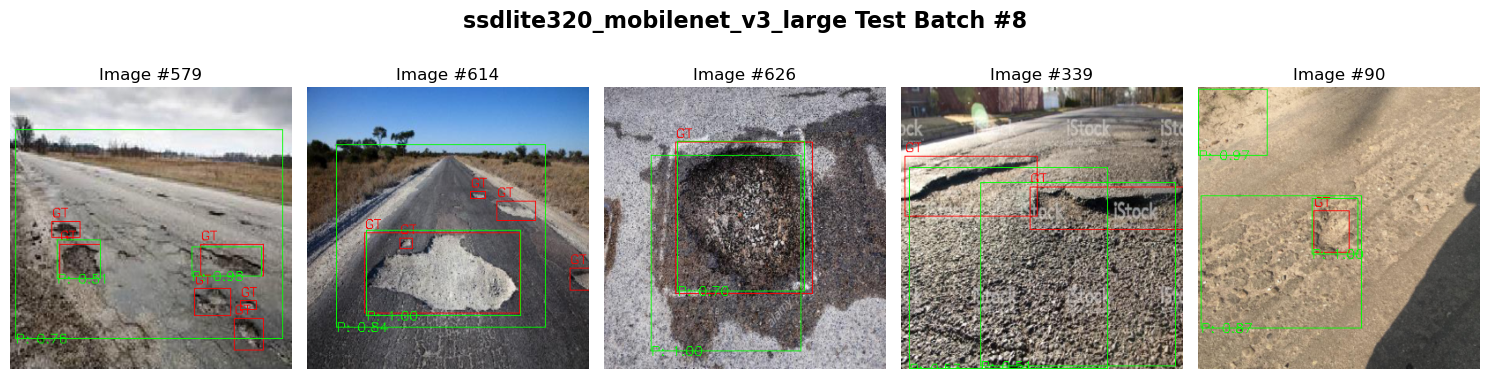

In [35]:
model = trainer.get_model(model_name="ssdlite320_mobilenet_v3_large")
state_dict = torch.load("data/models/ssdlite320_mobilenet_v3_large/ssdlite320_mobilenet_v3_large_best.pth", weights_only=True)
model.load_state_dict(state_dict)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the GPU
model.eval()  # Set the model to evaluation mode

# test the model
evaluator.test_model(model, test_set, device=device, index=None, model_name="ssdlite320_mobilenet_v3_large")